<a href="https://colab.research.google.com/github/AntonioCarri/Proyecto-Jupyter/blob/main/Proyecto_Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conocimiento y preparación de datos

En un primer momento vamos a ver los datos que tenemos y hacer un análisis exploratorio de los mismos.

In [ ]:
#Instalamos algunas librerías

!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.7 MB/s eta 0:00:00


In [ ]:
#Importamos las librerías

import pandas as pd
import json
import seaborn as sns
import numpy as np
import sweetviz as sv

In [ ]:
#Entramos en la carpeta en la que tenemos el data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1 Canciones

###1.1.1 Descubrimiento

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Son 5 columnas y 1000 filas.

In [ ]:
#Creamos un dataframe con el archivo cancioninfo.json

df_canciones = pd.read_json('/content/drive/MyDrive/Clasificacion de canciones/data/cancioninfo.json').transpose().reset_index(drop=True)
df_canciones.rename(columns={'t_id': 'id_cancion'}, inplace=True)
display(df_canciones)

id_cancion duracion genero    disco                 autor
0    blues.00000.wav      138  blues   blues4    Stevie Ray Vaughan
1    blues.00001.wav      142  blues   blues7  Sonny Boy Williamson
2    blues.00002.wav       96  blues   blues5          Muddy Waters
3    blues.00003.wav      111  blues  blues10          Freddie King
4    blues.00004.wav      191  blues   blues1        Memphis Minnie
..               ...      ...    ...      ...                   ...
995   rock.00095.wav      101   rock   rock19             Pearl Jam
996   rock.00096.wav      170   rock   rock13             The Clash
997   rock.00097.wav      121   rock    rock0         Fleetwood Mac
998   rock.00098.wav       99   rock    rock3           Chuck Berry
999   rock.00099.wav      144   rock    rock4             Metallica

[1000 rows x 5 columns]

Vemos cual es el tipo de dato de cada columna.

In [ ]:
df_canciones.dtypes

id_cancion    object
duracion      object
genero        object
disco         object
autor         object
dtype: object

Visualizamos la distribución de la duración de las canciones.

<ipython-input-20-2cb0b12dbef4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_canciones['duracion'])


<Axes: xlabel='duracion', ylabel='Density'>

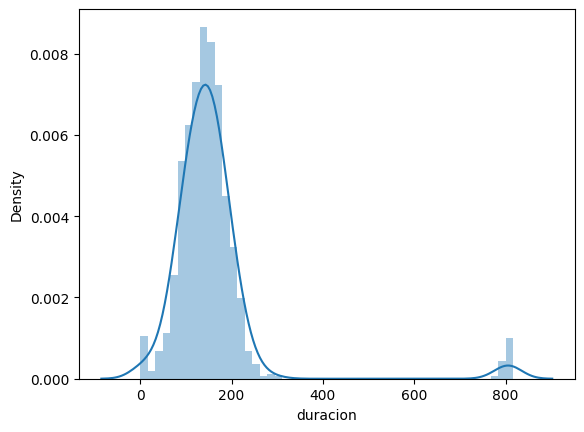

In [ ]:
sns.distplot(df_canciones['duracion'])

Vemos que existen algunas canciones con una duracion mucho más alta de lo normal (outliers), y otras con duraciones 0 o cercanas a 0.

Ahora queremos ver cuántos géneros musicales hay y qué cantidad de canciones hay por cada uno.

In [ ]:
df_canciones['genero'].nunique()

10

In [ ]:
df_canciones.groupby('genero')['id_cancion'].count()

genero
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: id_cancion, dtype: int64

Hay 10 géneros musicales diferentes y cada uno contiene 100 canciones.

También queremos saber cuántos discos hay y cuántas canciones hay por disco.

In [ ]:
df_canciones['disco'].nunique()

200

In [ ]:
df_canciones.groupby('disco')['id_cancion'].count().sort_values(ascending=False)

disco
jazz3         14
country2      12
metal9        11
jazz9         10
blues7        10
              ..
classical5     1
blues1         1
rock14         1
reggae0        1
country4       1
Name: id_cancion, Length: 200, dtype: int64

Hay 200 discos en total. El disco con más canciones tiene 14, y los que menos tienen 1.

También queremos conocer la media de canciones que tiene un disco.

In [ ]:
df_can_dis = df_canciones.groupby('disco')['id_cancion'].count()
df_can_dis.columns=['dis', 'n_can']
df_can_dis.mean()

5.0

Queremos saber cuántos artistas hay y cuales son los artistas con más canciones publicadas.

In [ ]:
df_canciones['autor'].nunique()

322

In [ ]:
df_canciones.groupby('autor')['id_cancion'].count().sort_values(ascending=False)

autor
Eric Clapton       10
Loretta Lynn        9
Sharon den Adel     8
Nicki Minaj         8
Floor Jansen        7
                   ..
Randy Travis        1
Bob Marley          1
Bon Jovi            1
Brooks & Dunn       1
Miles Davis         1
Name: id_cancion, Length: 322, dtype: int64

Hay 322 autores en total. El que tiene más canciones publicadas son 10, y el que menos 1.

###1.1.2 Nulos y datos erróneos

Vemos si existen valores nulos por columnas.

In [ ]:
df_canciones.isna().sum()

id_cancion     0
duracion      18
genero         0
disco          0
autor          0
dtype: int64

Existen 18 valores nulos en la columna de duración. Vamos a ver si los registros con duración nula corresponden a un mismo disco o género.

In [ ]:
#Registros con duracion nula

df_nulos = df_canciones.loc[(df_canciones['duracion'].isna())]
df_nulos

id_cancion duracion     genero        disco                autor
8        blues.00008.wav     None      blues       blues7        Little Walter
12       blues.00012.wav     None      blues      blues15         Bessie Smith
159  classical.00059.wav     None  classical   classical3  Dmitri Shostakovich
197  classical.00097.wav     None  classical  classical11        Aaron Copland
245    country.00045.wav     None    country     country2         Brad Paisley
254    country.00054.wav     None    country    country11         Loretta Lynn
284    country.00084.wav     None    country     country2         Loretta Lynn
366      disco.00066.wav     None      disco       disco9              Odyssey
468     hiphop.00068.wav     None     hiphop      hiphop4          Nicki Minaj
580       jazz.00080.wav     None       jazz        jazz9           Chet Baker
672      metal.00072.wav     None      metal      metal17         Randy Rhoads
712        pop.00012.wav     None        pop        pop18         Jason Derulo
776        pop.00076.wav     None        pop        pop15          Post Malone
778        pop.00078.wav     None        pop        pop13          Nicki Minaj
905       rock.00005.wav     None       rock       rock12          David Bowie
945       rock.00045.wav     None       rock       rock19            The Clash
953       rock.00053.wav     None       rock        rock2              The Who
978       rock.00078.wav     None       rock       rock10         Led Zeppelin

Vemos que no.

Además, según las reglas de negocio pasadas por el cliente, una canción no puede durar más de 13 minutos (780 seg). Vamos a ver cuántas hay y cuales son.

In [ ]:
#Cuantas canciones con duración superior a 13min

df_canciones.loc[(df_canciones['duracion']>780, 'duracion')].count()

24

In [ ]:
#Registros con duración superior a 13 min

df_13m = df_canciones.loc[(df_canciones['duracion']>780)]
df_13m

id_cancion duracion     genero        disco               autor
35       blues.00035.wav      811      blues      blues14         Koko Taylor
120  classical.00020.wav      817  classical  classical10   Modest Mussorgsky
184  classical.00084.wav      803  classical   classical8        Edward Elgar
234    country.00034.wav      803    country     country7  Kris Kristofferson
246    country.00046.wav      812    country     country0        Shania Twain
417     hiphop.00017.wav      785     hiphop      hiphop3             J. Cole
456     hiphop.00056.wav      813     hiphop     hiphop14               Rakim
577       jazz.00077.wav      813       jazz        jazz0       John Coltrane
591       jazz.00091.wav      811       jazz       jazz19      Billie Holiday
610      metal.00010.wav      796      metal      metal16        Floor Jansen
625      metal.00025.wav      811      metal       metal1   Alissa White-Gluz
645      metal.00045.wav      814      metal      metal10       Angela Gossow
655      metal.00055.wav      807      metal      metal14          Doro Pesch
678      metal.00078.wav      792      metal      metal19   Alissa White-Gluz
711        pop.00011.wav      811        pop        pop16           Lady Gaga
714        pop.00014.wav      817        pop         pop5       Ariana Grande
717        pop.00017.wav      793        pop        pop11       Billie Eilish
743        pop.00043.wav      800        pop         pop6           Sam Smith
812     reggae.00012.wav      808     reggae     reggae18                SOJA
839     reggae.00039.wav      800     reggae     reggae17                SOJA
896     reggae.00096.wav      808     reggae      reggae3            Chronixx
911       rock.00011.wav      813       rock       rock11              R.E.M.
964       rock.00064.wav      782       rock       rock17         Chuck Berry
986       rock.00086.wav      800       rock        rock7               Oasis

También habiamos visto que existian registros con canciones con duracion 0, cercanos a 0, o muy cortas. En los datos proporcionados por la empresa, contamos con pistas de duración 30seg de cada una de las canciones. Entendemos por lo tanto, que no existen canciones por debajo de esta duración.

In [ ]:
df_canciones.loc[(df_canciones['duracion']<30),'duracion'].count()

19

In [ ]:
df_30s = df_canciones.loc[(df_canciones['duracion']<30)]
df_30s

id_cancion duracion     genero       disco  \
67       blues.00067.wav        3      blues      blues2   
175  classical.00075.wav       20  classical  classical4   
198  classical.00098.wav        3  classical  classical2   
247    country.00047.wav       19    country   country13   
393      disco.00093.wav        2      disco     disco11   
431     hiphop.00031.wav       12     hiphop    hiphop10   
455     hiphop.00055.wav        6     hiphop    hiphop12   
480     hiphop.00080.wav        6     hiphop     hiphop2   
499     hiphop.00099.wav        0     hiphop     hiphop0   
504       jazz.00004.wav       16       jazz       jazz9   
522       jazz.00022.wav        5       jazz       jazz9   
626      metal.00026.wav        4      metal      metal3   
653      metal.00053.wav        2      metal     metal17   
709        pop.00009.wav        5        pop       pop18   
750        pop.00050.wav        2        pop       pop19   
888     reggae.00088.wav        3     reggae     reggae3   
921       rock.00021.wav        5       rock       rock4   
955       rock.00055.wav        1       rock      rock11   
976       rock.00076.wav        7       rock      rock19   

                      autor  
67           Memphis Minnie  
175           Gustav Mahler  
198  George Frideric Handel  
247      Kris Kristofferson  
393           George McCrae  
431              Kanye West  
455                    2Pac  
480               Lil Wayne  
499                  Eminem  
504       Charlie Christian  
522             Diana Krall  
626             Lars Ulrich  
653            Max Cavalera  
709            Shawn Mendes  
750              Bruno Mars  
888                Capleton  
921              The Eagles  
955                   AC/DC  
976                Bon Jovi

Veamos cuantos registros erróneos tenemos entonces.

In [ ]:
print(f'En total tenemos {df_13m.shape[0] + df_30s.shape[0] + df_nulos.shape[0]} registros con datos de duración nulos, superiores a 13 minutos o inferiores a 30 segundos.')

En total tenemos 61 registros con datos de duración nulos, superiores a 13 minutos o inferiores a 30 segundos.


Vamos a rellenar todos estos valores erróneos por la mediana de la duración de las canciones de cada autor.

In [ ]:
lista_autores=[]

for autor,df_autor in df_canciones.groupby('autor'):
  df_autor.loc[(df_autor['duracion']>780) | (df_autor['duracion']<30) | (df_autor['duracion'].isna()),'duracion'] = df_autor.duracion.median()
  df_autor.loc[(df_autor['duracion']>780) | (df_autor['duracion']<30) | (df_autor['duracion'].isna()),'duracion'] = df_canciones.duracion.median()
  lista_autores.append(df_autor)

df_canciones_tratado = pd.concat(lista_autores)
df_canciones_tratado.sort_values('duracion')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


id_cancion duracion  genero     disco              autor
363   disco.00063.wav       30   disco   disco16    Gibson Brothers
533    jazz.00033.wav       36    jazz    jazz11    Coleman Hawkins
919    rock.00019.wav       38    rock    rock13        Deep Purple
415  hiphop.00015.wav       43  hiphop   hiphop7         Kanye West
505    jazz.00005.wav       43    jazz     jazz8    Ella Fitzgerald
..                ...      ...     ...       ...                ...
456  hiphop.00056.wav    461.0  hiphop  hiphop14              Rakim
678   metal.00078.wav    480.5   metal   metal19  Alissa White-Gluz
625   metal.00025.wav    480.5   metal    metal1  Alissa White-Gluz
743     pop.00043.wav    482.5     pop      pop6          Sam Smith
711     pop.00011.wav    490.5     pop     pop16          Lady Gaga

[1000 rows x 5 columns]

Comprobamos que ya no existen canciones con duración superior a 13 min o inferior a 30 segundos.

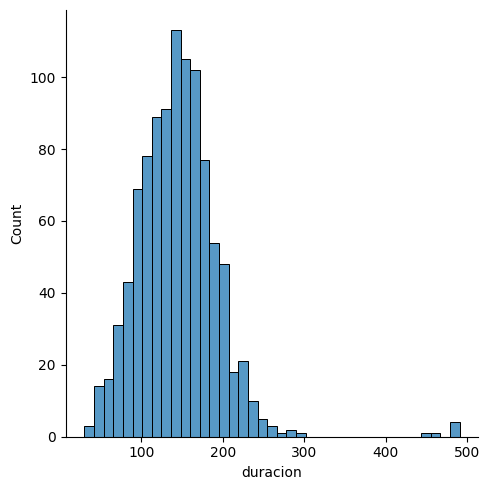

In [ ]:
sns.displot(df_canciones_tratado.duracion)

Comprobamos que ya no hay registros nulos.

In [ ]:
df_canciones_tratado.isna().sum()

id_cancion    0
duracion      0
genero        0
disco         0
autor         0
dtype: int64

##1.2 Artistas

###1.2.1 Descubrimiento

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Son 4 columnas y 1000 filas.

In [ ]:
#Creamos un dataframe con el archivo artistainfo.json

df_artistas = pd.read_json('/content/drive/MyDrive/Clasificacion de canciones/data/artistainfo.json').transpose().reset_index()
df_artistas.rename(columns={'index': 'id_cancion'}, inplace=True)
display(df_artistas)

id_cancion                           artistas        discografica  \
0    blues.00000.wav               [Stevie Ray Vaughan]         Sun Records   
1    blues.00001.wav  [Sonny Boy Williamson, Buddy Guy]        Epic Records   
2    blues.00002.wav       [Muddy Waters, Bessie Smith]       Merge Records   
3    blues.00003.wav                     [Freddie King]    Republic Records   
4    blues.00004.wav     [Memphis Minnie, Bonnie Raitt]        Jive Records   
..               ...                                ...                 ...   
995   rock.00095.wav                        [Pearl Jam]        Stax Records   
996   rock.00096.wav                        [The Clash]         Sun Records   
997   rock.00097.wav                    [Fleetwood Mac]       XL Recordings   
998   rock.00098.wav                      [Chuck Berry]              Motown   
999   rock.00099.wav                        [Metallica]  Def Jam Recordings   

           coste  
0     744.006861  
1    4178.851293  
2    3226.400608  
3    3618.766076  
4    1990.810773  
..           ...  
995  3185.879761  
996  -503.650862  
997   2170.05288  
998  1425.792985  
999   4376.34738  

[1000 rows x 4 columns]

Detectamos que los valores de la columna de artistas son una lista de nombres, ya que algunas canciones son colaboraciones. Comprobamos cuál es el número máximo de artistas que colaboran en una canción.

In [ ]:
max_len = df_artistas['artistas'].apply(len).max()
print(max_len)

3


Creamos tres columnas nuevas separando el artista, colaborador 1 y colaborador 2, y eliminamos la original

In [ ]:
df_artistas[['autor', 'colaborador_1', 'colaborador_2']] = df_artistas['artistas'].apply(pd.Series)
df_artistas = df_artistas.drop('artistas', axis=1)

df_artistas.fillna(value={'colaborador_1':'', 'colaborador_2':''}, inplace=True)

display(df_artistas)

id_cancion        discografica        coste                 autor  \
0    blues.00000.wav         Sun Records   744.006861    Stevie Ray Vaughan   
1    blues.00001.wav        Epic Records  4178.851293  Sonny Boy Williamson   
2    blues.00002.wav       Merge Records  3226.400608          Muddy Waters   
3    blues.00003.wav    Republic Records  3618.766076          Freddie King   
4    blues.00004.wav        Jive Records  1990.810773        Memphis Minnie   
..               ...                 ...          ...                   ...   
995   rock.00095.wav        Stax Records  3185.879761             Pearl Jam   
996   rock.00096.wav         Sun Records  -503.650862             The Clash   
997   rock.00097.wav       XL Recordings   2170.05288         Fleetwood Mac   
998   rock.00098.wav              Motown  1425.792985           Chuck Berry   
999   rock.00099.wav  Def Jam Recordings   4376.34738             Metallica   

    colaborador_1 colaborador_2  
0                                
1       Buddy Guy                
2    Bessie Smith                
3                                
4    Bonnie Raitt                
..            ...           ...  
995                              
996                              
997                              
998                              
999                              

[1000 rows x 6 columns]

Ahora tenemos un dataframe con 6 columnas y 1000 filas.

Vamos a ver los tipos de dato que tiene el dataframe

In [ ]:
df_artistas.dtypes

id_cancion       object
discografica     object
coste            object
autor            object
colaborador_1    object
colaborador_2    object
dtype: object

Visualizamos la distribución del coste

<Axes: >

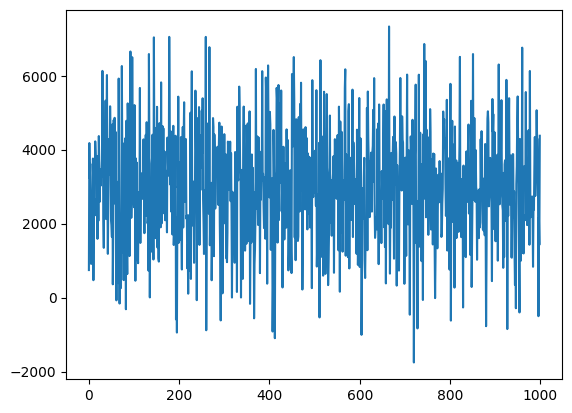

In [ ]:
df_artistas['coste'].plot()

<ipython-input-9-579c24b36ab0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_artistas['coste'])


<Axes: xlabel='coste', ylabel='Density'>

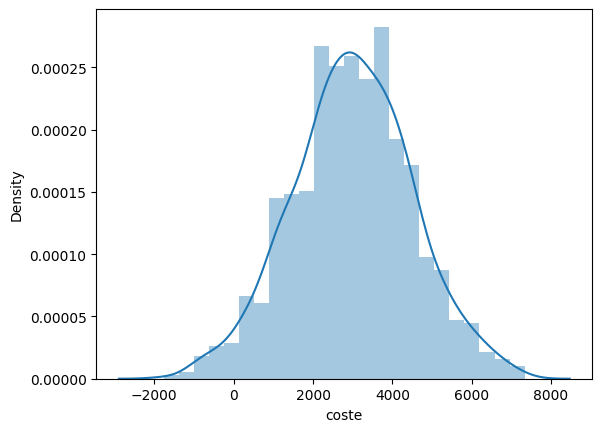

In [ ]:
sns.distplot(df_artistas['coste'])

A simple vista vemos que hay valores negativos, lo que no tiene mucho sentido. Lo estudiaremos más adelante.

Queremos saber el nº de discográficas que hay y cuántas canciones ha publicado cada una de ellas.

In [ ]:
df_artistas['discografica'].nunique()

32

In [ ]:
df_artistas.groupby('discografica')['id_cancion'].count().sort_values(ascending=False)

discografica
Merge Records               80
4AD                         41
Interscope Records          40
Sun Records                 38
RCA Records                 38
Polydor Records             35
XL Recordings               34
Columbia Records            34
EMI Group                   34
Arista Records              33
Wind-Up Records             31
Virgin Records              31
Stax Records                31
Sony Music Entertainment    31
Rough Trade Records         31
Tommy Boy Entertainment     30
Republic Records            30
Atlantic Records            30
Island Records              29
Warner Music Group          27
Sub Pop Records             26
Elektra Records             26
Sire Records                26
Jive Records                26
Universal Music Group       25
Motown                      25
BMG Rights Management       25
Def Jam Recordings          25
Verve Records               24
MCA Records                 23
Epic Records                22
Capitol Records           

Hay 32 discográficas en total. La que más canciones ha publicado ha sido 80 y la que menos 19.

Veamos cuantos autores hay (sin colaboradores):

In [ ]:
df_artistas['autor'].nunique()

322

###1.2.2 Nulos y datos erróneos

Identificamos que no existen valores nulos en este dataframe

In [ ]:
df_artistas.isna().sum()

id_cancion       0
discografica     0
coste            0
autor            0
colaborador_1    0
colaborador_2    0
dtype: int64

Pero antes ya vimos que existian datos negativos en el coste por los derechos de las canciones. Veamos cuantas canciones hay con coste negativo y cuales son.

In [ ]:
#Cuantas hay

df_artistas.loc[(df_artistas['coste']<0, 'coste')].count()

26

In [ ]:
#Cuales son

df_coste_neg = df_artistas.loc[(df_artistas['coste']<0)]
df_coste_neg

id_cancion             discografica        coste  \
61       blues.00061.wav                      4AD    -75.23646   
68       blues.00068.wav            XL Recordings  -162.144134   
82       blues.00082.wav         Republic Records  -315.932218   
193  classical.00093.wav             Sire Records  -590.147377   
195  classical.00095.wav            Merge Records  -946.538904   
239    country.00039.wav       Def Jam Recordings   -70.788801   
260    country.00060.wav          Elektra Records  -884.224651   
292    country.00092.wav  Tommy Boy Entertainment  -618.028251   
357      disco.00057.wav            Merge Records   -169.81853   
366      disco.00066.wav       Warner Music Group  -561.329596   
407     hiphop.00007.wav            Merge Records  -918.443056   
412     hiphop.00012.wav             Stax Records -1099.031004   
511       jazz.00011.wav    BMG Rights Management  -537.315102   
604      metal.00004.wav          Polydor Records -1008.082287   
711        pop.00011.wav             Sire Records  -463.113785   
720        pop.00020.wav       Def Jam Recordings -1755.657312   
728        pop.00028.wav            Verve Records  -835.034158   
740        pop.00040.wav            Merge Records    -65.63091   
767        pop.00067.wav           Arista Records   -14.360006   
802     reggae.00002.wav          Polydor Records  -623.246281   
829     reggae.00029.wav       Warner Music Group  -267.667002   
880     reggae.00080.wav  Tommy Boy Entertainment  -774.197862   
927       rock.00027.wav                EMI Group  -851.746534   
946       rock.00046.wav          Polydor Records  -288.984729   
954       rock.00054.wav       Interscope Records  -402.731257   
996       rock.00096.wav              Sun Records  -503.650862   

                      autor      colaborador_1 colaborador_2  
61     Blind Willie Johnson                                   
68            R.L. Burnside                                   
82                Buddy Guy                                   
193         Bedřich Smetana                                   
195  George Frideric Handel                                   
239            Dolly Parton        LeAnn Rimes                
260         Martina McBride                                   
292              Tim McGraw                                   
357                Shalamar                                   
366                 Odyssey       Amii Stewart                
407                 Beyoncé  Chance the Rapper      Kid Cudi  
412           Biggie Smalls                                   
511             Ahmad Jamal                                   
604           Ozzy Osbourne                                   
711               Lady Gaga              Lizzo                
720                   Adele                                   
728           Ariana Grande                                   
740                   Drake                                   
767                  Khalid            Cardi B                
802             Rita Marley                                   
829          Gregory Isaacs                                   
880             Junior Gong                                   
927                 Nirvana                                   
946               Van Halen         The Eagles         Queen  
954              The Eagles                                   
996               The Clash

Vemos que los datos negativos tienen un orden de magnitud similar al conjunto del resto de datos, por lo que asumimos que el error se encuentra en el signo negativo. Por tanto, pasamos los valores negativos a positivos sin modificar los mismos.

In [ ]:
df_artistas["coste"]=df_artistas["coste"].apply(abs)

Comprobamos el cambio.

In [ ]:
df_artistas.loc[(df_artistas['coste']<0, 'coste')].count()

0

Además, desde negocio nos comentaron que el límite de pago por los derechos de una canción de pop es de 5.000€, y que los derechos de las canciones de un mismo disco no pueden sobrepasar los 50.000€.

Vamos a ver cuántas canciones pop hay con un coste superior a 5.000€ y cuáles son.

In [ ]:
#Cuantas canciones pop hay con coste superior a 5000€

df_artistas = pd.merge(df_artistas, df_canciones_tratado[['id_cancion','genero']], on='id_cancion', how='left')
df_artistas.loc[(df_artistas['genero']=='pop') & (df_artistas['coste']>5000)]

id_cancion             discografica        coste            autor  \
705  pop.00005.wav    Universal Music Group  6030.881140          Rihanna   
724  pop.00024.wav          Capitol Records  5758.805768         Maroon 5   
731  pop.00031.wav      Rough Trade Records  6028.010832  Imagine Dragons   
743  pop.00043.wav       Interscope Records  6858.317376        Sam Smith   
746  pop.00046.wav            XL Recordings  6399.335437     Selena Gomez   
756  pop.00056.wav           Island Records  5096.357009       Zayn Malik   
785  pop.00085.wav                EMI Group  5032.099105           Halsey   
793  pop.00093.wav  Tommy Boy Entertainment  5348.401118       Ed Sheeran   

    colaborador_1  colaborador_2 genero  
705                                 pop  
724                                 pop  
731         Adele  Ariana Grande    pop  
743                                 pop  
746                                 pop  
756                                 pop  
785                                 pop  
793                                 pop

Al comprobar que los precios de estas 8 canciones superan por poco el límite puesto por negocio, y teniendo en cuenta que todas pertenecen al mismo género, hemos decidico mantener los datos ajustando el precio al máximo.

In [ ]:
df_artistas.loc[(df_artistas['genero']=='pop') & (df_artistas['coste']>5000), 'coste']=5000
df_artistas[(df_artistas["coste"]==5000)]

id_cancion             discografica   coste            autor  \
705  pop.00005.wav    Universal Music Group  5000.0          Rihanna   
724  pop.00024.wav          Capitol Records  5000.0         Maroon 5   
731  pop.00031.wav      Rough Trade Records  5000.0  Imagine Dragons   
743  pop.00043.wav       Interscope Records  5000.0        Sam Smith   
746  pop.00046.wav            XL Recordings  5000.0     Selena Gomez   
756  pop.00056.wav           Island Records  5000.0       Zayn Malik   
785  pop.00085.wav                EMI Group  5000.0           Halsey   
793  pop.00093.wav  Tommy Boy Entertainment  5000.0       Ed Sheeran   

    colaborador_1  colaborador_2 genero  
705                                 pop  
724                                 pop  
731         Adele  Ariana Grande    pop  
743                                 pop  
746                                 pop  
756                                 pop  
785                                 pop  
793                                 pop

In [ ]:
df_artistas = df_artistas.drop('genero', axis=1)
df_artistas

id_cancion        discografica        coste                 autor  \
0    blues.00000.wav         Sun Records   744.006861    Stevie Ray Vaughan   
1    blues.00001.wav        Epic Records  4178.851293  Sonny Boy Williamson   
2    blues.00002.wav       Merge Records  3226.400608          Muddy Waters   
3    blues.00003.wav    Republic Records  3618.766076          Freddie King   
4    blues.00004.wav        Jive Records  1990.810773        Memphis Minnie   
..               ...                 ...          ...                   ...   
995   rock.00095.wav        Stax Records  3185.879761             Pearl Jam   
996   rock.00096.wav         Sun Records   503.650862             The Clash   
997   rock.00097.wav       XL Recordings  2170.052880         Fleetwood Mac   
998   rock.00098.wav              Motown  1425.792985           Chuck Berry   
999   rock.00099.wav  Def Jam Recordings  4376.347380             Metallica   

    colaborador_1 colaborador_2  
0                                
1       Buddy Guy                
2    Bessie Smith                
3                                
4    Bonnie Raitt                
..            ...           ...  
995                              
996                              
997                              
998                              
999                              

[1000 rows x 6 columns]

Ahora vamos a ver cuántos discos superan un coste de 50.000€

In [ ]:
df_merged = pd.merge(df_canciones, df_artistas, on='id_cancion', how='left')
df_coste_disco = pd.DataFrame(df_merged.groupby('disco')['coste'].sum()).reset_index()
df_disco_50k = df_coste_disco.loc[df_coste_disco['coste']>50000]
df_disco_50k.shape[0]

0

Parece que no existen discos cuyo coste de sus canciones superen los 50000€.

##1.3 Fechas de publicación de las canciones

###1.3.1 Descubrimiento

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Tiene 4 columnas y 1000 filas.

In [ ]:
#Creamos un dataframe con el archivo fecha.json

df_fecha = pd.read_json('/content/drive/MyDrive/Clasificacion de canciones/data/fecha.json').transpose().reset_index()
df_fecha.rename(columns={'index': 'id_cancion', 'dia':'day', 'mes':'month'}, inplace=True)
display(df_fecha)

id_cancion   day  month    year
0    blues.00000.wav  17.0   10.0     1.0
1    blues.00001.wav  31.0    7.0  2023.0
2    blues.00002.wav  14.0    6.0  2023.0
3    blues.00003.wav  29.0    5.0  2023.0
4    blues.00004.wav  22.0    6.0     NaN
..               ...   ...    ...     ...
995   rock.00095.wav  20.0   10.0  2022.0
996   rock.00096.wav  24.0    9.0  2021.0
997   rock.00097.wav  11.0    8.0  2022.0
998   rock.00098.wav  27.0    2.0  2022.0
999   rock.00099.wav  13.0   10.0  2022.0

[1000 rows x 4 columns]

Vemos qué tipo de datos tiene el dataset.

In [ ]:
df_fecha.dtypes

id_cancion     object
day           float64
month         float64
year          float64
dtype: object

Detectamos que los valores en las columnas dia mes y año son floats.

###1.3.2 Nulos y datos erróneos

Identificamos el nº de datos nulos por columna en la tabla de fecha. Hay 6 nulos en dia, 9 nulos en mes y 17 nulos en año.

In [ ]:
df_fecha.isna().sum()

id_cancion     0
day            6
month          9
year          17
dtype: int64

Ahora vamos a comprobar si hay irregularidades en los dias, meses y años.

Vemos si hay días por debajo de 1 o por encima de 31.

In [ ]:
df_fecha.day.describe()

count    994.000000
mean      16.074447
std        9.669904
min        0.000000
25%        8.000000
50%       16.000000
75%       24.000000
max       36.000000
Name: day, dtype: float64

Vamos a ver cuántos registros tienen datos por debajo de 1 o por encima del día máximo del mes correspondiente.

In [ ]:
#Comprobación días:
print("\033[1mDatos erróneos días:\033[0m")
index_dias=[]
index=df_fecha.index[(df_fecha["month"].isna()) & (df_fecha["day"]==0)].tolist()
index_dias.extend(index)
for x in range(13):
  if x==0:
    print(f"Mes {x}:")
    print(df_fecha[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>31))])
    index=df_fecha.index[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>31))].tolist()
    index_dias.extend(index)
  elif x in [1,3,5,7,8,10,12]:
    print(f"Mes {x}:")
    print(df_fecha[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>31))])
    index=df_fecha.index[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>31))].tolist()
    index_dias.extend(index)
  elif x==2:
    print(f"Mes {x}:")
    print(df_fecha[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>29))])
    index=df_fecha.index[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>29))].tolist()
    index_dias.extend(index)
  else:
    print(f"Mes {x}:")
    print(df_fecha[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>30))])
    index=df_fecha.index[(df_fecha["month"]==x) & ((df_fecha["day"]<=0) | (df_fecha["day"]>30))].tolist()
    index_dias.extend(index)
index_dias.sort()

print("----------------------------------------")
len(index_dias)

Datos erróneos días:
Mes 0:
           id_cancion  day  month    year
46    blues.00046.wav  0.0    0.0  2023.0
92    blues.00092.wav  0.0    0.0  2023.0
647   metal.00047.wav  0.0    0.0  2023.0
677   metal.00077.wav  0.0    0.0  2021.0
723     pop.00023.wav  0.0    0.0  2023.0
869  reggae.00069.wav  0.0    0.0  2023.0
926    rock.00026.wav  0.0    0.0  2023.0
937    rock.00037.wav  0.0    0.0  2022.0
Mes 1:
           id_cancion   day  month    year
455  hiphop.00055.wav  33.0    1.0  2023.0
553    jazz.00053.wav   0.0    1.0  2022.0
720     pop.00020.wav  32.0    1.0  2022.0
Mes 2:
              id_cancion   day  month    year
144  classical.00044.wav   0.0    2.0  2022.0
175  classical.00075.wav  31.0    2.0  2023.0
640      metal.00040.wav   0.0    2.0  2022.0
Mes 3:
              id_cancion   day  month    year
111  classical.00011.wav  33.0    3.0  2022.0
252    country.00052.wav  36.0    3.0  2023.0
392      disco.00092.wav  33.0    3.0  2023.0
525       jazz.00025.wav  35.0   

84

Hay 84 registros con datos por debajo de 1 o por encima de 31 en la columna dias. Además de los 6 nulos. En total tenemos 90 valores erróneos.

Comprobamos si hay irregularidades en los meses.

In [ ]:
df_fecha.month.describe()

count    991.000000
mean       6.346115
std        3.497226
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: month, dtype: float64

De momento vemos que el mes max. es 12, pero veamos si hay meses por debajo de 1.

In [ ]:
df_fecha.loc[(df_fecha['month']<=0), 'month'].count()

10

Hay 10 registros con datos por debajo de 1 en la columna mes. Sumando los 9 valores nulos, tenemos 19 valores erróneos en la columna mes.

Comprobamos si hay irregularidades en los años.

In [ ]:
df_fecha.year.describe()

count     983.000000
mean     1886.141404
std       506.637969
min        -7.000000
25%      2021.000000
50%      2022.000000
75%      2023.000000
max      2023.000000
Name: year, dtype: float64

Vemos que el año mínimo es un año negativo. Comprobamos cuáles son los años únicos que hay en el dataframe y cuántos registros hay en cada uno.

In [ ]:
df_fecha.groupby('year').id_cancion.nunique()

year
-7.0        19
 0.0        19
 1.0        13
 2.0        15
 2021.0    317
 2022.0    290
 2023.0    310
Name: id_cancion, dtype: int64

Hay 19 registros negativos, 19 registros de año 0, 13 de año 1 y 15 de año 2. En total, 66.

In [ ]:
#Lo comprobamos

df_fecha.loc[(df_fecha['year']<=2000), 'year'].count()

66

In [ ]:
#Comprobación meses y años:
print("\033[1mDatos erróneos meses:\033[0m")
print(df_fecha[ (df_fecha["month"]<=0) |(df_fecha["month"]>12)].info())
index_meses=df_fecha.index[(df_fecha["month"]<=0) |(df_fecha["month"]>12)].tolist()
print("----------------------------------------")
print("\033[1mDatos erróneos años:\033[0m")
print(df_fecha[(df_fecha["year"]<2000)].info())
index_años=df_fecha.index[(df_fecha["year"]<2000)].tolist()

Datos erróneos meses:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 46 to 937
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cancion  10 non-null     object 
 1   day         8 non-null      float64
 2   month       10 non-null     float64
 3   year        10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 400.0+ bytes
None
----------------------------------------
Datos erróneos años:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 965
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cancion  66 non-null     object 
 1   day         66 non-null     float64
 2   month       65 non-null     float64
 3   year        66 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.6+ KB
None


Si sumamos los 17 valores nulos, tenemos un total de 83 valores erróneos en la columna de año.

Valores erróneos:
*   Días: 90
*   Meses: 19
*   Años: 83





Dada la alta cantidad de datos erróneos hemos decidido no trabajar con dichos datos pero no eliminar los registros para conservar el resto de datos. Por eso los hemos sustituido por un valor común.

In [ ]:
#Sustituimos nulos y erróneos por 0 para realizar la sustitución posterior:

df_fecha=df_fecha.fillna(0)
df_fecha.loc[index_dias,"day"]=0
df_fecha.loc[index_meses,"month"]=0
df_fecha.loc[index_años,"year"]=0
df_fecha

id_cancion   day  month    year
0    blues.00000.wav  17.0   10.0     0.0
1    blues.00001.wav  31.0    7.0  2023.0
2    blues.00002.wav  14.0    6.0  2023.0
3    blues.00003.wav  29.0    5.0  2023.0
4    blues.00004.wav  22.0    6.0     0.0
..               ...   ...    ...     ...
995   rock.00095.wav  20.0   10.0  2022.0
996   rock.00096.wav  24.0    9.0  2021.0
997   rock.00097.wav  11.0    8.0  2022.0
998   rock.00098.wav  27.0    2.0  2022.0
999   rock.00099.wav  13.0   10.0  2022.0

[1000 rows x 4 columns]

Además, desde negocio nos han comunicado que un artista no puede publicar más de 5 canciones en un mismo día. Vamos a ver si eso ha ocurrido.

In [ ]:
#Añadimos una columna con la fecha completa para que resulte más fácil de búsqueda

df_fecha['fecha_entera'] = pd.to_datetime(df_fecha[['day', 'month', 'year']], format='%d/%m/%Y', errors='coerce')
df_fecha

id_cancion   day  month    year fecha_entera
0    blues.00000.wav  17.0   10.0     0.0          NaT
1    blues.00001.wav  31.0    7.0  2023.0   2023-07-31
2    blues.00002.wav  14.0    6.0  2023.0   2023-06-14
3    blues.00003.wav  29.0    5.0  2023.0   2023-05-29
4    blues.00004.wav  22.0    6.0     0.0          NaT
..               ...   ...    ...     ...          ...
995   rock.00095.wav  20.0   10.0  2022.0   2022-10-20
996   rock.00096.wav  24.0    9.0  2021.0   2021-09-24
997   rock.00097.wav  11.0    8.0  2022.0   2022-08-11
998   rock.00098.wav  27.0    2.0  2022.0   2022-02-27
999   rock.00099.wav  13.0   10.0  2022.0   2022-10-13

[1000 rows x 5 columns]

In [ ]:
df_fecha['fecha_entera'] = df_fecha['fecha_entera'].astype(str)

Comprobamos que ninguno de los artistas ha publicado más de 5 canciones en un mismo día con la información con la que disponemos.

In [ ]:
df12 = df_fecha.merge(df_artistas, on='id_cancion', how='left')
df12.groupby(['autor', 'fecha_entera'])['id_cancion'].nunique().sort_values(ascending=False)

autor           fecha_entera
Taj Mahal       NaT             3
Chuck Berry     NaT             3
Eric Clapton    NaT             2
Gregory Isaacs  NaT             2
Antonín Dvořák  NaT             2
                               ..
Floor Jansen    2021-11-19      1
                2022-01-23      1
                2022-08-23      1
                2023-06-20      1
Ziggy Marley    2023-02-28      1
Name: id_cancion, Length: 970, dtype: int64

In [ ]:
df_fecha[["year","month","day"]]=df_fecha[["year","month","day"]].astype(int).astype(str).replace("0","X")

##1.4 Popularidad de la canción (reproducciones)

###1.4.1 Descubrimiento

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Hay 3 columnas y 1000 filas.

In [ ]:
#Creamos un dataframe con el archivo popularidad.json

df_popularidad = pd.read_json('/content/drive/MyDrive/Clasificacion de canciones/data/popularidad.json').transpose().reset_index()
df_popularidad.rename(columns={'index': 'id_cancion'}, inplace=True)
display(df_popularidad)

id_cancion                                     reproducciones  \
0    blues.00000.wav  [93664, 7047, 65224, 55270, 55821, 27559, 3481...   
1    blues.00001.wav  [50286, 20395, 39468, 28997, 98892, 22057, 302...   
2    blues.00002.wav  [90466, 78387, 63142, 775, 77078, 13714, 27558...   
3    blues.00003.wav  [91823, -1, 1882, 83507, 35774, 26952, 80873, ...   
4    blues.00004.wav  [10284, 36755, 10518, 16141, 83577, 62614, 232...   
..               ...                                                ...   
995   rock.00095.wav  [1402, 31839, 84468, 55410, 99542, 3065, 44563...   
996   rock.00096.wav  [25423, 92875, 28818, 79372, 84973, 1039, 5143...   
997   rock.00097.wav  [70971, 29584, 20839, 4415, 48237, 10839, 2654...   
998   rock.00098.wav  [54670, 27994, 72085, 44841, 63185, 82457, 259...   
999   rock.00099.wav  [69292, 76618, 61460, 60423, -1, 27492, 4832, ...   

    numero_reproducciones  
0                  267262  
1                  333273  
2                      -1  
3                 1321803  
4                  194998  
..                    ...  
995                    -1  
996               1759364  
997               1706309  
998               1038621  
999               1185616  

[1000 rows x 3 columns]

In [ ]:
#Como sabemos a que datos se refiere cada columna, las renombramos para que queden más claras

df_popularidad.rename(columns={'reproducciones': 'reproducciones_sep'}, inplace=True)
df_popularidad.rename(columns={'numero_reproducciones': 'total_reproducciones'}, inplace=True)
display(df_popularidad)

id_cancion                                 reproducciones_sep  \
0    blues.00000.wav  [93664, 7047, 65224, 55270, 55821, 27559, 3481...   
1    blues.00001.wav  [50286, 20395, 39468, 28997, 98892, 22057, 302...   
2    blues.00002.wav  [90466, 78387, 63142, 775, 77078, 13714, 27558...   
3    blues.00003.wav  [91823, -1, 1882, 83507, 35774, 26952, 80873, ...   
4    blues.00004.wav  [10284, 36755, 10518, 16141, 83577, 62614, 232...   
..               ...                                                ...   
995   rock.00095.wav  [1402, 31839, 84468, 55410, 99542, 3065, 44563...   
996   rock.00096.wav  [25423, 92875, 28818, 79372, 84973, 1039, 5143...   
997   rock.00097.wav  [70971, 29584, 20839, 4415, 48237, 10839, 2654...   
998   rock.00098.wav  [54670, 27994, 72085, 44841, 63185, 82457, 259...   
999   rock.00099.wav  [69292, 76618, 61460, 60423, -1, 27492, 4832, ...   

    total_reproducciones  
0                 267262  
1                 333273  
2                     -1  
3                1321803  
4                 194998  
..                   ...  
995                   -1  
996              1759364  
997              1706309  
998              1038621  
999              1185616  

[1000 rows x 3 columns]

Detectamos que los valores de la columna reproducciones_sep son una lista, y comprobamos que la longitud de la lista se corresponde con los días de septiembre.

In [ ]:
max_len = df_popularidad['reproducciones_sep'].apply(len).max()
print(max_len)

30


A continuación creamos columnas nuevas por las reproducciones de cada dia.

In [ ]:
tabla_rep = np.asarray(list(df_popularidad['reproducciones_sep']))
df_rep_sep = pd.DataFrame(tabla_rep)

nombres_columnas = [f'rep_{i + 1}_sep' for i in range(30)]
df_rep_sep.columns = nombres_columnas

df_rep_sep

rep_1_sep rep_2_sep rep_3_sep rep_4_sep rep_5_sep rep_6_sep rep_7_sep  \
0       93664      7047     65224     55270     55821     27559     34811   
1       50286     20395     39468     28997     98892     22057     30220   
2       90466     78387     63142       775     77078     13714     27558   
3       91823        -1      1882     83507     35774     26952     80873   
4       10284     36755     10518     16141     83577     62614     23274   
..        ...       ...       ...       ...       ...       ...       ...   
995      1402     31839     84468     55410     99542      3065     44563   
996     25423     92875     28818     79372     84973      1039     51439   
997     70971     29584     20839      4415     48237     10839     26547   
998     54670     27994     72085     44841     63185     82457     25950   
999     69292     76618     61460     60423        -1     27492      4832   

    rep_8_sep rep_9_sep rep_10_sep  ... rep_21_sep rep_22_sep rep_23_sep  \
0        4878     11864      75646  ...      81023      26681      75288   
1        4754     66980      50505  ...      49746      19312      57039   
2       41324     49561      28734  ...      55619      26985      48300   
3        1296     62342      93108  ...      21872      70665      67107   
4       26068     61880      26384  ...      57999      39352      65893   
..        ...       ...        ...  ...        ...        ...        ...   
995      None     42551      22158  ...      47755      33563      88694   
996     84829     67640      86101  ...      80567       7368      97842   
997  0.038355     76022      78938  ...      62659       2182      96256   
998     14757      None      55961  ...      49015      99061      22388   
999     75973        -1      59005  ...      84055      45210       None   

    rep_24_sep rep_25_sep rep_26_sep rep_27_sep rep_28_sep rep_29_sep  \
0        41101      99048      33960      77865      43481         -1   
1        28638      77905      90054      63121      27927      85260   
2        93387      17919       None      18319      64733      58397   
3        55232      34833      53132      93305      54372      90403   
4        40346      82972      76992      63248      27434      56810   
..         ...        ...        ...        ...        ...        ...   
995      23101      10797      34580      66815      61890      38581   
996      83698      47869      41769      30733      81427      16122   
997      84355      65954      67667      93680      28167      50728   
998      24780      21924      85098       8707      46738      19592   
999       None      86391      76554      74174      15023        992   

    rep_30_sep  
0        68495  
1        41753  
2        34834  
3        21242  
4        23314  
..         ...  
995      14983  
996   0.146659  
997      98972  
998      50087  
999      42261  

[1000 rows x 30 columns]

Creamos una nueva columna con la suma total de todas las reproducciones de septiembre por canción, y unimos todo en un dataframe con total reproducciones, total reproducciones septiembre y las reproducciones diarias.

In [ ]:
df_rep_sep['rep_total_sep'] = df_rep_sep.sum(axis=1).astype(int)

#Concatenamos id_cancion, total_reproducciones, las reproducciones por cada dia de sept, y el total de reproducciones de septiembre

df_popularidad_tratado = pd.concat([df_popularidad['id_cancion'], df_popularidad['total_reproducciones'], df_rep_sep], axis=1)

display (df_popularidad_tratado)

id_cancion total_reproducciones rep_1_sep rep_2_sep rep_3_sep  \
0    blues.00000.wav               267262     93664      7047     65224   
1    blues.00001.wav               333273     50286     20395     39468   
2    blues.00002.wav                   -1     90466     78387     63142   
3    blues.00003.wav              1321803     91823        -1      1882   
4    blues.00004.wav               194998     10284     36755     10518   
..               ...                  ...       ...       ...       ...   
995   rock.00095.wav                   -1      1402     31839     84468   
996   rock.00096.wav              1759364     25423     92875     28818   
997   rock.00097.wav              1706309     70971     29584     20839   
998   rock.00098.wav              1038621     54670     27994     72085   
999   rock.00099.wav              1185616     69292     76618     61460   

    rep_4_sep rep_5_sep rep_6_sep rep_7_sep rep_8_sep  ... rep_22_sep  \
0       55270     55821     27559     34811      4878  ...      26681   
1       28997     98892     22057     30220      4754  ...      19312   
2         775     77078     13714     27558     41324  ...      26985   
3       83507     35774     26952     80873      1296  ...      70665   
4       16141     83577     62614     23274     26068  ...      39352   
..        ...       ...       ...       ...       ...  ...        ...   
995     55410     99542      3065     44563      None  ...      33563   
996     79372     84973      1039     51439     84829  ...       7368   
997      4415     48237     10839     26547  0.038355  ...       2182   
998     44841     63185     82457     25950     14757  ...      99061   
999     60423        -1     27492      4832     75973  ...      45210   

    rep_23_sep rep_24_sep rep_25_sep rep_26_sep rep_27_sep rep_28_sep  \
0        75288      41101      99048      33960      77865      43481   
1        57039      28638      77905      90054      63121      27927   
2        48300      93387      17919       None      18319      64733   
3        67107      55232      34833      53132      93305      54372   
4        65893      40346      82972      76992      63248      27434   
..         ...        ...        ...        ...        ...        ...   
995      88694      23101      10797      34580      66815      61890   
996      97842      83698      47869      41769      30733      81427   
997      96256      84355      65954      67667      93680      28167   
998      22388      24780      21924      85098       8707      46738   
999       None       None      86391      76554      74174      15023   

    rep_29_sep rep_30_sep rep_total_sep  
0           -1      68495       1336073  
1        85260      41753       1216359  
2        58397      34834       1329694  
3        90403      21242       1565219  
4        56810      23314       1323027  
..         ...        ...           ...  
995      38581      14983       1219622  
996      16122   0.146659       1488438  
997      50728      98972       1418327  
998      19592      50087       1253333  
999        992      42261       1264124  

[1000 rows x 33 columns]

Comparamos los datos de las columnas de total_reproducciones con rep_total_sep(la suma de todas las reproducciones de septiembre)

In [ ]:
df_comparar = pd.concat([df_popularidad_tratado['id_cancion'], df_popularidad_tratado['total_reproducciones'], df_popularidad_tratado['rep_total_sep']], axis=1)
display(df_comparar)

id_cancion total_reproducciones  rep_total_sep
0    blues.00000.wav               267262        1336073
1    blues.00001.wav               333273        1216359
2    blues.00002.wav                   -1        1329694
3    blues.00003.wav              1321803        1565219
4    blues.00004.wav               194998        1323027
..               ...                  ...            ...
995   rock.00095.wav                   -1        1219622
996   rock.00096.wav              1759364        1488438
997   rock.00097.wav              1706309        1418327
998   rock.00098.wav              1038621        1253333
999   rock.00099.wav              1185616        1264124

[1000 rows x 3 columns]

Vemos que en algunos casos las reproducciones totales de la canción son inferiores al total de la suma de las reproducciones de septiembre, lo que no tiene sentido.

Creamos un cociente para ver en cuántos casos el total de reproducciones es menor a la suma de reproducciones de sept.

In [ ]:
df_comparar = pd.concat([df_popularidad_tratado['id_cancion'], df_popularidad_tratado['total_reproducciones'], df_popularidad_tratado['rep_total_sep']], axis=1)
df_comparar['cociente_sep_tot'] = (df_comparar['total_reproducciones']/df_comparar['rep_total_sep'])

display(df_comparar)

id_cancion total_reproducciones  rep_total_sep cociente_sep_tot
0    blues.00000.wav               267262        1336073         0.200035
1    blues.00001.wav               333273        1216359         0.273992
2    blues.00002.wav                   -1        1329694        -0.000001
3    blues.00003.wav              1321803        1565219         0.844484
4    blues.00004.wav               194998        1323027         0.147388
..               ...                  ...            ...              ...
995   rock.00095.wav                   -1        1219622        -0.000001
996   rock.00096.wav              1759364        1488438          1.18202
997   rock.00097.wav              1706309        1418327         1.203043
998   rock.00098.wav              1038621        1253333         0.828687
999   rock.00099.wav              1185616        1264124         0.937895

[1000 rows x 4 columns]

Los cocientes de 0 a 1 representan que el total de reproducciones es menor a la suma de reproducciones de sept, lo que no es posible.
Los cocientes 1 representan que el total de reproducciones es igual a la suma de reproducciones de sept, puede ser posible si la canción solo se ha reproducido en sept.
Los cocientes mayores a 1 representan que el total de reproducciones es mayor a la suma de reproducciones de sept.

Vemos cual es la distibución de este cociente.

<Axes: ylabel='Frequency'>

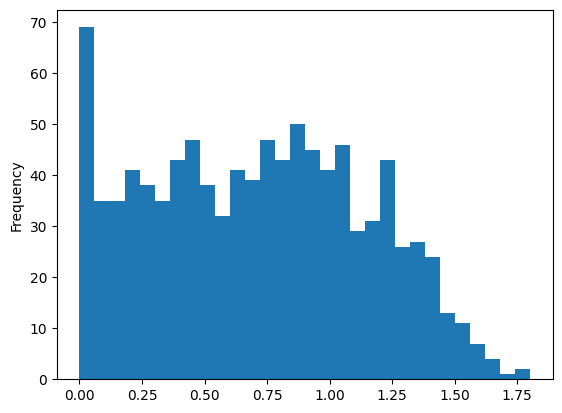

In [ ]:
df_comparar[df_comparar['cociente_sep_tot']!=0]['cociente_sep_tot'].plot.hist(bins=30)

La mayoría de los registros de la columna total_reproducciones no parecen tener sentido a simple vista.
Deberíamos preguntar a negocio de dónde se han obtenido estos datos o a qué corresponden realmente, ya que no parece ser un problema de escala.
Proponemos utilizar como agregado el total de reproducciones de septiembre en vez de total_reproducciones.

Como no vamos a utilizar los datos de total_reproducciones, eliminamos la columna.

In [ ]:
df_popularidad_tratado = df_popularidad_tratado.drop('total_reproducciones', axis=1)
df_popularidad_tratado

id_cancion rep_1_sep rep_2_sep rep_3_sep rep_4_sep rep_5_sep  \
0    blues.00000.wav     93664      7047     65224     55270     55821   
1    blues.00001.wav     50286     20395     39468     28997     98892   
2    blues.00002.wav     90466     78387     63142       775     77078   
3    blues.00003.wav     91823        -1      1882     83507     35774   
4    blues.00004.wav     10284     36755     10518     16141     83577   
..               ...       ...       ...       ...       ...       ...   
995   rock.00095.wav      1402     31839     84468     55410     99542   
996   rock.00096.wav     25423     92875     28818     79372     84973   
997   rock.00097.wav     70971     29584     20839      4415     48237   
998   rock.00098.wav     54670     27994     72085     44841     63185   
999   rock.00099.wav     69292     76618     61460     60423        -1   

    rep_6_sep rep_7_sep rep_8_sep rep_9_sep  ... rep_22_sep rep_23_sep  \
0       27559     34811      4878     11864  ...      26681      75288   
1       22057     30220      4754     66980  ...      19312      57039   
2       13714     27558     41324     49561  ...      26985      48300   
3       26952     80873      1296     62342  ...      70665      67107   
4       62614     23274     26068     61880  ...      39352      65893   
..        ...       ...       ...       ...  ...        ...        ...   
995      3065     44563      None     42551  ...      33563      88694   
996      1039     51439     84829     67640  ...       7368      97842   
997     10839     26547  0.038355     76022  ...       2182      96256   
998     82457     25950     14757      None  ...      99061      22388   
999     27492      4832     75973        -1  ...      45210       None   

    rep_24_sep rep_25_sep rep_26_sep rep_27_sep rep_28_sep rep_29_sep  \
0        41101      99048      33960      77865      43481         -1   
1        28638      77905      90054      63121      27927      85260   
2        93387      17919       None      18319      64733      58397   
3        55232      34833      53132      93305      54372      90403   
4        40346      82972      76992      63248      27434      56810   
..         ...        ...        ...        ...        ...        ...   
995      23101      10797      34580      66815      61890      38581   
996      83698      47869      41769      30733      81427      16122   
997      84355      65954      67667      93680      28167      50728   
998      24780      21924      85098       8707      46738      19592   
999       None      86391      76554      74174      15023        992   

    rep_30_sep rep_total_sep  
0        68495       1336073  
1        41753       1216359  
2        34834       1329694  
3        21242       1565219  
4        23314       1323027  
..         ...           ...  
995      14983       1219622  
996   0.146659       1488438  
997      98972       1418327  
998      50087       1253333  
999      42261       1264124  

[1000 rows x 32 columns]

###1.4.2 Nulos y datos erróneos

Vamos a ver si existen valores nulos.

In [ ]:
df_popularidad_tratado.isna().sum()

id_cancion        0
rep_1_sep        23
rep_2_sep        22
rep_3_sep        20
rep_4_sep        17
rep_5_sep        21
rep_6_sep        18
rep_7_sep        10
rep_8_sep        25
rep_9_sep        17
rep_10_sep       12
rep_11_sep       14
rep_12_sep       14
rep_13_sep       14
rep_14_sep       25
rep_15_sep       19
rep_16_sep       26
rep_17_sep       13
rep_18_sep       26
rep_19_sep       24
rep_20_sep       20
rep_21_sep       20
rep_22_sep       20
rep_23_sep       21
rep_24_sep       24
rep_25_sep       25
rep_26_sep       22
rep_27_sep       20
rep_28_sep       24
rep_29_sep       19
rep_30_sep       24
rep_total_sep     0
dtype: int64

In [ ]:
df_popularidad_tratado.isna().sum().sum()

599

Vemos que no existe un patrón claro en el que se identifiquen bajadas o subidas durante los diferentes días de la semana.

<Axes: xlabel='dia'>

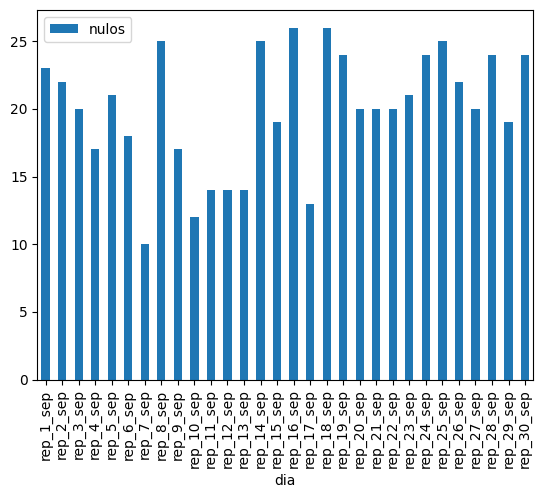

In [ ]:
aux = pd.DataFrame(df_popularidad_tratado.isna().sum()).reset_index()
aux.columns=['dia', 'nulos']
aux = aux.loc[(aux['dia']!= 'id_cancion') & (aux['dia']!= 'rep_total_sep')]
aux.plot.bar(x='dia', y='nulos')

Existen bastantes valores nulos. Ahora vamos a ver si existen valores negativos, que también serían datos erróneos.

In [ ]:
columnas_a_excluir = ['id_cancion', 'rep_total_sep']

total_neg = (df_popularidad_tratado.drop(columns=columnas_a_excluir) < 0).sum()
total_neg

rep_1_sep     19
rep_2_sep     22
rep_3_sep     10
rep_4_sep     19
rep_5_sep     19
rep_6_sep     24
rep_7_sep     24
rep_8_sep     15
rep_9_sep     28
rep_10_sep    13
rep_11_sep    23
rep_12_sep    30
rep_13_sep    22
rep_14_sep    20
rep_15_sep    25
rep_16_sep    26
rep_17_sep    28
rep_18_sep    27
rep_19_sep    29
rep_20_sep    28
rep_21_sep    21
rep_22_sep    19
rep_23_sep    27
rep_24_sep    22
rep_25_sep    27
rep_26_sep    18
rep_27_sep    33
rep_28_sep    36
rep_29_sep    24
rep_30_sep    17
dtype: int64

In [ ]:
total_neg.sum()

695

Vemos que no existe un patrón claro en el que se identifiquen bajadas o subidas durante los diferentes días de la semana.

<Axes: xlabel='dia'>

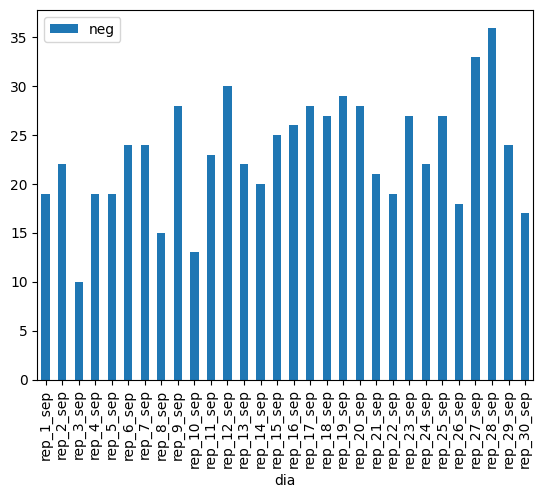

In [ ]:
aux2 = pd.DataFrame(total_neg).reset_index()
aux2.columns=['dia', 'neg']
aux2.plot.bar(x='dia', y='neg')

También hay bastantes. Vamos a ver la suma por columnas de valores nulos y negativos.

In [ ]:
total_nulos = df_popularidad_tratado.drop(columns=columnas_a_excluir).isna().sum()
total_nulos + total_neg

rep_1_sep     42
rep_2_sep     44
rep_3_sep     30
rep_4_sep     36
rep_5_sep     40
rep_6_sep     42
rep_7_sep     34
rep_8_sep     40
rep_9_sep     45
rep_10_sep    25
rep_11_sep    37
rep_12_sep    44
rep_13_sep    36
rep_14_sep    45
rep_15_sep    44
rep_16_sep    52
rep_17_sep    41
rep_18_sep    53
rep_19_sep    53
rep_20_sep    48
rep_21_sep    41
rep_22_sep    39
rep_23_sep    48
rep_24_sep    46
rep_25_sep    52
rep_26_sep    40
rep_27_sep    53
rep_28_sep    60
rep_29_sep    43
rep_30_sep    41
dtype: int64

In [ ]:
(total_nulos + total_neg).sum()

1294

Los valores nulos y negativos de las reproducciones diarias pueden desvirtuar futuros cálculos. Por eso, hemos decidido sustituir estos valores por la mediana de las reproducciones de cada cancion durante el mes de septiembre.

In [ ]:
df_popularidad_tratado['mediana'] = df_popularidad_tratado[nombres_columnas].median(axis=1)

for rep in nombres_columnas:
  df_popularidad_tratado.loc[(df_popularidad_tratado[rep]<0) | (df_popularidad_tratado[rep].isna()), rep] = df_popularidad_tratado['mediana']

df_popularidad_tratado[nombres_columnas] = df_popularidad_tratado[nombres_columnas].astype(int)
df_popularidad_tratado = df_popularidad_tratado.drop('mediana', axis=1)

df_popularidad_tratado

id_cancion  rep_1_sep  rep_2_sep  rep_3_sep  rep_4_sep  rep_5_sep  \
0    blues.00000.wav      93664       7047      65224      55270      55821   
1    blues.00001.wav      50286      20395      39468      28997      98892   
2    blues.00002.wav      90466      78387      63142        775      77078   
3    blues.00003.wav      91823      59507       1882      83507      35774   
4    blues.00004.wav      10284      36755      10518      16141      83577   
..               ...        ...        ...        ...        ...        ...   
995   rock.00095.wav       1402      31839      84468      55410      99542   
996   rock.00096.wav      25423      92875      28818      79372      84973   
997   rock.00097.wav      70971      29584      20839       4415      48237   
998   rock.00098.wav      54670      27994      72085      44841      63185   
999   rock.00099.wav      69292      76618      61460      60423      46517   

     rep_6_sep  rep_7_sep  rep_8_sep  rep_9_sep  ...  rep_22_sep  rep_23_sep  \
0        27559      34811       4878      11864  ...       26681       75288   
1        22057      30220       4754      66980  ...       19312       57039   
2        13714      27558      41324      49561  ...       26985       48300   
3        26952      80873       1296      62342  ...       70665       67107   
4        62614      23274      26068      61880  ...       39352       65893   
..         ...        ...        ...        ...  ...         ...         ...   
995       3065      44563      38581      42551  ...       33563       88694   
996       1039      51439      84829      67640  ...        7368       97842   
997      10839      26547          0      76022  ...        2182       96256   
998      82457      25950      14757      38732  ...       99061       22388   
999      27492       4832      75973      46517  ...       45210       46517   

     rep_24_sep  rep_25_sep  rep_26_sep  rep_27_sep  rep_28_sep  rep_29_sep  \
0         41101       99048       33960       77865       43481       50607   
1         28638       77905       90054       63121       27927       85260   
2         93387       17919       41324       18319       64733       58397   
3         55232       34833       53132       93305       54372       90403   
4         40346       82972       76992       63248       27434       56810   
..          ...         ...         ...         ...         ...         ...   
995       23101       10797       34580       66815       61890       38581   
996       83698       47869       41769       30733       81427       16122   
997       84355       65954       67667       93680       28167       50728   
998       24780       21924       85098        8707       46738       19592   
999       46517       86391       76554       74174       15023         992   

     rep_30_sep  rep_total_sep  
0         68495        1336073  
1         41753        1216359  
2         34834        1329694  
3         21242        1565219  
4         23314        1323027  
..          ...            ...  
995       14983        1219622  
996           0        1488438  
997       98972        1418327  
998       50087        1253333  
999       42261        1264124  

[1000 rows x 32 columns]

Comprobamos que se han sustituido los valores negativos y nulos.

In [ ]:
df_popularidad_tratado.isna().sum()

id_cancion       0
rep_1_sep        0
rep_2_sep        0
rep_3_sep        0
rep_4_sep        0
rep_5_sep        0
rep_6_sep        0
rep_7_sep        0
rep_8_sep        0
rep_9_sep        0
rep_10_sep       0
rep_11_sep       0
rep_12_sep       0
rep_13_sep       0
rep_14_sep       0
rep_15_sep       0
rep_16_sep       0
rep_17_sep       0
rep_18_sep       0
rep_19_sep       0
rep_20_sep       0
rep_21_sep       0
rep_22_sep       0
rep_23_sep       0
rep_24_sep       0
rep_25_sep       0
rep_26_sep       0
rep_27_sep       0
rep_28_sep       0
rep_29_sep       0
rep_30_sep       0
rep_total_sep    0
dtype: int64

In [ ]:
(df_popularidad_tratado.drop(columns=columnas_a_excluir) < 0).sum()

rep_1_sep     0
rep_2_sep     0
rep_3_sep     0
rep_4_sep     0
rep_5_sep     0
rep_6_sep     0
rep_7_sep     0
rep_8_sep     0
rep_9_sep     0
rep_10_sep    0
rep_11_sep    0
rep_12_sep    0
rep_13_sep    0
rep_14_sep    0
rep_15_sep    0
rep_16_sep    0
rep_17_sep    0
rep_18_sep    0
rep_19_sep    0
rep_20_sep    0
rep_21_sep    0
rep_22_sep    0
rep_23_sep    0
rep_24_sep    0
rep_25_sep    0
rep_26_sep    0
rep_27_sep    0
rep_28_sep    0
rep_29_sep    0
rep_30_sep    0
dtype: int64

##1.5 Listas en las que están las canciones

###1.5.1 Descubrimiento

Tras cargar el documento y ver que está compuesto por el nombre de cada cancion y una lista de los nombres de las listas de reproducción donde ha sido guardada cada cancion, creamos el dataset para poder hacer una primera visualización.

In [ ]:
#Subimos el archivo listas.json

with open('/content/drive/MyDrive/Clasificacion de canciones/data/listas.json') as json_data:
    data = json.load(json_data)

In [ ]:
#Vemos cuál es el número total de listas que existen en el documento, para ver a qué nos enfrentamos

total_listas = []
for cancion in data.keys():
  total_listas += data[cancion]
total_listas = list(set(total_listas))

len(total_listas)

50923

In [ ]:
#Creamos tablas por cada cancion y las listas en las que se encuenta

listas_tablas_canciones = []

for cancion in data.keys():
  listas_cancion = data[cancion]
  df_cancion = pd.DataFrame({'listas_base':listas_cancion})
  df_cancion['t_id']=cancion
  listas_tablas_canciones.append(df_cancion)

df_listas = pd.concat(listas_tablas_canciones)
display(df_listas)

listas_base             t_id
0   13_hkm-dak_53  blues.00000.wav
1   87_vio-pis_64  blues.00000.wav
2   74_ttp-exw_78  blues.00000.wav
3   84_kes-ggj_88  blues.00000.wav
4   65_vqt-xlw_66  blues.00000.wav
..            ...              ...
18  84_spq-tob_81   rock.00099.wav
19   19_bam-pep_6   rock.00099.wav
20  58_asb-ffn_72   rock.00099.wav
21  40_xyo-jwu_40   rock.00099.wav
22   52_wrf-eoq_1   rock.00099.wav

[50923 rows x 2 columns]

Como sabemos que los nombres de las listas se componen del nombre de las listas y de los usuarios, separamos ambas columnas.

In [ ]:
df_listas[['lista', 'usuario']] = df_listas['listas_base'].str.split('-', 1, expand=True)
df_listas.rename(columns={'t_id': 'id_cancion'}, inplace=True)

#Comprobamos que todas las listas se componen de los usuarios
df_listas['coincidencia'] = df_listas.apply(lambda i: i['usuario'] in i['listas_base'], axis=1)

df_listas

<ipython-input-84-081d6f84c7fd>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_listas[['lista', 'usuario']] = df_listas['listas_base'].str.split('-', 1, expand=True)


listas_base       id_cancion   lista usuario  coincidencia
0   13_hkm-dak_53  blues.00000.wav  13_hkm  dak_53          True
1   87_vio-pis_64  blues.00000.wav  87_vio  pis_64          True
2   74_ttp-exw_78  blues.00000.wav  74_ttp  exw_78          True
3   84_kes-ggj_88  blues.00000.wav  84_kes  ggj_88          True
4   65_vqt-xlw_66  blues.00000.wav  65_vqt  xlw_66          True
..            ...              ...     ...     ...           ...
18  84_spq-tob_81   rock.00099.wav  84_spq  tob_81          True
19   19_bam-pep_6   rock.00099.wav  19_bam   pep_6          True
20  58_asb-ffn_72   rock.00099.wav  58_asb  ffn_72          True
21  40_xyo-jwu_40   rock.00099.wav  40_xyo  jwu_40          True
22   52_wrf-eoq_1   rock.00099.wav  52_wrf   eoq_1          True

[50923 rows x 5 columns]

In [ ]:
df_listas.drop('listas_base', axis=1, inplace=True)
df_listas.drop('coincidencia', axis=1, inplace=True)
df_listas

id_cancion   lista usuario
0   blues.00000.wav  13_hkm  dak_53
1   blues.00000.wav  87_vio  pis_64
2   blues.00000.wav  74_ttp  exw_78
3   blues.00000.wav  84_kes  ggj_88
4   blues.00000.wav  65_vqt  xlw_66
..              ...     ...     ...
18   rock.00099.wav  84_spq  tob_81
19   rock.00099.wav  19_bam   pep_6
20   rock.00099.wav  58_asb  ffn_72
21   rock.00099.wav  40_xyo  jwu_40
22   rock.00099.wav  52_wrf   eoq_1

[50923 rows x 3 columns]

Queremos ver en cuántas listas está incluida cada canción, y cuáles son las canciones que están en más y menos listas.

In [ ]:
df_cancion_lista = pd.DataFrame(df_listas.groupby('id_cancion')['lista'].count()).reset_index()
df_cancion_lista.rename(columns={'lista':'n_listas'}, inplace=True)
df_cancion_lista

id_cancion  n_listas
0    blues.00000.wav         8
1    blues.00001.wav        59
2    blues.00002.wav        91
3    blues.00003.wav        73
4    blues.00004.wav        95
..               ...       ...
995   rock.00095.wav        28
996   rock.00096.wav        33
997   rock.00097.wav        14
998   rock.00098.wav        54
999   rock.00099.wav        23

[1000 rows x 2 columns]

In [ ]:
df_cancion_lista.describe()

n_listas
count  1000.000000
mean     50.923000
std      28.773442
min       1.000000
25%      26.000000
50%      51.500000
75%      76.000000
max      99.000000

Vemos que hay canciones incluidas en 99 listas y otras incluidas únicamente en 1 lista. Vamos a ver una distribución del número de listas en las que está incluida cada canción.

<ipython-input-88-95f1f1b29a90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cancion_lista['n_listas'], bins=10)


<Axes: xlabel='n_listas', ylabel='Density'>

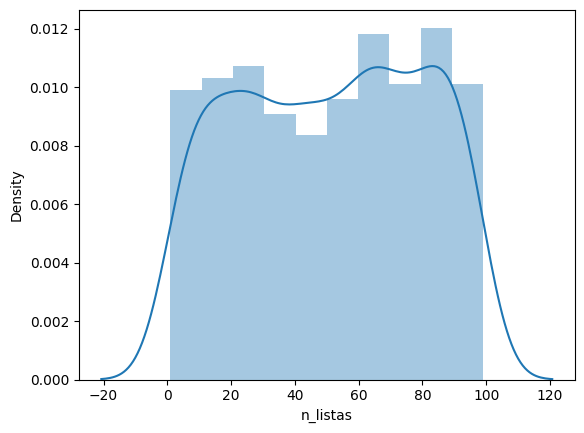

In [ ]:
sns.distplot(df_cancion_lista['n_listas'], bins=10)

###1.5.2 Nulos

Vamos a ver si existen valores nulos.

In [ ]:
df_listas.isna().sum()

id_cancion    0
lista         0
usuario       0
dtype: int64

No existen valores nulos.

##1.6 Favoritos

###1.6.1 Descubrimiento

Tras cargar el documento y ver que está compuesto por el nombre de cada cancion y una lista de usuarios que han añadido esa cancion como favorita, creamos el dataset para poder hacer una primera visualización.

In [ ]:
#Subimos el archivo favoritos.json

with open('/content/drive/MyDrive/Clasificacion de canciones/data/favoritos.json') as json_data:
    datos = json.load(json_data)

In [ ]:
#Creamos tablas por cada usuario y las canciones que tienen en favoritos

usuarios_tablas_favoritos = []

for usuario in datos.keys():
  favoritos = datos[usuario]
  df_usuario = pd.DataFrame({'id_cancion':favoritos})
  df_usuario['usuario']=usuario
  usuarios_tablas_favoritos.append(df_usuario)

df_favoritos = pd.concat(usuarios_tablas_favoritos)
display(df_favoritos)

id_cancion usuario
0       blues.00000.wav  nqp_81
1        jazz.00033.wav  nqp_81
0       blues.00000.wav  cdm_98
1   classical.00028.wav  cdm_98
0       blues.00000.wav   ypb_7
..                  ...     ...
0        rock.00099.wav  ysm_35
0        rock.00099.wav  hhj_16
0        rock.00099.wav  wdc_70
0        rock.00099.wav  agf_66
0        rock.00099.wav   bwo_2

[1554708 rows x 2 columns]

Queremos saber cuántas veces una canción ha sido marcada como favorita.

In [ ]:
df_favoritos.groupby('id_cancion')['usuario'].count().sort_values(ascending=False)

id_cancion
disco.00040.wav        2996
reggae.00049.wav       2996
pop.00087.wav          2992
reggae.00024.wav       2989
blues.00055.wav        2985
                       ... 
blues.00054.wav         109
jazz.00005.wav          101
classical.00098.wav     101
reggae.00056.wav        100
blues.00046.wav         100
Name: usuario, Length: 1000, dtype: int64

Ahora queremos saber cuántas canciones ha marcado como favoritas un mismo usuario.

In [ ]:
df_favoritos.groupby('usuario')['id_cancion'].count().sort_values(ascending=False)

usuario
ivk_58    9
ayy_86    8
clp_71    8
syh_95    8
wfs_98    8
         ..
knk_75    1
knk_78    1
knk_79    1
knk_83    1
mmu_30    1
Name: id_cancion, Length: 984814, dtype: int64

###1.6.2 Nulos

Vemos si existe algún valor nulo.

In [ ]:
df_favoritos.isna().sum()

id_cancion    0
usuario       0
dtype: int64

No existe ninguno.

#2. Diseño e implementación de un modelo de datos relacional y obtención de métricas y KPIs útiles para el negocio

## 2.1 Modelo de datos relacional

Una vez analizados los datos con los que contamos, decidimos cambiar la estructura de algunas de las tablas para tener una bbdd más consistente y dinámica.

###2.1.1 Preparación tablas

####2.1.1.1 Código

Para reducir el peso de las tablas en SQL hemos decidido crear una nueva tabla en la que codificar el id_cancion de todas ellas con un código más reducido en caracteres.

In [ ]:
df_codigo_def = pd.DataFrame(df_canciones['id_cancion'])
df_codigo_def['codigo'] = [i+1 for i in range(df_codigo_def.shape[0])]
df_codigo_def

id_cancion  codigo
0    blues.00000.wav       1
1    blues.00001.wav       2
2    blues.00002.wav       3
3    blues.00003.wav       4
4    blues.00004.wav       5
..               ...     ...
995   rock.00095.wav     996
996   rock.00096.wav     997
997   rock.00097.wav     998
998   rock.00098.wav     999
999   rock.00099.wav    1000

[1000 rows x 2 columns]

In [ ]:
df_codigo_def.dtypes

id_cancion    object
codigo         int64
dtype: object

####2.1.1.2 Canciones

Hemos decidido crear una tabla con la información general de las canciones, con la siguiente información: codigo de la canción, duración, disco, género, autor, colaboradores, discográfica, coste y fecha de publicación.

In [ ]:
df_canciones_def = pd.merge(df_codigo_def, df_canciones_tratado, on='id_cancion', how='left')
df_canciones_def = df_canciones_def.drop('autor', axis=1)
df_canciones_def = df_canciones_def.merge(df_artistas[['id_cancion',	'autor', 'discografica',	'coste']], on=['id_cancion'], how='left')
df_canciones_def = df_canciones_def.merge(df_fecha, on=['id_cancion'], how='left')
df_canciones_def = df_canciones_def.drop('id_cancion', axis=1)
df_canciones_def = df_canciones_def.drop('fecha_entera', axis=1)
df_canciones_def

codigo duracion genero    disco                 autor  \
0         1      138  blues   blues4    Stevie Ray Vaughan   
1         2      142  blues   blues7  Sonny Boy Williamson   
2         3       96  blues   blues5          Muddy Waters   
3         4      111  blues  blues10          Freddie King   
4         5      191  blues   blues1        Memphis Minnie   
..      ...      ...    ...      ...                   ...   
995     996      101   rock   rock19             Pearl Jam   
996     997      170   rock   rock13             The Clash   
997     998      121   rock    rock0         Fleetwood Mac   
998     999       99   rock    rock3           Chuck Berry   
999    1000      144   rock    rock4             Metallica   

           discografica        coste day month  year  
0           Sun Records   744.006861  17    10     X  
1          Epic Records  4178.851293  31     7  2023  
2         Merge Records  3226.400608  14     6  2023  
3      Republic Records  3618.766076  29     5  2023  
4          Jive Records  1990.810773  22     6     X  
..                  ...          ...  ..   ...   ...  
995        Stax Records  3185.879761  20    10  2022  
996         Sun Records   503.650862  24     9  2021  
997       XL Recordings  2170.052880  11     8  2022  
998              Motown  1425.792985  27     2  2022  
999  Def Jam Recordings  4376.347380  13    10  2022  

[1000 rows x 10 columns]

Comprobamos los tipos de datos y realizamos los cambios pertinentes.

In [ ]:
df_canciones_def.dtypes

codigo            int64
duracion         object
genero           object
disco            object
autor            object
discografica     object
coste           float64
day              object
month            object
year             object
dtype: object

In [ ]:
df_canciones_def["duracion"]=df_canciones_def["duracion"].astype(int)
df_canciones_def.dtypes

codigo            int64
duracion          int64
genero           object
disco            object
autor            object
discografica     object
coste           float64
day              object
month            object
year             object
dtype: object

####2.1.1.3 Colaboradores

Con vistas a la escalabilidad de la base de datos hemos decidido hacer una lista de colaboradores independiente, ya que no sabemos cuántas canciones con cuántas colaboraciones pueden entrar en el futuro. Puede que en el futuro haya más de 3 colaboradores en una canción.

In [ ]:
with open('/content/drive/MyDrive/Clasificacion de canciones/data/artistainfo.json', 'r') as f:
    artista_json = json.load(f)
    f.close()
keys_artista=list(artista_json.keys())
values_artista=list(artista_json.values())

lista_colaboradores = []

for i,x in enumerate(keys_artista):
    if len(values_artista[i]["artistas"])>1:
        for colaboradores in values_artista[i]["artistas"][1:]:
            lista_colaboradores.append({"id_cancion":x,"colaborador":colaboradores})

df_colaboradores = pd.DataFrame(lista_colaboradores)
df_colaboradores = pd.merge(df_codigo_def, df_colaboradores, on='id_cancion', how='right')
df_colaboradores = df_colaboradores.drop('id_cancion', axis=1)
df_colaboradores

codigo     colaborador
0         2       Buddy Guy
1         3    Bessie Smith
2         5    Bonnie Raitt
3         6  Susan Tedeschi
4         7  Robert Johnson
..      ...             ...
366     987    Jimi Hendrix
367     988      The Police
368     988       Radiohead
369     994           Oasis
370     995     Deep Purple

[371 rows x 2 columns]

####2.1.1.4 Popularidad/Reproducciones

Con vistas a exportar la información a SQL para realizar las pertinentes consultas, así como investigar diversos KPIs, se va a estructurar la información en una nueva tabla, de manera que todos los valores de reproducciones se encuentren todos bajo una misma columna, lo cual facilitará a posteriori las consultas en SQL. Además, se creará una tabla adicional que recogerá para cada canción el total de reproducciones del mes estudiado, calculando dichos datos manualmente a partir de los datos de reproducciones diarios. Esto se realizará de esta manera dado que los datos de reproducciones totales recogidos del dataframe original no eran fiables.

In [ ]:
with open('/content/drive/MyDrive/Clasificacion de canciones/data/popularidad.json') as f:
    popularidad_json = json.load(f)
    f.close()

keys_popularidad=list(popularidad_json.keys())
values_popularidad=list(popularidad_json.values())

In [ ]:
mylist_dia=[]
mylist_mes=[]
for i,x in enumerate(values_popularidad):
    dia=1
    true_values=np.array([a for a in x["reproducciones"] if a is not None and a>=0 and type(a)==int])
    median=np.median(true_values)
    rep_mes=int(sum(true_values)+median*(len(x["reproducciones"])-len(true_values)))
    mylist_mes.append({"id_cancion":keys_popularidad[i],"total_reproducciones":rep_mes})
    for y in x["reproducciones"]:
        if y is not None and y>=0 and type(y)==int:
            mylist_dia.append({"id_cancion":keys_popularidad[i],"dia":dia,"reproducciones":y})
        else:
            mylist_dia.append({"id_cancion":keys_popularidad[i],"dia":dia,"reproducciones":median})
        dia+=1

Creamos el 1er dataframe: reproducciones por dia

In [ ]:
#Creación del dataframe reproducciones por día
df_reproducciones=pd.DataFrame(mylist_dia)
df_reproducciones=df_codigo_def.merge(df_reproducciones, on='id_cancion', how='left')
df_reproducciones_def=df_reproducciones.drop('id_cancion', axis=1)
display(df_reproducciones_def.head(5))

codigo  dia  reproducciones
0       1    1         93664.0
1       1    2          7047.0
2       1    3         65224.0
3       1    4         55270.0
4       1    5         55821.0

Comprobamos el tipo de dato que tiene y hacemos los cambios pertinentes.

In [ ]:
df_reproducciones_def.dtypes

codigo              int64
dia                 int64
reproducciones    float64
dtype: object

In [ ]:
df_reproducciones_def["reproducciones"]=df_reproducciones_def["reproducciones"].astype(int)
df_reproducciones_def["dia"]=df_reproducciones_def["dia"].astype(str)

Comprobamos los cambios.

In [ ]:
df_reproducciones_def.dtypes

codigo             int64
dia               object
reproducciones     int64
dtype: object

Creamos el siguiente dataframe de reproducciones totales.

In [ ]:
#Creación del dataframe reproducciones totales
df_reproducciones_total=pd.DataFrame(mylist_mes)
df_reproducciones_total=df_codigo_def.merge(df_reproducciones_total, on='id_cancion', how='left')
df_reproducciones_total_def=df_reproducciones_total.drop('id_cancion', axis=1)
display(df_reproducciones_total_def.head(5))

codigo  total_reproducciones
0       1               1554092
1       2               1216359
2       3               1371018
3       4               1687101
4       5               1367998

De nuevo, comprobamos el tipo de dato y realizamos los cambios pertinentes.

In [ ]:
df_reproducciones_total_def.dtypes

codigo                  int64
total_reproducciones    int64
dtype: object

####2.1.1.5 Listas

En listas vamos a cambiar la columna de id_canción por el código correspondiente.

In [ ]:
df_listas=df_codigo_def.merge(df_listas, on='id_cancion', how='left')
df_listas_def=df_listas.drop('id_cancion', axis=1)
display(df_listas_def.head(5))

codigo   lista usuario
0       1  13_hkm  dak_53
1       1  87_vio  pis_64
2       1  74_ttp  exw_78
3       1  84_kes  ggj_88
4       1  65_vqt  xlw_66

Comprobamos el tipo de dato y realizamos los cambios pertinentes.

In [ ]:
df_listas_def.dtypes

codigo      int64
lista      object
usuario    object
dtype: object

####2.1.1.6 Favoritos

En favoritos vamos a cambiar la columna de id_canción por el código correspondiente.

In [ ]:
df_favoritos=df_codigo_def.merge(df_favoritos, on='id_cancion', how='left')
df_favoritos_def=df_favoritos.drop('id_cancion', axis=1)
display(df_favoritos_def.head(5))

codigo usuario
0       1  nqp_81
1       1  cdm_98
2       1   ypb_7
3       1   qux_5
4       1  fdc_56

Comprobamos el tipo de dato y realizamos los cambios pertinentes.

In [ ]:
df_favoritos_def.dtypes

codigo      int64
usuario    object
dtype: object

###2.1.2 Modelo

 Para poder crear la base de datos en MySQL (herramienta elegida paragestionar la nueva base de datos de la compañía por su facilidad de uso, rendimiento y escalabilidad) y generar el modelo de datos relacional, hemos transformado los documentos .json a csv para importarlos de manera fácil y rápida.

In [ ]:
#Guardamos los df en documentos .csv para importarlos a la base de datos SQL

# df_codigo_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_codigo.csv', index=False)
# df_canciones_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_canciones.csv', index=False)
# df_colaboradores.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_colaboradores.csv', index=False)
# df_reproducciones_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_reproducciones.csv', index=False)
# df_reproducciones_total_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_reproducciones_total.csv', index=False)
# df_listas_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_listas.csv', index=False)
# df_favoritos_def.to_csv('/content/drive/MyDrive/Clasificacion de canciones/data/df_favoritos.csv', index=False)

Una vez creada la base de datos SQL, hemos hecho un esquema relacional de los datos:

[Imagen del Modelo Relacional](https://drive.google.com/file/d/119Euk08nluK0Oh2_abrUzRuLahY2vUph/view?usp=drive_link)

## 2.2 KPIs de negocio


###2.2.1 Calcular la media diaria de reproducciones durante el mes de septiembre.


In [ ]:
#Sumamos el número de reproducciones por dia, y hacemos la media

(df_reproducciones_def['reproducciones']).mean().round(0)

49977.0

###2.2.2 Calcular el número total de reproducciones.

In [ ]:
#Hacemos la suma total de todas las reproducciones durante el mes de septiembre

df_reproducciones_total['total_reproducciones'].sum()

1499321619

###2.2.3 ¿Qué días del mes se han reproducido más canciones y cuántas?

In [ ]:
#Hacemos un sumatorio de las reproducciones por día, y ordenamos por los días con más reproducciones, indicando el nº de reproducciones correspondiente

df_dias_top = df_reproducciones_def.groupby('dia')['reproducciones'].sum()

pd.DataFrame(df_dias_top).sort_values('reproducciones', ascending=False).head(5)

reproducciones
dia                
29         52103482
12         51671536
14         50985893
30         50952206
11         50925137

###2.2.4 ¿Qué día del mes suelen publicarse más canciones y cuántas?

In [ ]:
#Agrupamos por los días del mes y el número de canciones que se han publicado cada uno de ellos, ordenando por los días con mayor nº de publicaciones

df_fecha[(df_fecha['day']!='X')].groupby('day')['id_cancion'].count().sort_values(ascending=False).head(3)


day
20    38
28    38
3     36
Name: id_cancion, dtype: int64

###2.2.5 ¿Cuáles son los 5 usuarios que más canciones han añadido a favoritos y cuántas?

In [ ]:
#Agrupamos por los usuarios y el número de canciones que han añadido a favoritos cada uno, ordenando por los que más cantidad de canciones han añadido

df_favoritos.groupby('usuario')['id_cancion'].count().sort_values(ascending=False).head(5)

usuario
ivk_58    9
ayy_86    8
clp_71    8
syh_95    8
wfs_98    8
Name: id_cancion, dtype: int64

###2.2.6 ¿Cuáles son los 5 usuarios que menos canciones han añadido a favoritos y cuántas?

In [ ]:
#Agrupamos por los usuarios y el número de canciones que han añadido a favoritos cada uno, ordenando por los que menos cantidad de canciones han añadido

df_favoritos.groupby('usuario')['id_cancion'].count().sort_values(ascending=True).head(5)

usuario
aaa_0     1
omg_53    1
omg_55    1
omg_56    1
omg_61    1
Name: id_cancion, dtype: int64

###2.2.7 ¿Cuáles son las 10 discográficas que han recibido más dinero y cuánto?

In [ ]:
#Agrupamos por los discograficas y el dinero total que ha recibido cada una de ellas, ordenando por las que más cantidad de dinero han recibido

df_discograficas = df_artistas.groupby('discografica', as_index=False)['coste'].sum().sort_values('coste', ascending=False).reset_index(drop=True).head(10)
df_discograficas.round(2)

discografica      coste
0        Merge Records  240371.70
1                  4AD  124224.90
2   Interscope Records  119518.98
3          RCA Records  115936.86
4          Sun Records  109791.74
5      Wind-Up Records  108225.18
6        XL Recordings  107870.49
7       Arista Records  105844.75
8     Atlantic Records  105254.98
9  Rough Trade Records  102346.73

###2.2.8 ¿Cuáles son los 3 artistas que más colaboraciones con otros artistas han hecho?

In [ ]:
#Hacemos una agrupación por artistas contando el número de colaboraciones de cada uno, y ordenándolo por los que han realizado más colaboraciones

df_aux = df_artistas.loc[df_artistas['colaborador_1']!='']
df_aux.groupby('autor')['colaborador_1'].count().sort_values(ascending=False).head(3)

autor
J. Cole       4
Zayn Malik    4
Protoje       4
Name: colaborador_1, dtype: int64

###2.2.9 ¿Cuáles son los 3 artistas que han interpretado menos canciones de otros compositores?

In [ ]:
#Agrupamos por colaborador y contamos el número de colaboraciones por cada uno de ellos, ordenando por los que menos colaboraciones tienen
df_colaboradores.groupby('colaborador')['colaborador'].count().sort_values(ascending=True).head(3)

colaborador
Ziggy Marley    1
Rakim           1
Joe Pass        1
Name: colaborador, dtype: int64

###2.2.10 ¿Cuántas canciones de cada género hay?

In [ ]:
#Agrupamos por generos y sumamos el número de canciones por cada uno de ellos

df_canciones.groupby('genero')['id_cancion'].count()

genero
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: id_cancion, dtype: int64

###2.2.11 ¿Cuáles son los discos más escuchados?

In [ ]:
#Cogemos las columnas de cancion y el total de reproducciones de septiembre de cada una
#Consideramos rep_total_sep un dato más fiable y representativo que el dato de reproducciones totales
#Añadimos la columna de discos a los que pertenece cada cancion

df_discos_top = pd.merge(df_reproducciones_total, df_canciones_def[['codigo', 'disco']], on='codigo', how='left')

#Agrupamos por los discos y añadimos la suma de las reproducciones de las canciones que pertenecen a cada disco, ordenando por los discos de mayor nº de reproducciones

df_discos_top.groupby('disco')['total_reproducciones'].sum().sort_values(ascending=False).head(3)

disco
jazz3       20423383
country2    17837036
metal9      16597921
Name: total_reproducciones, dtype: int64

###2.2.12 ¿Cuál es la media de canciones que tiene un disco?

In [ ]:
#Hacemos la media del número de canciones que tiene un disco

df_can_dis = pd.DataFrame(df_canciones.groupby('disco', as_index=False)['id_cancion'].count())
df_can_dis.columns=['dis', 'n_can']
df_can_dis.mean()

<ipython-input-121-1c010c622735>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_can_dis.mean()


n_can    5.0
dtype: float64

###2.2.13 ¿Cuál es la cuantía total de cada tipo de canción que cobran las 5 discográficas que han recibido más dinero?

In [ ]:
#Hacemos una agrupacion por genero musical y el precio de las canciones de cada uno de ellos, filtrando por las 5 discograficas que han recibido más dinero

top_5_discograficas = df_discograficas.head(5)['discografica'].tolist()

df_canciones_def[df_canciones_def['discografica'].isin(top_5_discograficas)].groupby('genero', as_index=False)['coste'].sum().round(2).sort_values(by='coste',ascending=False)

genero     coste
9       rock  87787.48
5       jazz  87181.95
2    country  82634.04
1  classical  80361.17
4     hiphop  76459.08
0      blues  72498.38
8     reggae  69557.45
6      metal  54173.61
7        pop  50534.55
3      disco  48656.48

###2.2.14 Para cada disco calcular la duración total.

In [ ]:
#Agrupamos por disco y la suma de la duracion de las canciones que pertenecen a cada uno de ellos

df_duracion_discos = pd.DataFrame(df_canciones_def.groupby('disco')['duracion'].sum())
df_duracion_discos

duracion
disco            
blues0       1500
blues1        191
blues10       230
blues11       538
blues12      1300
...           ...
rock5        1332
rock6         340
rock7         221
rock8         571
rock9         129

[200 rows x 1 columns]

Hay 200 discos, por lo que esta información no se puede ver de una manera clara. Veamos la distribución de la duración de los discos.

In [ ]:
df_duracion_discos.describe()

duracion
count   200.000000
mean    722.450000
std     364.114024
min      99.000000
25%     462.000000
50%     675.500000
75%     901.500000
max    2175.000000

Los discos con mayor duración.

In [ ]:
df_duracion_discos.sort_values(by='duracion', ascending=False).head(3)

duracion
disco            
jazz3        2175
metal19      1820
pop16        1820

Los discos con menor duración.

In [ ]:
df_duracion_discos.sort_values(by='duracion', ascending=True).head(3)

duracion
disco            
reggae0        99
rock9         129
rock14        156

Probablemente discos que contienen únicamente 1 canción.

In [ ]:
disco_corto = pd.DataFrame(df_canciones_def.groupby('disco', as_index=False)['codigo'].nunique())
disco_corto = disco_corto.rename(columns= {'codigo':'cancion'})
disco_corto.loc[(disco_corto['disco']=='reggae0') | (disco_corto['disco']=='rock9') | (disco_corto['disco']=='rock14')]

disco  cancion
160  reggae0        1
186   rock14        1
199    rock9        2

El disco rock9 tiene 2 canciones, los otros 2 tienen 1 canción.

###2.2.15 Calcular la media de duración de los discos.

In [ ]:
#Calculamos la media de la duracion de los discos

df_duracion_discos['duracion'].mean()

722.45

###2.2.16 Identificar las canciones más veces incluidas en listas de reproducción.

In [ ]:
df_can_list = df_listas_def.groupby('codigo')['lista'].count().sort_values(ascending=False).head(10)
df_can_list = pd.merge(df_can_list, df_codigo_def, on=['codigo'], how='left')
df_can_list

codigo  lista           id_cancion
0     629     99      metal.00028.wav
1     350     99      disco.00049.wav
2     115     99  classical.00014.wav
3     567     99       jazz.00066.wav
4     697     99      metal.00096.wav
5     819     99     reggae.00018.wav
6      46     99      blues.00045.wav
7     648     99      metal.00047.wav
8     894     99     reggae.00093.wav
9     910     98       rock.00009.wav

###2.2.17 Identificar las 5 canciones más veces incluidas en favoritos.

In [ ]:
df_can_fav = df_favoritos_def.groupby('codigo')['usuario'].count().sort_values(ascending=False).head(5)
df_can_fav = pd.merge(df_can_fav, df_codigo_def, on=['codigo'], how='left')
df_can_fav

codigo  usuario        id_cancion
0     341     2996   disco.00040.wav
1     850     2996  reggae.00049.wav
2     788     2992     pop.00087.wav
3     825     2989  reggae.00024.wav
4      56     2985   blues.00055.wav

# 3. Modelo de detección de género musical

## 3.1 Modelo de Machine Learning

### 3.1.1 Identificación del problema y objetivos

**¿Qué queremos conseguir con el modelo?**

Queremos construir un modelo capaz de clasificar canciones en los diferentes géneros musicales de manera rápida. Es decir, que dada una canción, el modelo sea capaz de identificar en pocos segundos si se trata de un tema pop, rock, blues, jazz, etc.

**¿Qué consideramos como un modelo aceptable?**


Consideraremos que el modelo es aceptable cuando:

*   Tenga un porcentaje de acierto alto para todas las clases (80%).
*   El modelo pueda ser re-entrenado y ejecutado dentro de un tiempo aceptable. Por ejemplo, en ejecuciones diarias o mensuales el tiempo no suele ser relevante. Mientras que en ejecuciones en tiempo real sí lo es.

**¿Qué restricciones posee nuestro problema?**

En principio no contamos con restricciones de almacenamiento o memoria.
Al no tratarse de un sector fuertemente regulado como pueden ser la banca o el sector asegurador, tampoco tenemos restricciones o limitaciones en el ámbito de la explicabilidad.

**¿Con qué datos contamos para resolver el problema?**

Además de los datos más relativos a negocio analizados anteriormente, contamos con información sobre características estadísticas de cada canción como el tempo medio, el desplazamiento cromático RMS, etc. Tenemos un dataset con muestras de 30 seg y otro con subsecciones de 3 seg de cada canción. Veamos cómo son esos datos y cuáles utilizaremos finalmente para los modelos.

### 3.1.2 Análisis exploratorio, limpieza de datasets y selección de datos

#### 3.1.2.1 Características 30 seg

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Hay 1000 filas y 60 columnas.

In [ ]:
df_caracteristicas_30s = pd.read_csv('/content/drive/MyDrive/Clasificacion de canciones/data/features_30_sec.csv')
df_caracteristicas_30s.rename(columns={'filename':'id_cancion'}, inplace=True)
df_caracteristicas_30s

id_cancion  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock 

Vamos a ver el nombre de todas las columnas y el tipo de dato que contienen para entender mejor toda la información que tenemos en el dataset.

In [ ]:
df_caracteristicas_30s.dtypes

id_cancion                  object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

Comprobamos que no hay nulos ni datos erróneos.

In [ ]:
#Vemos los nulos por columnas

df_caracteristicas_30s.isna().sum()

id_cancion                 0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
#Outliers o datos raros

report = sv.analyze(df_caracteristicas_30s)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


En principio no hay datos nulos ni erróneos a simple vista. Los datos de las diferentes columnas tienen distintas distribuciones, pero en su mayoría no presentan outliers.

Realizamos un análisis de correlación para reducir eliminar variables redundantes. Veamos aquellas variables con una correlación superior/inferior al +/-85%.

In [ ]:
df_corr=pd.DataFrame(df_caracteristicas_30s.corr().unstack(),columns=['Correlación'])

df_corr[(df_corr['Correlación']>=0.85) & (df_corr['Correlación']<1)]

<ipython-input-121-291850e0ef82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=pd.DataFrame(df_caracteristicas_30s.corr().unstack(),columns=['Correlación'])


Correlación
rms_mean                harmony_var                 0.893898
spectral_centroid_mean  spectral_bandwidth_mean     0.904435
                        rolloff_mean                0.979637
                        zero_crossing_rate_mean     0.874749
spectral_bandwidth_mean spectral_centroid_mean      0.904435
                        rolloff_mean                0.956189
spectral_bandwidth_var  rolloff_var                 0.884877
rolloff_mean            spectral_centroid_mean      0.979637
                        spectral_bandwidth_mean     0.956189
rolloff_var             spectral_bandwidth_var      0.884877
zero_crossing_rate_mean spectral_centroid_mean      0.874749
harmony_var             rms_mean                    0.893898
mfcc19_var              mfcc20_var                  0.868718
mfcc20_var              mfcc19_var                  0.868718

In [ ]:
df_corr[(df_corr['Correlación']<=-0.85) & (df_corr['Correlación']>-1)]

Correlación
spectral_centroid_mean  mfcc2_mean                 -0.940180
spectral_bandwidth_mean mfcc2_mean                 -0.896652
rolloff_mean            mfcc2_mean                 -0.934302
mfcc2_mean              spectral_centroid_mean     -0.940180
                        spectral_bandwidth_mean    -0.896652
                        rolloff_mean               -0.934302

Análisis en mayor detalle de las variables con una correlación inferior al 90%

In [ ]:
comparison=df_corr.loc['rms_mean'].assign(harmony_var=df_corr.loc['harmony_var'].values)
comparison=comparison.rename(columns={'Correlación': 'rms_mean'})
comparison['comparison']=comparison['rms_mean']-comparison['harmony_var']
display(comparison.describe())

comparison=df_corr.loc['spectral_bandwidth_var'].assign(rolloff_var=df_corr.loc['rolloff_var'].values)
comparison=comparison.rename(columns={'Correlación': 'spectral_bandwidth_var'})
comparison['comparison']=comparison['spectral_bandwidth_var']-comparison['rolloff_var']
display(comparison.describe())

comparison=df_corr.loc['mfcc19_var'].assign(mfcc20_var=df_corr.loc['mfcc20_var'].values)
comparison=comparison.rename(columns={'Correlación': 'mfcc19_var'})
comparison['comparison']=comparison['mfcc19_var']-comparison['mfcc20_var']
display(comparison.describe())

rms_mean  harmony_var  comparison
count  58.000000    58.000000   58.000000
mean    0.128315     0.131273   -0.002958
std     0.296742     0.232290    0.107543
min    -0.484057    -0.332639   -0.151417
25%    -0.028201     0.009672   -0.097424
50%     0.100816     0.073096   -0.019525
75%     0.196594     0.201930    0.064599
max     1.000000     1.000000    0.247771

spectral_bandwidth_var  rolloff_var  comparison
count               58.000000    58.000000   58.000000
mean                 0.173913     0.207757   -0.033844
std                  0.285596     0.299600    0.074342
min                 -0.353658    -0.375313   -0.218422
25%                  0.026765     0.052597   -0.050156
50%                  0.123702     0.196358   -0.019537
75%                  0.347627     0.411571    0.003183
max                  1.000000     1.000000    0.199952

mfcc19_var  mfcc20_var  comparison
count   58.000000   58.000000   58.000000
mean     0.139516    0.124070    0.015446
std      0.315065    0.322550    0.039934
min     -0.501768   -0.548577   -0.131282
25%     -0.055667   -0.103022   -0.007821
50%      0.087920    0.071619    0.020379
75%      0.317390    0.299677    0.038605
max      1.000000    1.000000    0.131282

Como puede observarse, tanto la media como las desviaciones estándar de las correlaciones de cada par de variables son muy similares, por lo que se procederá a eliminar una de ellas.

In [ ]:
#Se eliminan las siguientes variables con correlaciones muy altas:
df_caracteristicas_30s=df_caracteristicas_30s.drop(['mfcc2_mean','spectral_centroid_mean','rolloff_mean','harmony_var','rolloff_var'],axis=1)

In [ ]:
#Adicionalmente, se eliminará la columna length al ser prácticamente invariable para todos los registros
#No aporta información de valor al problema, como puede observarse en la desviación estándar, que apenas representa un 0.5% con respecto al valor medio.

print(2*df_caracteristicas_30s['length'].std()/df_caracteristicas_30s['length'].mean()*100)
df_caracteristicas_30s=df_caracteristicas_30s.drop(['length'],axis=1)

0.5389700502931094


<ipython-input-125-9718642738b9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_caracteristicas_30s.corr()


<Axes: >

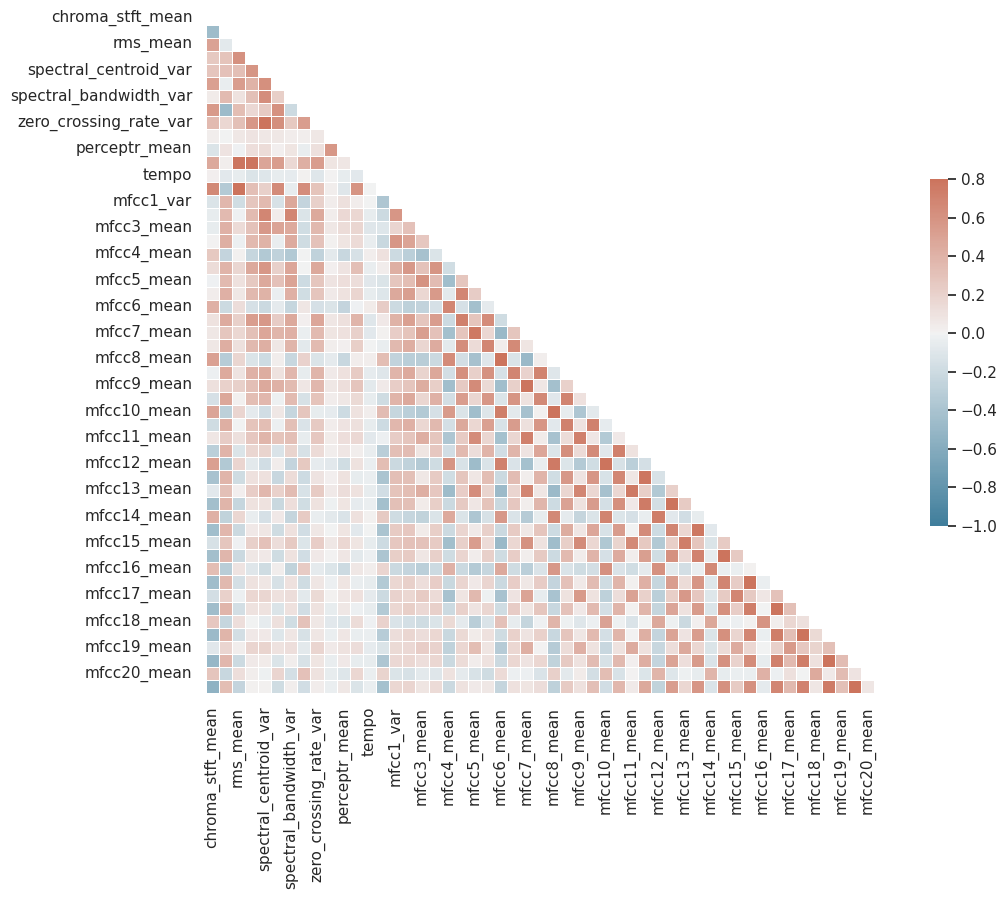

In [ ]:
import matplotlib.pyplot as plt

sns.set_theme(style='white')
# Compute the correlation matrix
corr = df_caracteristicas_30s.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1,vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

#### 3.1.2.2 Características 3 seg

En una primera visualización del dataset vemos las columnas que contiene y qué datos hay en cada una de ellas. Hay 9990 filas y 60 columnas.

In [ ]:
df_caracteristicas_3s = pd.read_csv('/content/drive/MyDrive/Clasificacion de canciones/data/features_3_sec.csv')
df_caracteristicas_3s

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

En este caso vemos que para cada canción tenemos una serie temporal con varios puntos. Vamos a crear una nueva columna con el nombre de la canción, para poder relacionarla posteriormente con el resto de datos.

In [ ]:
song_list = []

for filename in list(df_caracteristicas_3s.filename):
  split_name = filename.split('.')
  song_list.append(split_name[0]+'.'+split_name[1]+'.'+split_name[3])

df_caracteristicas_3s['id_cancion'] = song_list
df_caracteristicas_3s

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_mean  \
0                 1972.744388           117335.771563  ...    -3.241280   
1                 2010.051501            65671.875673  ...    -6.055294   
2                 2084.565132            75124.921716  ...    -1.768610   
3                 1960.039988            82913.639269  ...    -3.841155   
4                 1948.503884            60204.020268  ...     0.664582   
...                       ...                     ...  ...          ...   
9985              1718.707215            85931.574523  ...    -9.094270   
9986              1906.468492            99727.037054  ...   -12.375726   
9987              1561.859087           138762.841945  ...    -2.524483   
9988              2018.366254            22860.992562  ...    -5.363541   
9989              1867.422378           119722.211518  ...   -11.598399   

      mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0      36.488243     0.722209   38.099152    -5.050335   33.618073   
1      40.677654     0.159015   51.264091    -2.837699   97.030830   
2      28.348579     2.378768   45.717648    -1.938424   53.050835   
3      28.337118     1.218588   34.770935    -3.580352   50.836224   
4      45.880913     1.689446   51.363583    -3.392489   26.738789   
...          ...          ...         ...          ...         ...   
9985   38.326839    -4.246976   31.049839    -5.625813   48.804092   
9986   66.418587    -3.081278   54.414265   -11.960546   63.452255   
9987   21.778994     4.809936   25.980829     1.775686   48.582378   
9988   17.209942     6.462601   21.442928     2.354765   24.843613   
9989   58.983097    -0.178517   55.761299    -6.903252   39.485901   

      mfcc20_mean  mfcc20_var  label       id_cancion  
0       -0.243027   43.771767  blues  blues.00000.wav  
1        5.784063   59.943081  blues  blues.00000.wav  
2        2.517375   33.105122  blues  blues.00000.wav  
3        3.630866   32.023678  blues  blues.00000.wav  
4        0.536961   29.146694  blues  blues.00000.wav  
...           ...         ...    ...              ...  
9985     1.818823   38.966969   rock   rock.00099.wav  
9986     0.428857   18.697033   rock   rock.00099.wav  
9987    -0.299545   41.5869

Viendo el nº de filas de la tabla df_caracteristicas_30s y esta, no todas las canciones pueden tener el mismo número de registros en esta tabla. 1000 canciones de la 1ª tabla no concuerda con los 9990 de la segunda. Vamos a comprobar cuántos registros hay asociados a cada canción.



In [ ]:
num_puntos = df_caracteristicas_3s.groupby('id_cancion',as_index=False)['filename'].count()
num_puntos

id_cancion  filename
0    blues.00000.wav        10
1    blues.00001.wav        10
2    blues.00002.wav        10
3    blues.00003.wav        10
4    blues.00004.wav        10
..               ...       ...
995   rock.00095.wav        10
996   rock.00096.wav        10
997   rock.00097.wav        10
998   rock.00098.wav        10
999   rock.00099.wav        10

[1000 rows x 2 columns]

Como ya sabemos, no todas las canciones pueden tener 10 puntos de registro. Vamos a ver cuáles son los diferentes datos que tenemos en filename.

In [ ]:
num_puntos.filename.unique()

array([10,  9])

Ahora comprobamos cuáles son las canciones que tienen 9 registros en vez de 10.

In [ ]:
num_puntos[num_puntos['filename']==9]

id_cancion  filename
149  classical.00049.wav         9
151  classical.00051.wav         9
203    country.00003.wav         9
204    country.00004.wav         9
207    country.00007.wav         9
314      disco.00014.wav         9
431     hiphop.00031.wav         9
432     hiphop.00032.wav         9
927       rock.00027.wav         9
938       rock.00038.wav         9

Ahora veamos si tenemos datos nulos.

In [ ]:
df_caracteristicas_3s.isna().sum().sum()

0

Ahora comprobemos si hay outliers o datos raros.

In [ ]:
report = sv.analyze(df_caracteristicas_3s)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


De nuevo, no hay datos nulos ni erróneos a simple vista. Los datos de las diferentes columnas tienen distintas distribuciones pero en su mayoría no presentan outliers.

De nuevo realizamos un análisis de correlación para reducir eliminar variables redundantes. Veamos aquellas variables con una correlación superior/inferior al +/-85%.

In [ ]:
df_corr=pd.DataFrame(df_caracteristicas_3s.corr().unstack(),columns=['Correlación'])

df_corr[(df_corr['Correlación']>=0.85) & (df_corr['Correlación']<1)]

<ipython-input-144-eb3908de1be7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=pd.DataFrame(df_caracteristicas_3s.corr().unstack(),columns=['Correlación'])


Correlación
rms_mean                harmony_var                 0.884846
spectral_centroid_mean  spectral_bandwidth_mean     0.890382
                        rolloff_mean                0.974360
                        zero_crossing_rate_mean     0.865487
spectral_bandwidth_mean spectral_centroid_mean      0.890382
                        rolloff_mean                0.951000
spectral_bandwidth_var  rolloff_var                 0.891339
rolloff_mean            spectral_centroid_mean      0.974360
                        spectral_bandwidth_mean     0.951000
rolloff_var             spectral_bandwidth_var      0.891339
zero_crossing_rate_mean spectral_centroid_mean      0.865487
harmony_var             rms_mean                    0.884846

In [ ]:
df_corr[(df_corr['Correlación']<=-0.85) & (df_corr['Correlación']>-1)]

Correlación
spectral_centroid_mean  mfcc2_mean                 -0.931435
spectral_bandwidth_mean mfcc2_mean                 -0.887156
rolloff_mean            mfcc2_mean                 -0.923652
mfcc2_mean              spectral_centroid_mean     -0.931435
                        spectral_bandwidth_mean    -0.887156
                        rolloff_mean               -0.923652

Análisis en mayor detalle de las variables con una correlación inferior al 90%

In [ ]:
comparison=df_corr.loc['rms_mean'].assign(harmony_var=df_corr.loc['harmony_var'].values)
comparison=comparison.rename(columns={'Correlación': 'rms_mean'})
comparison['comparison']=comparison['rms_mean']-comparison['harmony_var']
display(comparison.describe())

comparison=df_corr.loc['spectral_bandwidth_var'].assign(rolloff_var=df_corr.loc['rolloff_var'].values)
comparison=comparison.rename(columns={'Correlación': 'spectral_bandwidth_var'})
comparison['comparison']=comparison['spectral_bandwidth_var']-comparison['rolloff_var']
display(comparison.describe())

comparison=df_corr.loc['mfcc19_var'].assign(mfcc20_var=df_corr.loc['mfcc20_var'].values)
comparison=comparison.rename(columns={'Correlación': 'mfcc19_var'})
comparison['comparison']=comparison['mfcc19_var']-comparison['mfcc20_var']
display(comparison.describe())

rms_mean  harmony_var  comparison
count  57.000000    57.000000   57.000000
mean    0.147490     0.131073    0.016417
std     0.261596     0.213984    0.091664
min    -0.453606    -0.297483   -0.156123
25%    -0.012401     0.022427   -0.050904
50%     0.087181     0.073491   -0.003608
75%     0.181207     0.175881    0.056073
max     1.000000     1.000000    0.257689

spectral_bandwidth_var  rolloff_var  comparison
count               57.000000    57.000000   57.000000
mean                 0.170366     0.203824   -0.033458
std                  0.260060     0.277426    0.060456
min                 -0.272014    -0.315924   -0.182843
25%                  0.015888     0.035220   -0.044704
50%                  0.101519     0.157281   -0.020061
75%                  0.304600     0.381804   -0.001200
max                  1.000000     1.000000    0.154546

mfcc19_var  mfcc20_var  comparison
count   57.000000   57.000000   57.000000
mean     0.124814    0.111876    0.012937
std      0.225143    0.230241    0.070736
min     -0.313233   -0.363354   -0.341541
25%     -0.011018   -0.030900   -0.007841
50%      0.074366    0.073218    0.015048
75%      0.220721    0.208753    0.028879
max      1.000000    1.000000    0.341541

Como puede observarse, tanto la media como las desviaciones estándar de las correlaciones de cada par de variables son muy similares, por lo que se procederá a eliminar una de ellas.

In [ ]:
#Se eliminan las siguientes variables con correlaciones muy altas:
df_caracteristicas_3s=df_caracteristicas_3s.drop(['mfcc2_mean','spectral_centroid_mean','rolloff_mean','harmony_var','rolloff_var'],axis=1)

In [ ]:
#Adicionalmente, se eliminará la columna length al ser prácticamente invariable para todos los registros
#No aporta información de valor al problema, como puede observarse en la desviación estándar, que apenas representa un 0.5% con respecto al valor medio.

print(2*df_caracteristicas_3s['length'].std()/df_caracteristicas_3s['length'].mean()*100)
df_caracteristicas_3s=df_caracteristicas_3s.drop(['length'],axis=1)

0.0


In [ ]:
df_caracteristicas_3s=df_caracteristicas_3s.drop(['id_cancion'],axis=1)

<ipython-input-150-268685553f4f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_caracteristicas_3s.corr()


<Axes: >

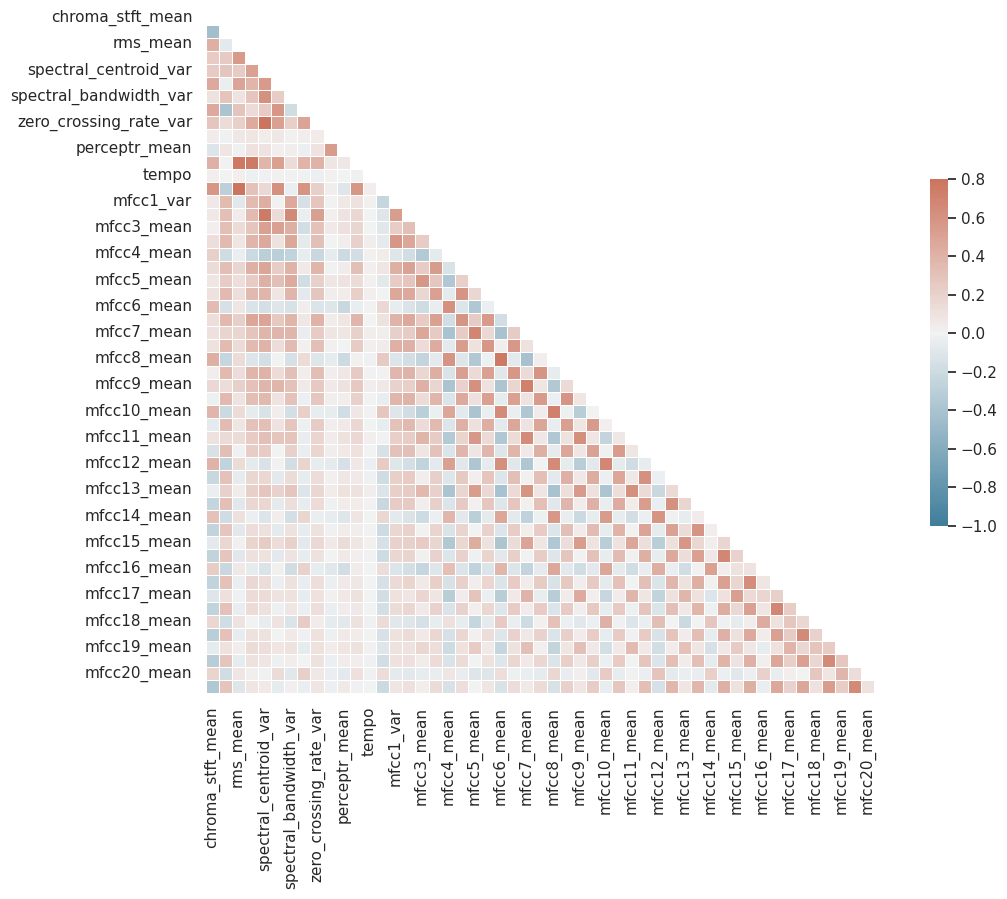

In [ ]:
import matplotlib.pyplot as plt

sns.set_theme(style='white')
# Compute the correlation matrix
corr = df_caracteristicas_3s.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1,vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

Tras un análisis estadistico de los datos de negocio, hemos comprobado que la mayoría de las variables no eran representativas y no iban a aportar valor al problema de clasificación. Además, estos dos datasets de características contienen suficiente información para entrenar los modelos de ML.

### 3.1.3 Selección de algoritmos

Hemos decidido probar diferentes algoritmos para comparar los resultados de los mismos y elegir el que consideremos mejor para el objetivo de negocio. Vamos a probar:

* Modelos de clasificación:
  * Árboles de decisión
  * Regresión Logística
  * KNN (K vecinos más próximos)
  * Naive Bayes
* Ensembles:
  * Random Forest (Bagging)
  * Gradient Boosting (Boosting)
  * AdaBoost (Boosting)



### 3.1.4 Entrenamiento, parametrización y evaluación de los algoritmos

#### 3.1.4.1 Modelos con muestras 30 segundos

In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Para suprimir los warnings deÇ scikitlearn por convergencia prematura
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings("ignore")


Primero utilizamos el dataset Caracteristicas_30s para probar direfentes modelos.

Dividimos el dataset: Train/Test

In [ ]:
X, y = df_caracteristicas_30s.drop(['id_cancion', 'label'], axis=1), df_caracteristicas_30s['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=np.random.seed(0))

print(f'Tamaño train: {X_train.shape}')
print(f'Tamaño test: {X_test.shape}')

Tamaño train: (750, 52)
Tamaño test: (250, 52)


Comprobamos que los datos cogidos para el y_test están respartidos mas o menos de manera uniforme entre las diferentes clases.

In [ ]:
pd.DataFrame(y_test).reset_index().groupby('label').label.count()

label
blues        21
classical    16
country      30
disco        26
hiphop       28
jazz         26
metal        27
pop          26
reggae       20
rock         30
Name: label, dtype: int64

Como nos enfrentamos a un problema de clasificación multiclase en el que las clases son tipo object y algunos modelos no soportan datos no numéricos, vamos a usar OneHotEncoder para cambiar las etiquetas de clase a valores numéricos.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
labels = df_caracteristicas_30s['label'].values.reshape(-1, 1)
y_train_oh = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.values.reshape(-1, 1))

In [ ]:
lista_arrays = [str(fila)for fila in y_train_oh]
df_oh = pd.DataFrame({'genero':y_train, 'array':lista_arrays})

df_oh.drop_duplicates(inplace=True)
df_oh.sort_values(by='genero')

genero                            array
85       blues  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
140  classical  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
253    country  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
342      disco  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
465     hiphop  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
557       jazz  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
667      metal  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
786        pop  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
818     reggae  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
969       rock  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Además, de cara a algunos modelos que pueden dar error con valores no numéricos y con vectores, vamos a hacer una tercera division de 'y' con valores numéricos del 0 al 9.

In [ ]:
clases = list(set(y_train))

y_train_num = [clases.index(elemento) for elemento in y_train]
y_test_num = [clases.index(elemento) for elemento in y_test]

Obtenemos la media y mediana de cada una de las variables

In [ ]:
mean = X_train.mean(axis=0)
median = X_train.median(axis=0)

pd.concat([mean, median, mean-median], axis=1, keys=['Media', 'Mediana', 'Diferencia'])

Media        Mediana     Diferencia
chroma_stft_mean              0.375708       0.380389      -0.004681
chroma_stft_var               0.086549       0.086726      -0.000177
rms_mean                      0.129851       0.120391       0.009460
rms_var                       0.003046       0.001826       0.001221
spectral_centroid_var    470317.225293  338163.318853  132153.906440
spectral_bandwidth_mean    2237.956217    2218.865480      19.090737
spectral_bandwidth_var   137299.607856  111902.117230   25397.490626
zero_crossing_rate_mean       0.103014       0.099180       0.003834
zero_crossing_rate_var        0.002994       0.002021       0.000973
harmony_mean                 -0.000386      -0.000003      -0.000383
perceptr_mean                -0.000395      -0.000032      -0.000363
perceptr_var                  0.005589       0.003360       0.002228
tempo                       119.358691     117.453835       1.904856
mfcc1_mean                 -147.330769    -121.873314     -25.457455
mfcc1_var                  3815.960633    3192.918457     623.042176
mfcc2_var                   707.109708     609.064972      98.044736
mfcc3_mean                   -8.180805      -9.429361       1.248557
mfcc3_var                   474.295928     411.538559      62.757369
mfcc4_mean                   35.924118      36.511314      -0.587196
mfcc4_var                   223.229183     203.742889      19.486293
mfcc5_mean                   -0.994227       0.245390      -1.239616
mfcc5_var                   174.280206     151.788971      22.491235
mfcc6_mean                   14.145230      14.392341      -0.247112
mfcc6_var                   127.342934     114.415840      12.927094
mfcc7_mean                   -4.932194      -5.297551       0.365356
mfcc7_var                   115.963953     105.584824      10.379129
mfcc8_mean                    9.679709       8.840352       0.839357
mfcc8_var                    88.245842      80.788784       7.457058
mfcc9_mean                   -6.849942      -7.060815       0.210873
mfcc9_var                    89.424473      80.142857       9.281616
mfcc10_mean                   7.427701       6.739626       0.688075
mfcc10_var                   82.183781      74.785309       7.398472
mfcc11_mean                  -5.910747      -5.820040      -0.090706
mfcc11_var                   76.638463      69.376225       7.262239
mfcc12_mean                   4.173677       3.620950       0.552727
mfcc12_var                   69.577247      62.675207       6.902040
mfcc13_mean                  -4.622431      -3.932785      -0.689647
mfcc13_var                   68.194187      61.383169       6.811017
mfcc14_mean                   1.640607       1.795413      -0.154805
mfcc14_var                   64.915478      58.398270       6.517209
mfcc15_mean                  -3.773991      -3.570597      -0.203394
mfcc15_var                   62.961023      55.482119       7.478905
mfcc16_mean                   1.078671       1.079223      -0.000551
mfcc16_var                   61.129959      52.929394       8.200565
mfcc17_mean                  -3.839416      -4.040390       0.200974
mfcc17_var                   62.882037      55.570644       7.311392
mfcc18_mean                   0.542771       0.707074      -0.164303
mfcc18_var                   63.409680      54.566563       8.843117
mfcc19_mean                  -2.254498      -2.264932       0.010433
mfcc19_var                   66.843667      58.085653       8.758013
mfcc20_mean                  -1.135105      -1.254951       0.119846
mfcc20_var                   70.840863      58.914845      11.926019

Comprobamos si tiene valores atípicos. Utilizamos la regla de 1.5 el rango intercuartílico.

In [ ]:
iqrx15 = (X_train.quantile(.75)-X_train.quantile(.25))*1.5
maxs = X_train.max()
mins = X_train.min()
sup = median+iqrx15
inf = median-iqrx15
out_sup = maxs>sup
out_inf = mins<inf
pd.concat([out_sup, out_inf], axis=1, keys=['Outlier Sup', 'Outlier Inf'])

Outlier Sup  Outlier Inf
chroma_stft_mean                True         True
chroma_stft_var                 True         True
rms_mean                        True        False
rms_var                         True        False
spectral_centroid_var           True        False
spectral_bandwidth_mean         True         True
spectral_bandwidth_var          True        False
zero_crossing_rate_mean         True        False
zero_crossing_rate_var          True        False
harmony_mean                    True         True
perceptr_mean                   True         True
perceptr_var                    True        False
tempo                           True         True
mfcc1_mean                     False         True
mfcc1_var                       True        False
mfcc2_var                       True        False
mfcc3_mean                      True         True
mfcc3_var                       True        False
mfcc4_mean                      True         True
mfcc4_var                       True        False
mfcc5_mean                      True         True
mfcc5_var                       True        False
mfcc6_mean                      True         True
mfcc6_var                       True        False
mfcc7_mean                      True         True
mfcc7_var                       True        False
mfcc8_mean                      True         True
mfcc8_var                       True        False
mfcc9_mean                      True         True
mfcc9_var                       True        False
mfcc10_mean                     True         True
mfcc10_var                      True        False
mfcc11_mean                     True         True
mfcc11_var                      True        False
mfcc12_mean                     True         True
mfcc12_var                      True        False
mfcc13_mean                     True         True
mfcc13_var                      True        False
mfcc14_mean                     True         True
mfcc14_var                      True        False
mfcc15_mean                     True         True
mfcc15_var                      True        False
mfcc16_mean                     True         True
mfcc16_var                      True        False
mfcc17_mean                     True         True
mfcc17_var                      True        False
mfcc18_mean                     True         True
mfcc18_var                      True        False
mfcc19_mean                     True         True
mfcc19_var                      True        False
mfcc20_mean                     True         True
mfcc20_var                      True        False

Como tiene valores atípicos, utilizaremos un método de normalización robusto: RobustScaler

Además, creamos un diccionario donde iremos guardando los mejores modelos.

In [ ]:
resultados_modelos = {}

##### Decision Tree

Creamos clases que incluiremos más tarde en nuestro pipeline como preprocesado de datos. De esta manera podremos tratar nuevos datos futuros de la misma forma.
* Rellenar datos nulos
* Eliminar columnas con valores únicos

In [ ]:
class fill_na():
  def __init__(self) -> None:
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    return X.fillna(0)

class eraser():
  def __init__(self) -> None:
    self.lista_no_unicos=[]

  def fit(self,X,y=None):
    nunique_values = pd.DataFrame(X.nunique())
    lista_no_unicos = nunique_values.loc[nunique_values[0]>1].index.tolist()
    self.lista_no_unicos = lista_no_unicos
    return self

  def transform(self,X,y=None):
    return X[self.lista_no_unicos]

Creamos una función para la creación de pipelines con el preprocesado de datos, el Robust Scaler y pudiendo cambiar el modelo a utilizar.

In [ ]:
def create_pipeline(modelo):

  steps_pipeline=[]

  filler = fill_na()
  steps_pipeline.append(('filler',filler))
  elim_unicos = eraser()
  steps_pipeline.append(('eraser',elim_unicos))
  scaler = RobustScaler()
  steps_pipeline.append(('scaler',scaler))

  steps_pipeline.append(('model',modelo))

  pipe = Pipeline(steps=steps_pipeline)

  return pipe

Creamos otra función para entrenar el modelo, generar las predicciones y visualizar los resultados.

In [ ]:
def run_model_results(pipeline_modelo,datos_X_train,datos_X_test,datos_y_train, datos_y_test,fit):

  if fit ==True:
    pipeline_modelo.fit(datos_X_train, datos_y_train)

  y_pred_train = pipeline_modelo.predict(datos_X_train)
  y_pred_test = pipeline_modelo.predict(datos_X_test)

  print('Resultados de Train:')
  print('')
  ConfusionMatrixDisplay.from_predictions(datos_y_train, y_pred_train, xticks_rotation='vertical')
  plt.show()
  print('')
  print('Metricas de Train:')
  print('')
  print(classification_report(y_true=datos_y_train, y_pred=y_pred_train))
  print('')
  print('-------------------------------------------------------------------------------')
  print('')
  print('Resultados de Test:')
  print('')
  ConfusionMatrixDisplay.from_predictions(datos_y_test, y_pred_test, xticks_rotation='vertical')
  plt.show()
  print('')
  print('Metricas de Test:')
  print('')
  print(classification_report(y_true=datos_y_test, y_pred=y_pred_test))

  return pipeline_modelo

Creamos el pipeline con un primer modelo de prueba (Decision Tree).

In [ ]:
modelo = DecisionTreeClassifier(max_depth=5, random_state=0)
pipe = create_pipeline(modelo)

Resultados de Train:



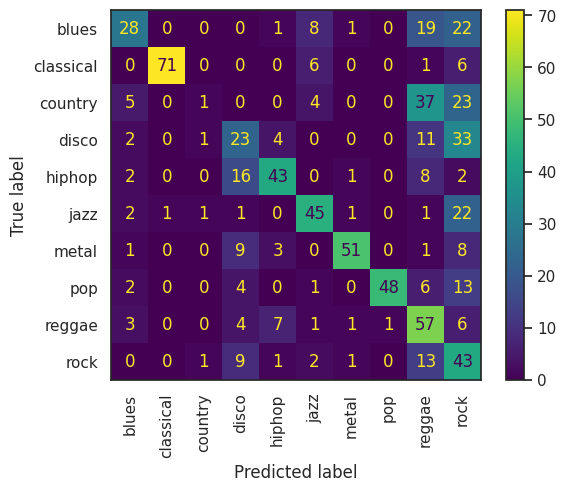


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.62      0.35      0.45        79
   classical       0.99      0.85      0.91        84
     country       0.25      0.01      0.03        70
       disco       0.35      0.31      0.33        74
      hiphop       0.73      0.60      0.66        72
        jazz       0.67      0.61      0.64        74
       metal       0.91      0.70      0.79        73
         pop       0.98      0.65      0.78        74
      reggae       0.37      0.71      0.49        80
        rock       0.24      0.61      0.35        70

    accuracy                           0.55       750
   macro avg       0.61      0.54      0.54       750
weighted avg       0.62      0.55      0.55       750


-------------------------------------------------------------------------------

Resultados de Test:



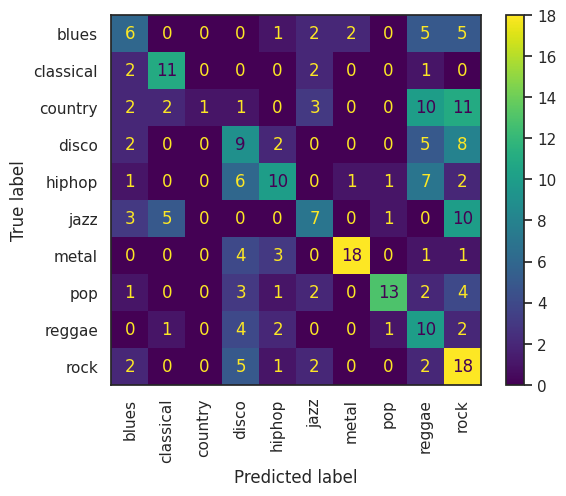


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.32      0.29      0.30        21
   classical       0.58      0.69      0.63        16
     country       1.00      0.03      0.06        30
       disco       0.28      0.35      0.31        26
      hiphop       0.50      0.36      0.42        28
        jazz       0.39      0.27      0.32        26
       metal       0.86      0.67      0.75        27
         pop       0.81      0.50      0.62        26
      reggae       0.23      0.50      0.32        20
        rock       0.30      0.60      0.40        30

    accuracy                           0.41       250
   macro avg       0.53      0.42      0.41       250
weighted avg       0.54      0.41      0.40       250



In [ ]:
decision_tree = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['Decision_Tree'] = decision_tree

Como habíamos elegido la profundidad del árbol de manera aleatoria, vamos a ver cuál sería la mejor opción. Usamos un GridSearchCV para que compare el modelo al introducirle diferentes parámetros (criterio, profundidad y nº de ejemplos necesario para dividir un nodo).

Resultados de Train:



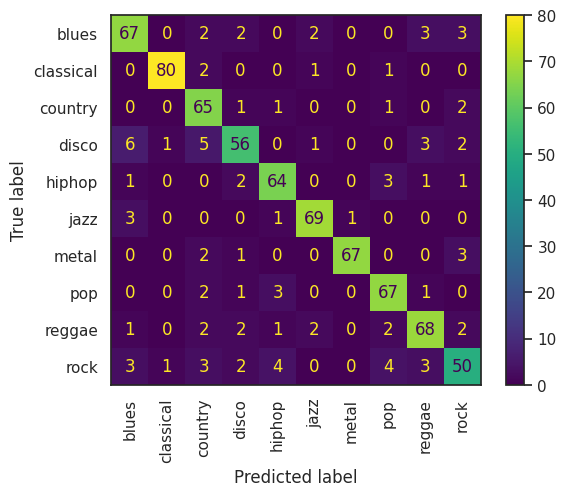


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.83      0.85      0.84        79
   classical       0.98      0.95      0.96        84
     country       0.78      0.93      0.85        70
       disco       0.84      0.76      0.79        74
      hiphop       0.86      0.89      0.88        72
        jazz       0.92      0.93      0.93        74
       metal       0.99      0.92      0.95        73
         pop       0.86      0.91      0.88        74
      reggae       0.86      0.85      0.86        80
        rock       0.79      0.71      0.75        70

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750


-------------------------------------------------------------------------------

Resultados de Test:



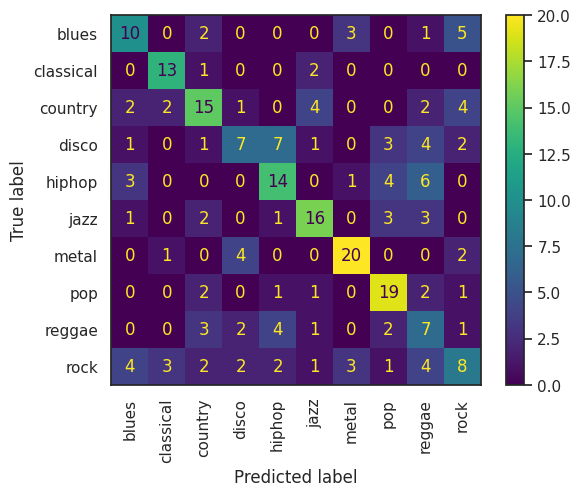


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.48      0.48      0.48        21
   classical       0.68      0.81      0.74        16
     country       0.54      0.50      0.52        30
       disco       0.44      0.27      0.33        26
      hiphop       0.48      0.50      0.49        28
        jazz       0.62      0.62      0.62        26
       metal       0.74      0.74      0.74        27
         pop       0.59      0.73      0.66        26
      reggae       0.24      0.35      0.29        20
        rock       0.35      0.27      0.30        30

    accuracy                           0.52       250
   macro avg       0.52      0.53      0.52       250
weighted avg       0.51      0.52      0.51       250



In [ ]:
modelo = DecisionTreeClassifier(random_state=0)
pipe = create_pipeline(modelo)

parameters = {'model__criterion':['gini', 'entropy', 'log_loss'],
              'model__max_depth': [5,10,15,20,25,30],
              'model__min_samples_split':[10,20,30]}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_decision_tree = clf.best_estimator_
best_decision_tree = run_model_results(pipeline_modelo=best_decision_tree,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['Decision_Tree_GSCV'] = best_decision_tree

Por curiosidad, vemos cual ha sido la mejor opcion de entre todas las posibles para el GridSearchCV. Es decir, los hiperparametros del modelo con los que nos hemos quedado.

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__criterion  model__max_depth  model__min_samples_split  Accuracy
27          entropy                20                        10  0.525333
48         log_loss                25                        10  0.525333
33          entropy                30                        10  0.525333
42         log_loss                15                        10  0.525333
45         log_loss                20                        10  0.525333
24          entropy                15                        10  0.525333
30          entropy                25                        10  0.525333
51         log_loss                30                        10  0.525333
39         log_loss                10                        10  0.520000
21          entropy                10                        10  0.520000
49         log_loss                25                        20  0.508000
46         log_loss                20                        20  0.508000
25          entropy                15                        20  0.508000
31          entropy                25                        20  0.508000
43         log_loss                15                        20  0.508000
28          entropy                20                        20  0.508000
40         log_loss                10                        20  0.508000
22          entropy                10                        20  0.508000
34          entropy                30                        20  0.508000
52         log_loss                30                        20  0.508000
41         log_loss                10                        30  0.500000
32          entropy                25                        30  0.500000
35          entropy                30                        30  0.500000
44         log_loss                15                        30  0.500000
47         log_loss                20                        30  0.500000
50         log_loss                25                        30  0.500000
29          entropy                20                        30  0.500000
53         log_loss                30                        30  0.500000
23          entropy                10                        30  0.500000
26          entropy                15                        30  0.500000
19          entropy                 5                        20  0.489333
18          entropy                 5                        10  0.489333
36         log_loss                 5                        10  0.489333
37         log_loss                 5                        20  0.489333
20          entropy                 5                        30  0.481333
38         log_loss                 5                        30  0.481333
5              gini                10                        30  0.473333
14             gini                25                        30  0.472000
11             gini                20                        30  0.472000
17             gini                30                        30  0.472000
8              gini                15                        30  0.472000
4              gini                10                        20  0.468000
10             gini                20                        20  0.468000
13             gini                25                        20  0.468000
16             gini                30                        20  0.468000
7              gini                15                        20  0.466667
3              gini                10                        10  0.465333
12             gini                25                        10  0.457333
9              gini                20                        10  0.457333
15             gini                30                        10  0.457333
6              gini                15                        10  0.456000
2              gini                 5                        30  0.417333
1              gini                 5                        20  0.416000
0      

#####Regresión Logística

Creamos el pipeline con el modelo de Regresión Logística, One vs. Rest

In [ ]:
modelo = OneVsRestClassifier(SGDClassifier(random_state=0))
pipe = create_pipeline(modelo)

Entrenamos el modelo, generamos las predicciones y mostramos los resultados.

Resultados de Train:



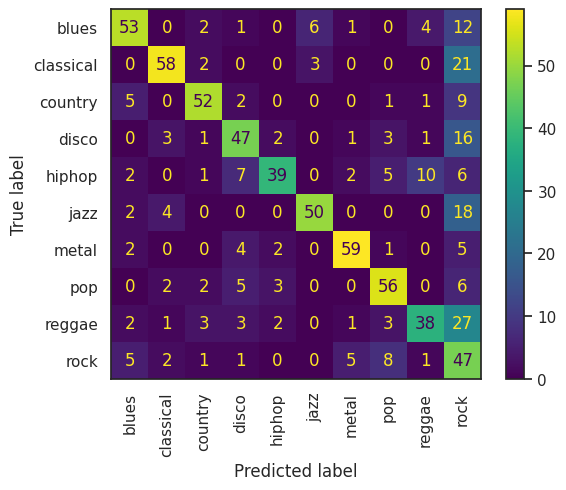


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.75      0.67      0.71        79
   classical       0.83      0.69      0.75        84
     country       0.81      0.74      0.78        70
       disco       0.67      0.64      0.65        74
      hiphop       0.81      0.54      0.65        72
        jazz       0.85      0.68      0.75        74
       metal       0.86      0.81      0.83        73
         pop       0.73      0.76      0.74        74
      reggae       0.69      0.47      0.56        80
        rock       0.28      0.67      0.40        70

    accuracy                           0.67       750
   macro avg       0.73      0.67      0.68       750
weighted avg       0.73      0.67      0.68       750


-------------------------------------------------------------------------------

Resultados de Test:



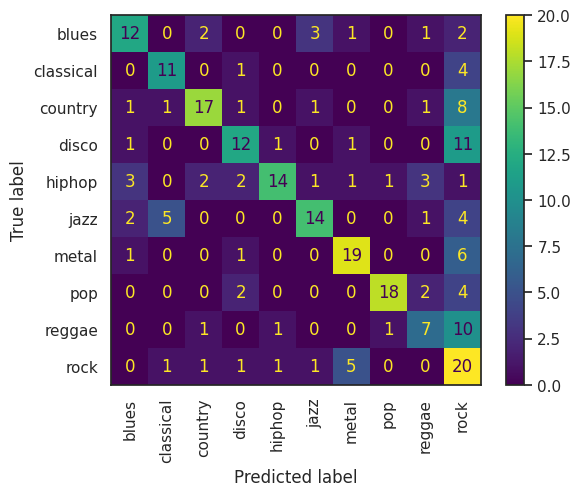


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.60      0.57      0.59        21
   classical       0.61      0.69      0.65        16
     country       0.74      0.57      0.64        30
       disco       0.60      0.46      0.52        26
      hiphop       0.82      0.50      0.62        28
        jazz       0.70      0.54      0.61        26
       metal       0.70      0.70      0.70        27
         pop       0.90      0.69      0.78        26
      reggae       0.47      0.35      0.40        20
        rock       0.29      0.67      0.40        30

    accuracy                           0.58       250
   macro avg       0.64      0.57      0.59       250
weighted avg       0.65      0.58      0.59       250



In [ ]:
regresion_log_ovr = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['Regresion_Logistica_OvR'] = regresion_log_ovr

Ahora lo probamos usando One vs. One

Resultados de Train:



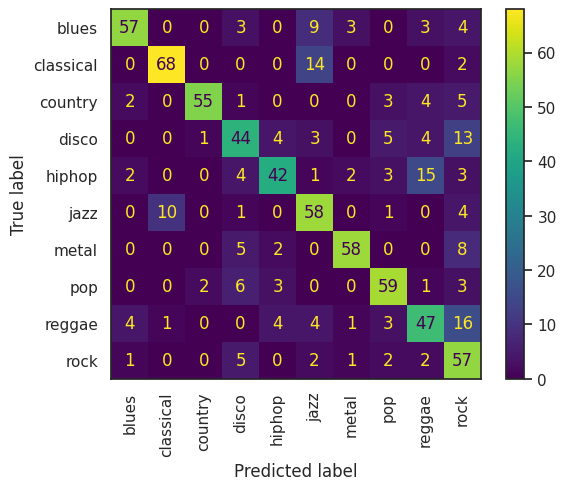


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.86      0.72      0.79        79
   classical       0.86      0.81      0.83        84
     country       0.95      0.79      0.86        70
       disco       0.64      0.59      0.62        74
      hiphop       0.76      0.58      0.66        72
        jazz       0.64      0.78      0.70        74
       metal       0.89      0.79      0.84        73
         pop       0.78      0.80      0.79        74
      reggae       0.62      0.59      0.60        80
        rock       0.50      0.81      0.62        70

    accuracy                           0.73       750
   macro avg       0.75      0.73      0.73       750
weighted avg       0.75      0.73      0.73       750


-------------------------------------------------------------------------------

Resultados de Test:



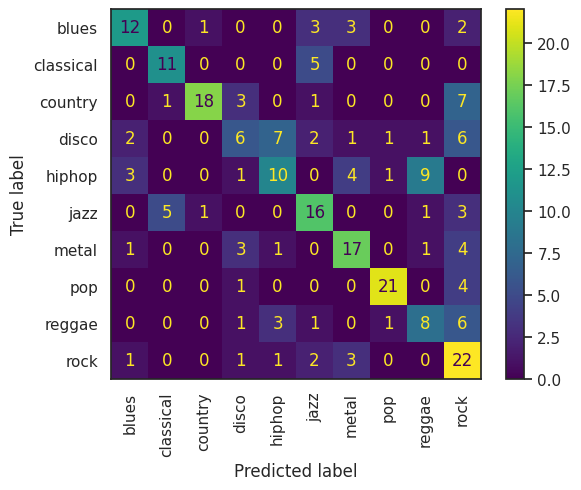


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.63      0.57      0.60        21
   classical       0.65      0.69      0.67        16
     country       0.90      0.60      0.72        30
       disco       0.38      0.23      0.29        26
      hiphop       0.45      0.36      0.40        28
        jazz       0.53      0.62      0.57        26
       metal       0.61      0.63      0.62        27
         pop       0.88      0.81      0.84        26
      reggae       0.40      0.40      0.40        20
        rock       0.41      0.73      0.52        30

    accuracy                           0.56       250
   macro avg       0.58      0.56      0.56       250
weighted avg       0.59      0.56      0.56       250



In [ ]:
modelo = OneVsOneClassifier(SGDClassifier(random_state=0))
pipe = create_pipeline(modelo)

regresion_log_ovo = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['Regresion_Logistica_OvO'] = regresion_log_ovo

One vs. Rest ha dado mejor resultado que One vs. One.
Vamos a hacer diferentes pruebas con los hiperparámetros y a quedarnos con el mejor modelo.

Vamos a probar un GridSearchCV sobre el modelo de regresión logística con One vs. Rest

Resultados de Train:



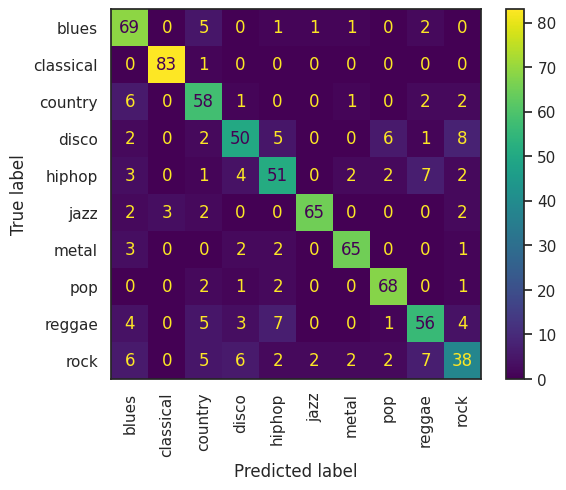


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.73      0.87      0.79        79
   classical       0.97      0.99      0.98        84
     country       0.72      0.83      0.77        70
       disco       0.75      0.68      0.71        74
      hiphop       0.73      0.71      0.72        72
        jazz       0.96      0.88      0.92        74
       metal       0.92      0.89      0.90        73
         pop       0.86      0.92      0.89        74
      reggae       0.75      0.70      0.72        80
        rock       0.66      0.54      0.59        70

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750


-------------------------------------------------------------------------------

Resultados de Test:



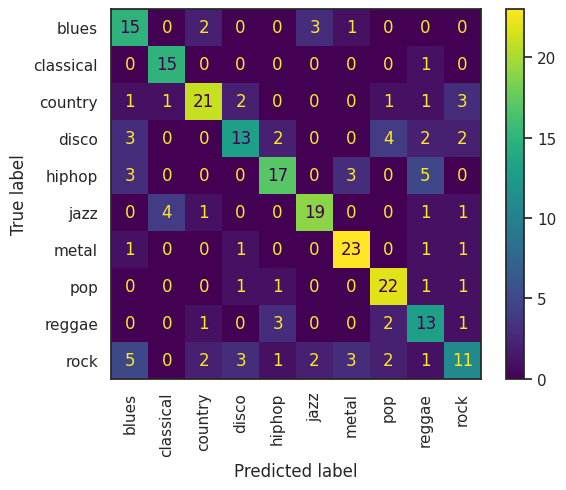


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.54      0.71      0.61        21
   classical       0.75      0.94      0.83        16
     country       0.78      0.70      0.74        30
       disco       0.65      0.50      0.57        26
      hiphop       0.71      0.61      0.65        28
        jazz       0.79      0.73      0.76        26
       metal       0.77      0.85      0.81        27
         pop       0.71      0.85      0.77        26
      reggae       0.50      0.65      0.57        20
        rock       0.55      0.37      0.44        30

    accuracy                           0.68       250
   macro avg       0.67      0.69      0.67       250
weighted avg       0.68      0.68      0.67       250



In [ ]:
modelo = OneVsRestClassifier(SGDClassifier(random_state=0))
pipe = create_pipeline(modelo)

parameters = {'model__estimator__alpha': [0.0001, 0.001],
              'model__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'model__estimator__max_iter': [1000, 2000, 3000]}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_regresion_log_ovr = clf.best_estimator_
best_regresion_log_ovr = run_model_results(pipeline_modelo=best_regresion_log_ovr,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['Regresion_Logistica_OvR_GSCV'] = best_regresion_log_ovr

Por curiosidad, vemos cual ha sido la mejor opcion de entre todas las posibles para el GridSearchCV. Es decir, los hiperparametros del modelo con los que nos hemos quedado.

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__estimator__alpha  model__estimator__max_iter  \
9                    0.0010                        1000   
15                   0.0010                        3000   
12                   0.0010                        2000   
6                    0.0001                        3000   
0                    0.0001                        1000   
3                    0.0001                        2000   
4                    0.0001                        2000   
7                    0.0001                        3000   
1                    0.0001                        1000   
5                    0.0001                        2000   
8                    0.0001                        3000   
2                    0.0001                        1000   
11                   0.0010                        1000   
14                   0.0010                        2000   
17                   0.0010                        3000   
10                   0.0010                        1000   
13                   0.0010                        2000   
16                   0.0010                        3000   

   model__estimator__penalty  Accuracy  
9                         l1  0.633333  
15                        l1  0.633333  
12                        l1  0.633333  
6                         l1  0.624000  
0                         l1  0.624000  
3                         l1  0.624000  
4                         l2  0.573333  
7                         l2  0.573333  
1                         l2  0.573333  
5                 elasticnet  0.570667  
8                 elasticnet  0.570667  
2                 elasticnet  0.570667  
11                elasticnet  0.560000  
14                elasticnet  0.560000  
17                elasticnet  0.560000  
10                        l2  0.552000  
13                        l2  0.552000  
16                        l2  0.552000

Y ahora sobre el One vs. One

Resultados de Train:



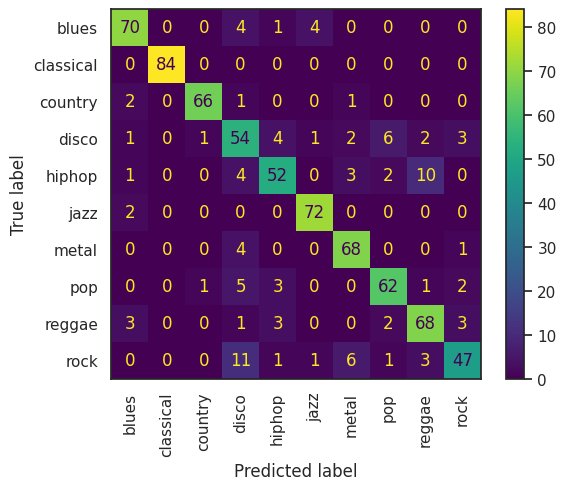


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.89      0.89      0.89        79
   classical       1.00      1.00      1.00        84
     country       0.97      0.94      0.96        70
       disco       0.64      0.73      0.68        74
      hiphop       0.81      0.72      0.76        72
        jazz       0.92      0.97      0.95        74
       metal       0.85      0.93      0.89        73
         pop       0.85      0.84      0.84        74
      reggae       0.81      0.85      0.83        80
        rock       0.84      0.67      0.75        70

    accuracy                           0.86       750
   macro avg       0.86      0.85      0.85       750
weighted avg       0.86      0.86      0.86       750


-------------------------------------------------------------------------------

Resultados de Test:



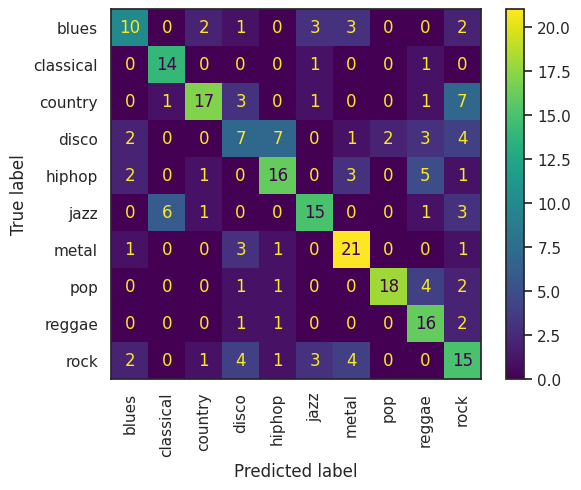


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.59      0.48      0.53        21
   classical       0.67      0.88      0.76        16
     country       0.77      0.57      0.65        30
       disco       0.35      0.27      0.30        26
      hiphop       0.59      0.57      0.58        28
        jazz       0.65      0.58      0.61        26
       metal       0.66      0.78      0.71        27
         pop       0.90      0.69      0.78        26
      reggae       0.52      0.80      0.63        20
        rock       0.41      0.50      0.45        30

    accuracy                           0.60       250
   macro avg       0.61      0.61      0.60       250
weighted avg       0.61      0.60      0.59       250



In [ ]:
modelo = OneVsOneClassifier(SGDClassifier(random_state=0))
pipe = create_pipeline(modelo)

parameters = {'model__estimator__alpha': [0.0001, 0.001],
              'model__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'model__estimator__max_iter': [1000, 2000, 3000]}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_regresion_log_ovo = clf.best_estimator_
best_regresion_log_ovo = run_model_results(pipeline_modelo=best_regresion_log_ovo,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['Regresion_Logistica_OvO_GSCV'] = best_regresion_log_ovo

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__estimator__alpha  model__estimator__max_iter  \
9                    0.0010                        1000   
15                   0.0010                        3000   
12                   0.0010                        2000   
6                    0.0001                        3000   
0                    0.0001                        1000   
3                    0.0001                        2000   
4                    0.0001                        2000   
7                    0.0001                        3000   
1                    0.0001                        1000   
10                   0.0010                        1000   
13                   0.0010                        2000   
16                   0.0010                        3000   
11                   0.0010                        1000   
14                   0.0010                        2000   
17                   0.0010                        3000   
5                    0.0001                        2000   
8                    0.0001                        3000   
2                    0.0001                        1000   

   model__estimator__penalty  Accuracy  
9                         l1  0.616000  
15                        l1  0.616000  
12                        l1  0.616000  
6                         l1  0.596000  
0                         l1  0.596000  
3                         l1  0.596000  
4                         l2  0.580000  
7                         l2  0.580000  
1                         l2  0.580000  
10                        l2  0.573333  
13                        l2  0.573333  
16                        l2  0.573333  
11                elasticnet  0.573333  
14                elasticnet  0.573333  
17                elasticnet  0.573333  
5                 elasticnet  0.568000  
8                 elasticnet  0.568000  
2                 elasticnet  0.568000

##### KNN

Creamos el pipeline con el modelo de KNN.

Resultados de Train:



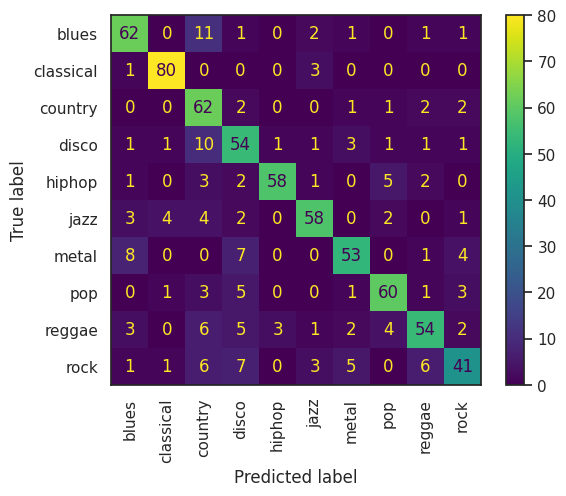


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.78      0.78      0.78        79
   classical       0.92      0.95      0.94        84
     country       0.59      0.89      0.71        70
       disco       0.64      0.73      0.68        74
      hiphop       0.94      0.81      0.87        72
        jazz       0.84      0.78      0.81        74
       metal       0.80      0.73      0.76        73
         pop       0.82      0.81      0.82        74
      reggae       0.79      0.68      0.73        80
        rock       0.75      0.59      0.66        70

    accuracy                           0.78       750
   macro avg       0.79      0.77      0.77       750
weighted avg       0.79      0.78      0.78       750


-------------------------------------------------------------------------------

Resultados de Test:



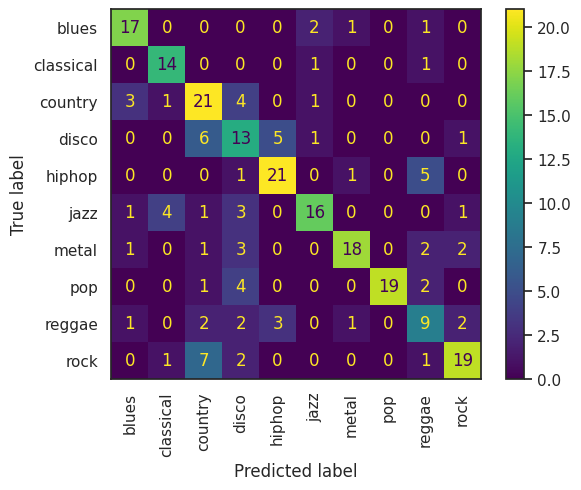


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.74      0.81      0.77        21
   classical       0.70      0.88      0.78        16
     country       0.54      0.70      0.61        30
       disco       0.41      0.50      0.45        26
      hiphop       0.72      0.75      0.74        28
        jazz       0.76      0.62      0.68        26
       metal       0.86      0.67      0.75        27
         pop       1.00      0.73      0.84        26
      reggae       0.43      0.45      0.44        20
        rock       0.76      0.63      0.69        30

    accuracy                           0.67       250
   macro avg       0.69      0.67      0.67       250
weighted avg       0.70      0.67      0.67       250



In [ ]:
modelo = KNeighborsClassifier()
pipe = create_pipeline(modelo)

k_vecinos = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['K_Vecinos'] = k_vecinos

Vamos a probar con GridSearch diferentes números de vecinos, a ver qué modelo tiene mejor resultado.

Resultados de Train:



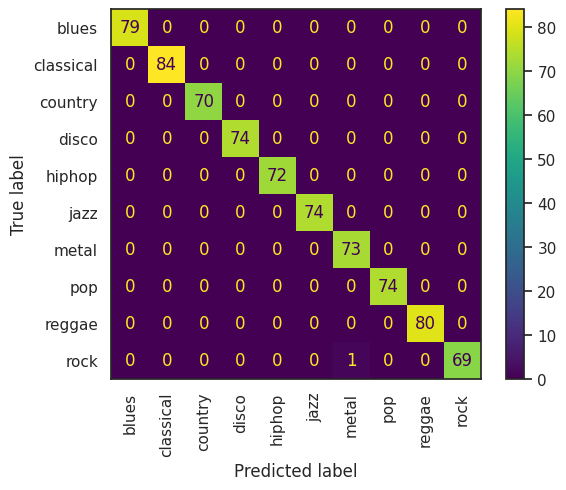


Metricas de Train:

              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        79
   classical       1.00      1.00      1.00        84
     country       1.00      1.00      1.00        70
       disco       1.00      1.00      1.00        74
      hiphop       1.00      1.00      1.00        72
        jazz       1.00      1.00      1.00        74
       metal       0.99      1.00      0.99        73
         pop       1.00      1.00      1.00        74
      reggae       1.00      1.00      1.00        80
        rock       1.00      0.99      0.99        70

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


-------------------------------------------------------------------------------

Resultados de Test:



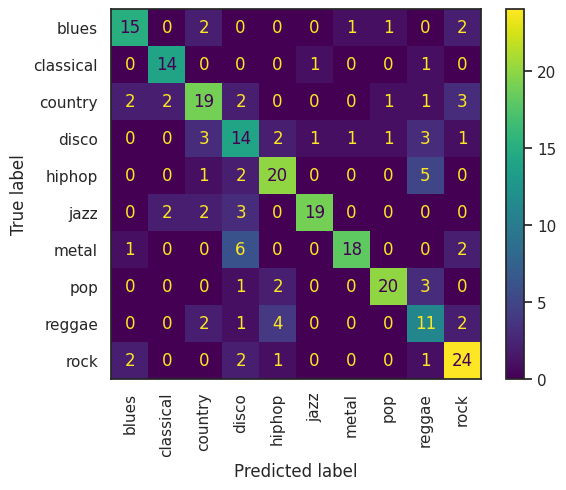


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.75      0.71      0.73        21
   classical       0.78      0.88      0.82        16
     country       0.66      0.63      0.64        30
       disco       0.45      0.54      0.49        26
      hiphop       0.69      0.71      0.70        28
        jazz       0.90      0.73      0.81        26
       metal       0.90      0.67      0.77        27
         pop       0.87      0.77      0.82        26
      reggae       0.44      0.55      0.49        20
        rock       0.71      0.80      0.75        30

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.72      0.70      0.70       250



In [ ]:
modelo = KNeighborsClassifier()
pipe = create_pipeline(modelo)

K_max=50
rang_K = np.arange(1, K_max+1)
parameters = {'model__n_neighbors': rang_K}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_k_vecinos = clf.best_estimator_
best_k_vecinos = run_model_results(pipeline_modelo=best_k_vecinos,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['K_Vecinos_GSCV'] = best_k_vecinos

Vemos cuál es el mejor número de vecinos: 1.

In [ ]:
df_n_vecinos = pd.concat([pd.DataFrame(clf.cv_results_['params']),
           pd.DataFrame(clf.cv_results_['mean_train_score'], columns=['Accuracy_Train']),
           pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy_Test'])],axis=1).sort_values(by='Accuracy_Test', ascending=False).head(20)

df_n_vecinos.rename(columns= {'model__n_neighbors': 'N_Vecinos'}, inplace=True)
df_n_vecinos

N_Vecinos  Accuracy_Train  Accuracy_Test
0           1        0.999000       0.638667
3           4        0.767333       0.621333
2           3        0.789000       0.608000
9          10        0.685000       0.598667
4           5        0.749333       0.596000
8           9        0.685333       0.593333
6           7        0.712333       0.592000
5           6        0.729000       0.590667
1           2        0.827333       0.588000
10         11        0.672333       0.585333
7           8        0.706000       0.584000
11         12        0.659667       0.582667
12         13        0.656333       0.582667
15         16        0.629333       0.569333
13         14        0.645333       0.565333
16         17        0.618667       0.562667
18         19        0.604667       0.560000
17         18        0.611000       0.560000
14         15        0.634333       0.554667
19         20        0.602000       0.552000

<Axes: xlabel='N_Vecinos'>

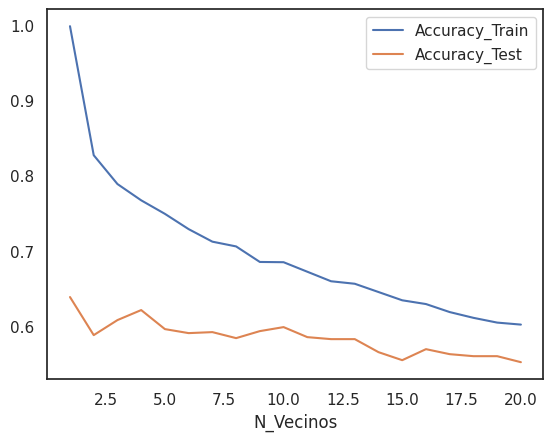

In [ ]:
df_n_vecinos.sort_values('N_Vecinos').plot(x = 'N_Vecinos',y=['Accuracy_Train', 'Accuracy_Test'])

Aunque sale que el mejor número de vecinos es 1 porque tiene el mejor accuracy de test, es un modelo con overfitting claro. Por eso, vamos a buscar el nº de vecinos que maximice el accuracy en el conjunto de test con la menor diferencia o distancia entre el accuracy en train y test. Es decir, el modelo que mejor resultado tenga en test con el menor overfitting.

<Axes: xlabel='N_Vecinos'>

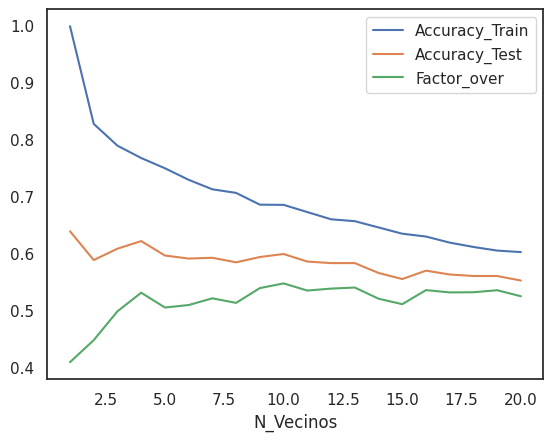

In [ ]:
df_n_vecinos['Diferencia'] = df_n_vecinos['Accuracy_Train'] - df_n_vecinos['Accuracy_Test']
df_n_vecinos['Factor_over'] = df_n_vecinos['Accuracy_Test']*(1-df_n_vecinos['Diferencia'])
df_n_vecinos.sort_values('N_Vecinos').plot(x='N_Vecinos', y=['Accuracy_Train', 'Accuracy_Test', 'Factor_over'])

In [ ]:
df_n_vecinos.sort_values(by='Factor_over', ascending=False).head(3)

N_Vecinos  Accuracy_Train  Accuracy_Test  Diferencia  Factor_over
9          10        0.685000       0.598667    0.086333     0.546982
12         13        0.656333       0.582667    0.073667     0.539744
8           9        0.685333       0.593333    0.092000     0.538747

Teniendo en cuenta el factor overfitting, el mejor número de vecinos sería 10.
Veamos la diferencia entre ambas opciones.

In [ ]:
df_mejores_vecinos = pd.concat((df_n_vecinos.loc[df_n_vecinos['N_Vecinos'] == 1], df_n_vecinos.loc[df_n_vecinos['N_Vecinos'] == 10]),axis=0)
df_mejores_vecinos

N_Vecinos  Accuracy_Train  Accuracy_Test  Diferencia  Factor_over
0          1           0.999       0.638667    0.360333     0.408534
9         10           0.685       0.598667    0.086333     0.546982

Probamos el modelo con 8 vecinos.

Resultados de Train:



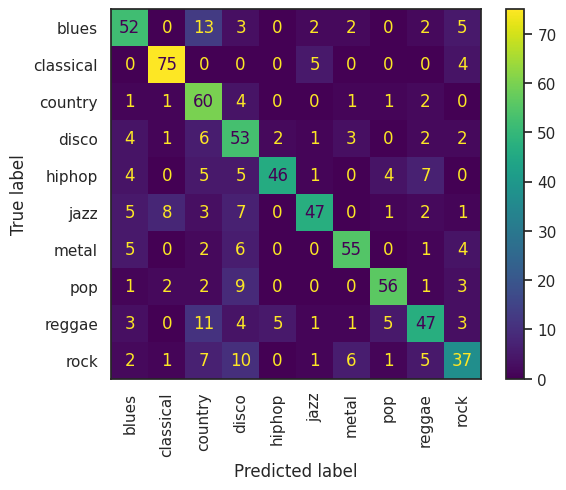


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.68      0.66      0.67        79
   classical       0.85      0.89      0.87        84
     country       0.55      0.86      0.67        70
       disco       0.52      0.72      0.61        74
      hiphop       0.87      0.64      0.74        72
        jazz       0.81      0.64      0.71        74
       metal       0.81      0.75      0.78        73
         pop       0.82      0.76      0.79        74
      reggae       0.68      0.59      0.63        80
        rock       0.63      0.53      0.57        70

    accuracy                           0.70       750
   macro avg       0.72      0.70      0.70       750
weighted avg       0.72      0.70      0.71       750


-------------------------------------------------------------------------------

Resultados de Test:



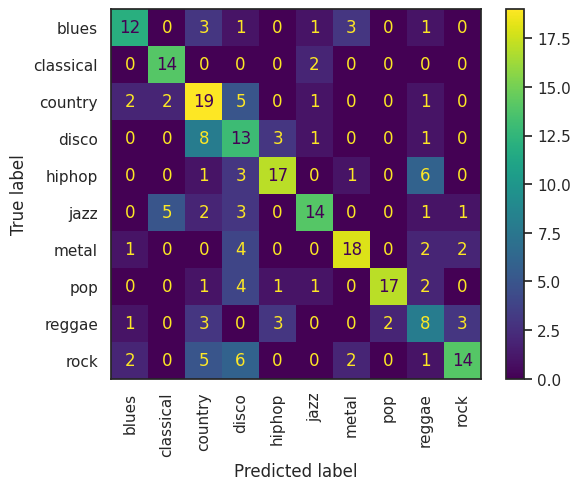


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.67      0.57      0.62        21
   classical       0.67      0.88      0.76        16
     country       0.45      0.63      0.53        30
       disco       0.33      0.50      0.40        26
      hiphop       0.71      0.61      0.65        28
        jazz       0.70      0.54      0.61        26
       metal       0.75      0.67      0.71        27
         pop       0.89      0.65      0.76        26
      reggae       0.35      0.40      0.37        20
        rock       0.70      0.47      0.56        30

    accuracy                           0.58       250
   macro avg       0.62      0.59      0.60       250
weighted avg       0.63      0.58      0.59       250



In [ ]:
modelo = KNeighborsClassifier(10)
pipe = create_pipeline(modelo)

k_vecinos_of = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['K_Vecinos_Menor_Overfitting'] = k_vecinos_of

##### Naive Bayes

Creamos el pipeline con el modelo de Naive Bayes. Probaremos con Gaussian Naive Bayes ya que el resto está pensado para problemas de clasificación binaria, desbalanceados o con variables predictoras que no siguen una distribución normal.

Resultados de Train:



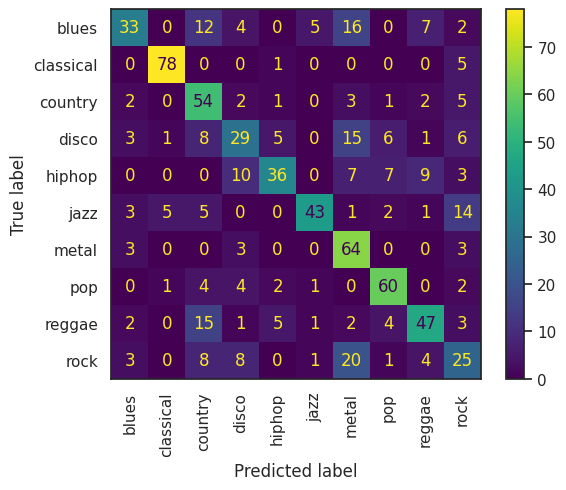


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.67      0.42      0.52        79
   classical       0.92      0.93      0.92        84
     country       0.51      0.77      0.61        70
       disco       0.48      0.39      0.43        74
      hiphop       0.72      0.50      0.59        72
        jazz       0.84      0.58      0.69        74
       metal       0.50      0.88      0.64        73
         pop       0.74      0.81      0.77        74
      reggae       0.66      0.59      0.62        80
        rock       0.37      0.36      0.36        70

    accuracy                           0.63       750
   macro avg       0.64      0.62      0.62       750
weighted avg       0.65      0.63      0.62       750


-------------------------------------------------------------------------------

Resultados de Test:



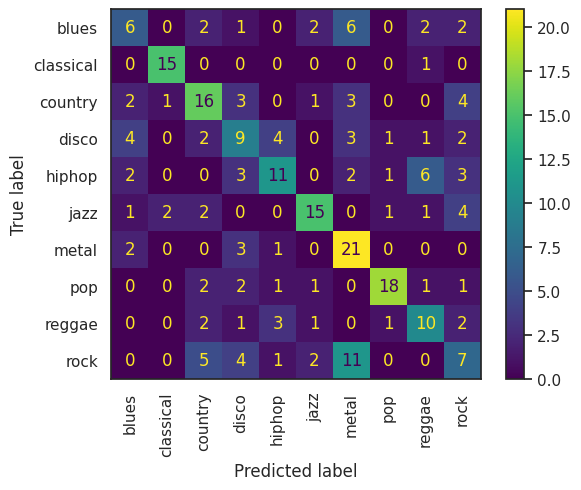


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.35      0.29      0.32        21
   classical       0.83      0.94      0.88        16
     country       0.52      0.53      0.52        30
       disco       0.35      0.35      0.35        26
      hiphop       0.52      0.39      0.45        28
        jazz       0.68      0.58      0.62        26
       metal       0.46      0.78      0.58        27
         pop       0.82      0.69      0.75        26
      reggae       0.45      0.50      0.48        20
        rock       0.28      0.23      0.25        30

    accuracy                           0.51       250
   macro avg       0.53      0.53      0.52       250
weighted avg       0.51      0.51      0.51       250



In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
pipe = create_pipeline(modelo)

nb_gausiano = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['NB_Gausiano'] = nb_gausiano

#####Random Forest

Creamos el pipeline con el modelo de ensemble Random Forest.

Resultados de Train:



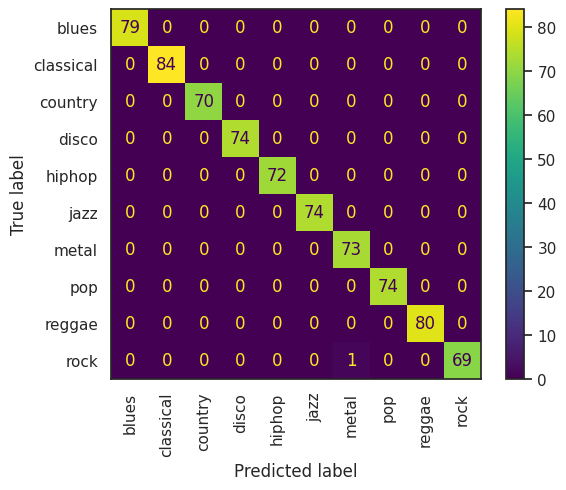


Metricas de Train:

              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        79
   classical       1.00      1.00      1.00        84
     country       1.00      1.00      1.00        70
       disco       1.00      1.00      1.00        74
      hiphop       1.00      1.00      1.00        72
        jazz       1.00      1.00      1.00        74
       metal       0.99      1.00      0.99        73
         pop       1.00      1.00      1.00        74
      reggae       1.00      1.00      1.00        80
        rock       1.00      0.99      0.99        70

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


-------------------------------------------------------------------------------

Resultados de Test:



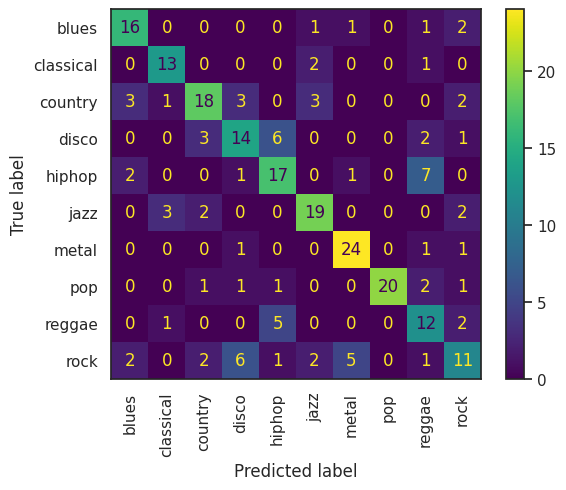


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.70      0.76      0.73        21
   classical       0.72      0.81      0.76        16
     country       0.69      0.60      0.64        30
       disco       0.54      0.54      0.54        26
      hiphop       0.57      0.61      0.59        28
        jazz       0.70      0.73      0.72        26
       metal       0.77      0.89      0.83        27
         pop       1.00      0.77      0.87        26
      reggae       0.44      0.60      0.51        20
        rock       0.50      0.37      0.42        30

    accuracy                           0.66       250
   macro avg       0.66      0.67      0.66       250
weighted avg       0.66      0.66      0.65       250



In [ ]:
modelo = RandomForestClassifier(random_state=0)
pipe = create_pipeline(modelo)

random_forest = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['Random_Forest'] = random_forest

Vamos a utilizar GridSearchCV para comparar diferentes parámetros del modelo.

Resultados de Train:



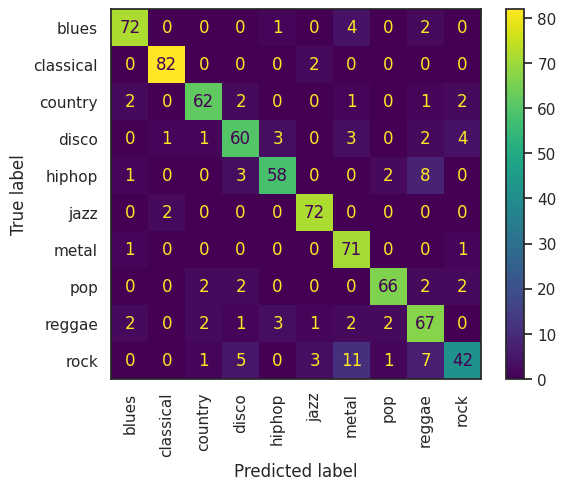


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.92      0.91      0.92        79
   classical       0.96      0.98      0.97        84
     country       0.91      0.89      0.90        70
       disco       0.82      0.81      0.82        74
      hiphop       0.89      0.81      0.85        72
        jazz       0.92      0.97      0.95        74
       metal       0.77      0.97      0.86        73
         pop       0.93      0.89      0.91        74
      reggae       0.75      0.84      0.79        80
        rock       0.82      0.60      0.69        70

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750


-------------------------------------------------------------------------------

Resultados de Test:



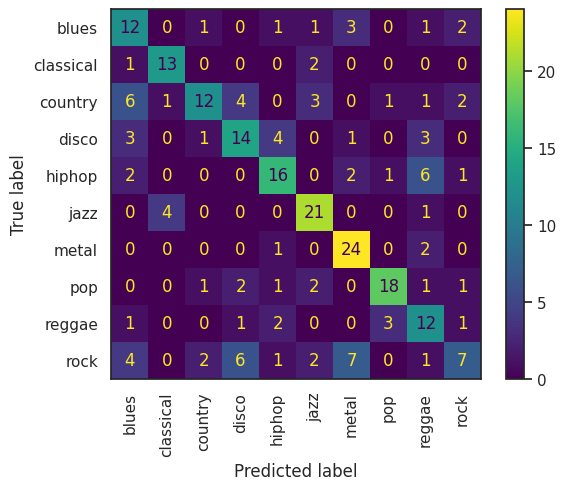


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.41      0.57      0.48        21
   classical       0.72      0.81      0.76        16
     country       0.71      0.40      0.51        30
       disco       0.52      0.54      0.53        26
      hiphop       0.62      0.57      0.59        28
        jazz       0.68      0.81      0.74        26
       metal       0.65      0.89      0.75        27
         pop       0.78      0.69      0.73        26
      reggae       0.43      0.60      0.50        20
        rock       0.50      0.23      0.32        30

    accuracy                           0.60       250
   macro avg       0.60      0.61      0.59       250
weighted avg       0.60      0.60      0.58       250



In [ ]:
modelo = RandomForestClassifier(random_state=0)
pipe = create_pipeline(modelo)

parameters = {'model__n_estimators': [80,100,120,140],
              'model__criterion': ['gini', 'entropy', 'log_loss'],
              'model__max_depth': [3,4,5],
              'model__min_samples_split': [5,10,15]}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_random_forest = clf.best_estimator_
best_random_forest = run_model_results(pipeline_modelo=best_random_forest,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['Random_Forest_GSCV'] = best_random_forest

Por curiosidad, vemos cual ha sido la mejor opcion de entre todas las posibles para el GridSearchCV. Es decir, los hiperparametros del modelo con los que nos hemos quedado.

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__criterion  model__max_depth  model__min_samples_split  \
64           entropy                 5                        10   
100         log_loss                 5                        10   
63           entropy                 5                         5   
99          log_loss                 5                         5   
103         log_loss                 5                        10   
..               ...               ...                       ...   
41           entropy                 3                        10   
80          log_loss                 3                        15   
44           entropy                 3                        15   
73          log_loss                 3                         5   
37           entropy                 3                         5   

     model__n_estimators  Accuracy  
64                    80  0.653333  
100                   80  0.653333  
63                   140  0.652000  
99                   140  0.652000  
103                  140  0.650667  
..                   ...       ...  
41                   100  0.510667  
80                    80  0.509333  
44                    80  0.509333  
73                   100  0.508000  
37                   100  0.508000  

[108 rows x 5 columns]

#####Gradient Boosting

Creamos el pipeline con el modelo de Gradient Boosting.

Resultados de Train:



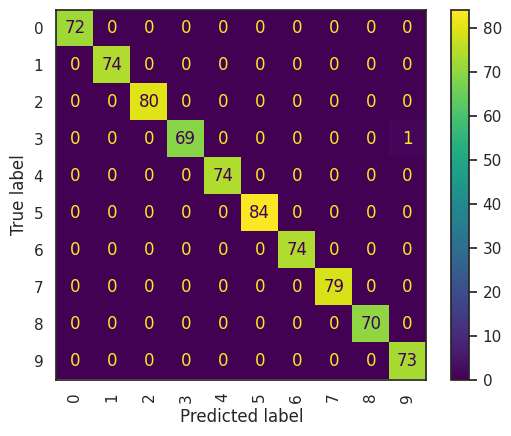


Metricas de Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        80
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        84
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        70
           9       0.99      1.00      0.99        73

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


-------------------------------------------------------------------------------

Resultados de Test:



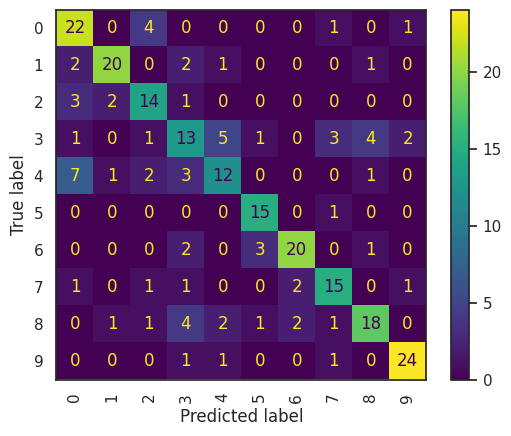


Metricas de Test:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        28
           1       0.83      0.77      0.80        26
           2       0.61      0.70      0.65        20
           3       0.48      0.43      0.46        30
           4       0.57      0.46      0.51        26
           5       0.75      0.94      0.83        16
           6       0.83      0.77      0.80        26
           7       0.68      0.71      0.70        21
           8       0.72      0.60      0.65        30
           9       0.86      0.89      0.87        27

    accuracy                           0.69       250
   macro avg       0.69      0.71      0.70       250
weighted avg       0.69      0.69      0.69       250



In [ ]:
from xgboost import XGBClassifier

modelo = XGBClassifier(random_state=0)
pipe = create_pipeline(modelo)

xgb = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train_num,
                  datos_y_test=y_test_num,
                  fit=True)

resultados_modelos['XGBoosting'] = xgb

Vamos a utilizar GridSearchCV para comparar diferentes parámetros del modelo.

Resultados de Train:



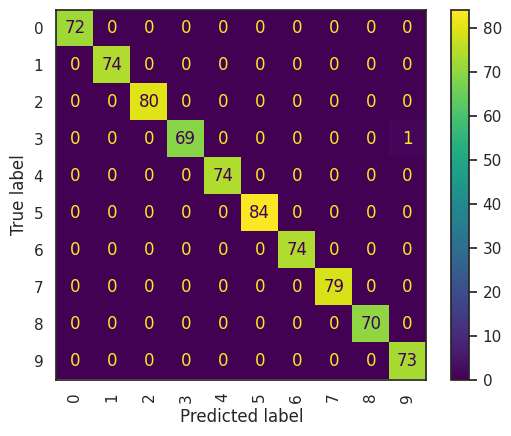


Metricas de Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        80
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        84
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        70
           9       0.99      1.00      0.99        73

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


-------------------------------------------------------------------------------

Resultados de Test:



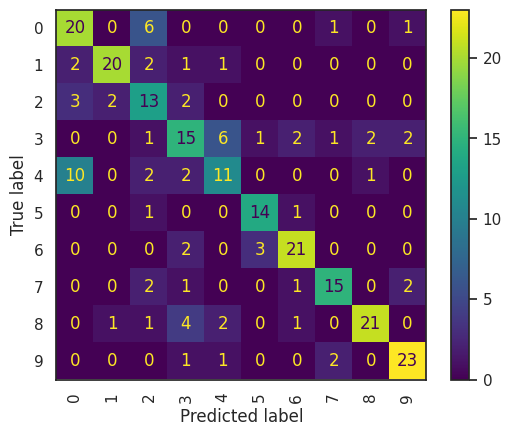


Metricas de Test:

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        28
           1       0.87      0.77      0.82        26
           2       0.46      0.65      0.54        20
           3       0.54      0.50      0.52        30
           4       0.52      0.42      0.47        26
           5       0.78      0.88      0.82        16
           6       0.81      0.81      0.81        26
           7       0.79      0.71      0.75        21
           8       0.88      0.70      0.78        30
           9       0.82      0.85      0.84        27

    accuracy                           0.69       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.69      0.69       250



In [ ]:
modelo = XGBClassifier(random_state=0)
pipe = create_pipeline(modelo)

parameters = {'model__n_estimators': [100, 200],
              'model__learning_rate': [0.01, 0.1],
              'model__max_depth': [3, 5],
              'model__subsample': [0.6, 0.8],
              'model__colsample_bytree': [0.6, 0.8]}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train_num)

best_xgb = clf.best_estimator_
best_xgb = run_model_results(pipeline_modelo=best_xgb,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train_num,
                  datos_y_test=y_test_num,
                  fit=False)

resultados_modelos['XGBoosting_GSCV'] = best_xgb

Por curiosidad, vemos cual ha sido la mejor opcion de entre todas las posibles para el GridSearchCV. Es decir, los hiperparametros del modelo con los que nos hemos quedado.

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__colsample_bytree  model__learning_rate  model__max_depth  \
11                      0.6                  0.10                 3   
14                      0.6                  0.10                 5   
10                      0.6                  0.10                 3   
26                      0.8                  0.10                 3   
27                      0.8                  0.10                 3   
30                      0.8                  0.10                 5   
24                      0.8                  0.10                 3   
15                      0.6                  0.10                 5   
31                      0.8                  0.10                 5   
28                      0.8                  0.10                 5   
8                       0.6                  0.10                 3   
25                      0.8                  0.10                 3   
12                      0.6                  0.10                 5   
9                       0.6                  0.10                 3   
29                      0.8                  0.10                 5   
13                      0.6                  0.10                 5   
7                       0.6                  0.01                 5   
6                       0.6                  0.01                 5   
22                      0.8                  0.01                 5   
4                       0.6                  0.01                 5   
5                       0.6                  0.01                 5   
23                      0.8                  0.01                 5   
2                       0.6                  0.01                 3   
20                      0.8                  0.01                 5   
21                      0.8                  0.01                 5   
18                      0.8                  0.01                 3   
3                       0.6                  0.01                 3   
1                       0.6                  0.01                 3   
19                      0.8                  0.01                 3   
16                      0.8                  0.01                 3   
0                       0.6                  0.01                 3   
17                      0.8                  0.01                 3   

    model__n_estimators  model__subsample  Accuracy  
11                  200               0.8  0.737333  
14                  200               0.6  0.736000  
10                  200               0.6  0.736000  
26                  200               0.6  0.736000  
27                  200               0.8  0.733333  
30                  200               0.6  0.732000  
24                  100               0.6  0.730667  
15                  200               0.8  0.730667  
31                  200               0.8  0.729333  
28                  100               0.6  0.728000  
8                   100               0.6  0.726667  
25                  100               0.8  0.721333  
12                  100               0.6  0.721333  
9                   100               0.8  0.721333  
29                  100               0.8  0.720000  
13                  100               0.8  0.717333  
7                   200               0.8  0.701333  
6                   200               0.6  0.693333  
22                  200               0.6  0.693333  
4                   100               0.6  0.692000  
5                   100               0.8  0.688000  
23                  200               0.8  0.684000  
2                   200               0.6  0.674667  
20                  100               0.6  0.673333  
21                  100               0.8  0.669333  
18                  200               0.6  0.668000  
3                   200               0.8  0.666667  
1                   100               0.8  0.661333  
19                  200               0.8  0.660000  
16                  100               0.

##### AdaBoost

Creamos el pipeline con el modelo de AdaBoost.

Resultados de Train:



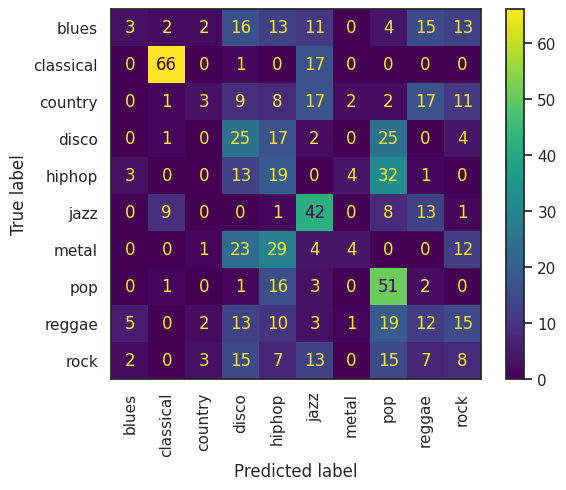


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.23      0.04      0.07        79
   classical       0.82      0.79      0.80        84
     country       0.27      0.04      0.07        70
       disco       0.22      0.34      0.26        74
      hiphop       0.16      0.26      0.20        72
        jazz       0.38      0.57      0.45        74
       metal       0.36      0.05      0.10        73
         pop       0.33      0.69      0.44        74
      reggae       0.18      0.15      0.16        80
        rock       0.12      0.11      0.12        70

    accuracy                           0.31       750
   macro avg       0.31      0.30      0.27       750
weighted avg       0.31      0.31      0.28       750


-------------------------------------------------------------------------------

Resultados de Test:



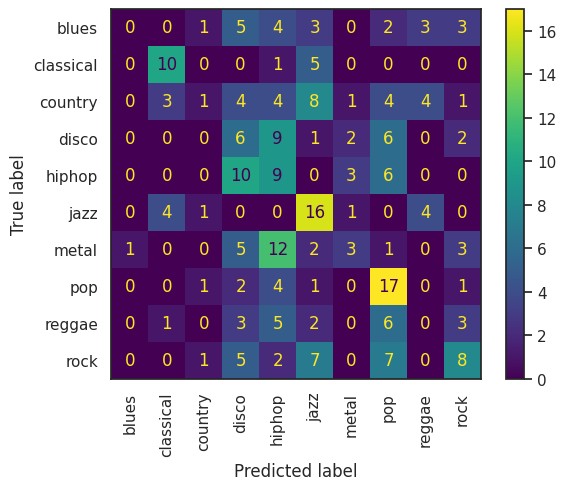


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        21
   classical       0.56      0.62      0.59        16
     country       0.20      0.03      0.06        30
       disco       0.15      0.23      0.18        26
      hiphop       0.18      0.32      0.23        28
        jazz       0.36      0.62      0.45        26
       metal       0.30      0.11      0.16        27
         pop       0.35      0.65      0.45        26
      reggae       0.00      0.00      0.00        20
        rock       0.38      0.27      0.31        30

    accuracy                           0.28       250
   macro avg       0.25      0.29      0.24       250
weighted avg       0.25      0.28      0.24       250



In [ ]:
modelo = AdaBoostClassifier(random_state=0)
pipe = create_pipeline(modelo)

adaboost = run_model_results(pipeline_modelo=pipe,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=True)

resultados_modelos['AdaBoost'] = adaboost

Vamos a utilizar GridSearchCV para comparar diferentes parámetros del modelo.

Resultados de Train:



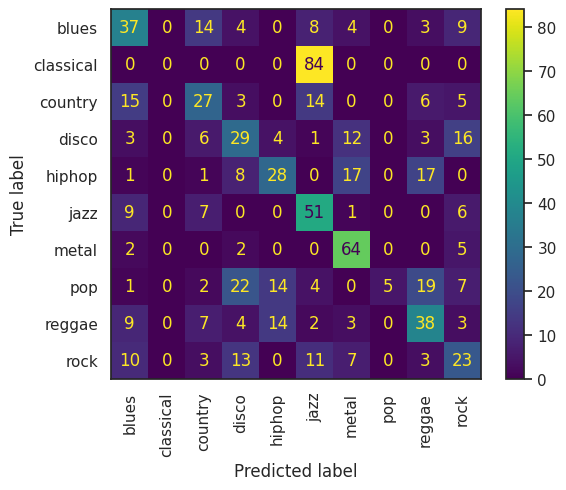


Metricas de Train:

              precision    recall  f1-score   support

       blues       0.43      0.47      0.45        79
   classical       0.00      0.00      0.00        84
     country       0.40      0.39      0.39        70
       disco       0.34      0.39      0.36        74
      hiphop       0.47      0.39      0.42        72
        jazz       0.29      0.69      0.41        74
       metal       0.59      0.88      0.71        73
         pop       1.00      0.07      0.13        74
      reggae       0.43      0.47      0.45        80
        rock       0.31      0.33      0.32        70

    accuracy                           0.40       750
   macro avg       0.43      0.41      0.36       750
weighted avg       0.42      0.40      0.36       750


-------------------------------------------------------------------------------

Resultados de Test:



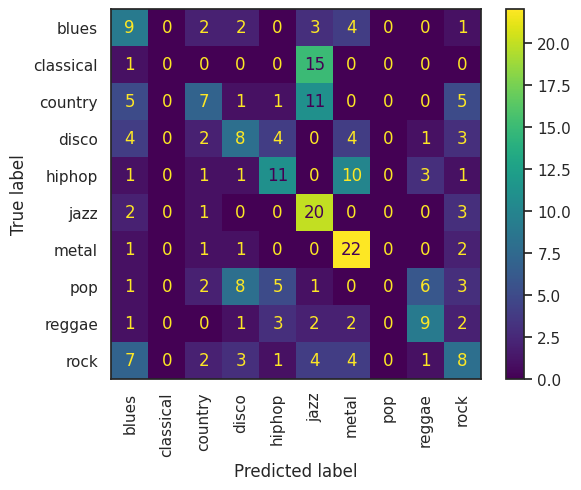


Metricas de Test:

              precision    recall  f1-score   support

       blues       0.28      0.43      0.34        21
   classical       0.00      0.00      0.00        16
     country       0.39      0.23      0.29        30
       disco       0.32      0.31      0.31        26
      hiphop       0.44      0.39      0.42        28
        jazz       0.36      0.77      0.49        26
       metal       0.48      0.81      0.60        27
         pop       0.00      0.00      0.00        26
      reggae       0.45      0.45      0.45        20
        rock       0.29      0.27      0.28        30

    accuracy                           0.38       250
   macro avg       0.30      0.37      0.32       250
weighted avg       0.31      0.38      0.33       250



In [ ]:
modelo = AdaBoostClassifier(random_state=0)
pipe = create_pipeline(modelo)

parameters = {'model__n_estimators': [50,100,150,200],
              'model__learning_rate': [0.01, 0.1, 0.2, 0.3],}

clf = GridSearchCV(pipe, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

best_adaboost = clf.best_estimator_
best_adaboost = run_model_results(pipeline_modelo=best_adaboost,
                  datos_X_train=X_train,
                  datos_X_test=X_test,
                  datos_y_train=y_train,
                  datos_y_test=y_test,
                  fit=False)

resultados_modelos['AdaBoost_GSCV'] = best_adaboost

Por curiosidad, vemos cual ha sido la mejor opcion de entre todas las posibles para el GridSearchCV. Es decir, los hiperparametros del modelo con los que nos hemos quedado.

In [ ]:
pd.concat([pd.DataFrame(clf.cv_results_['params']),pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])],axis=1).sort_values(by='Accuracy', ascending=False)

model__learning_rate  model__n_estimators  Accuracy
2                   0.01                  150  0.352000
1                   0.01                  100  0.348000
15                  0.30                  200  0.348000
14                  0.30                  150  0.342667
0                   0.01                   50  0.341333
3                   0.01                  200  0.338667
10                  0.20                  150  0.338667
13                  0.30                  100  0.337333
11                  0.20                  200  0.336000
6                   0.10                  150  0.324000
8                   0.20                   50  0.321333
9                   0.20                  100  0.316000
7                   0.10                  200  0.309333
12                  0.30                   50  0.302667
5                   0.10                  100  0.301333
4                   0.10                   50  0.288000

##### Comparativa de los modelos

Primero vamos a sacar una tabla con todos los modelos probados con el dataset de 30seg y sus resultados tanto en train como en test.

In [ ]:
lista_nombres = []
lista_accuracy_train = []
lista_accuracy_test = []

for nombre_modelo, modelo in resultados_modelos.items():
  lista_nombres.append(nombre_modelo)

  if nombre_modelo in ['XGBoosting', 'XGBoosting_GSCV']:
    pred_train = modelo.predict(X_train)
    acc_train = accuracy_score(y_true=y_train_num, y_pred=pred_train)
    pred_test = modelo.predict(X_test)
    acc_test = accuracy_score(y_true=y_test_num, y_pred=pred_test)

  else:
    pred_train = modelo.predict(X_train)
    acc_train = accuracy_score(y_true=y_train, y_pred=pred_train)
    pred_test = modelo.predict(X_test)
    acc_test = accuracy_score(y_true=y_test, y_pred=pred_test)

  lista_accuracy_train.append(acc_train)
  lista_accuracy_test.append(acc_test)

tabla_modelos_30s = pd.DataFrame({'Modelo':lista_nombres, 'Accuracy_Train':lista_accuracy_train, 'Accuracy_Test':lista_accuracy_test})
tabla_modelos_30s.sort_values(by='Accuracy_Test', ascending=False)

Modelo  Accuracy_Train  Accuracy_Test
7                 K_Vecinos_GSCV        0.998667          0.696
12                    XGBoosting        0.998667          0.692
13               XGBoosting_GSCV        0.998667          0.692
4   Regresion_Logistica_OvR_GSCV        0.804000          0.676
6                      K_Vecinos        0.776000          0.668
10                 Random_Forest        0.998667          0.656
5   Regresion_Logistica_OvO_GSCV        0.857333          0.596
11            Random_Forest_GSCV        0.869333          0.596
8    K_Vecinos_Menor_Overfitting        0.704000          0.584
2        Regresion_Logistica_OvR        0.665333          0.576
3        Regresion_Logistica_OvO        0.726667          0.564
1             Decision_Tree_GSCV        0.870667          0.516
9                    NB_Gausiano        0.625333          0.512
0                  Decision_Tree        0.546667          0.412
15                 AdaBoost_GSCV        0.402667          0.376
14                      AdaBoost        0.310667          0.280

#### 3.1.4.2 Modelos con muestras 3 segundos

Se van a preparar los datos siguiendo dos tipos de estructuras: una de tipo one hot encode, y otra donde directamente se
sustituirán las variables de salida por variables ordinales.

In [ ]:
#En el caso de las variables de entrada, serán las mismas para cualquier tipo de codificación de las variables de salida:
X=pd.DataFrame(df_caracteristicas_3s.loc[:,list(df_caracteristicas_3s.columns[1:-1])])
display(X)

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0             0.335406         0.091048  0.130405  0.003521   
1             0.343065         0.086147  0.112699  0.001450   
2             0.346815         0.092243  0.132003  0.004620   
3             0.363639         0.086856  0.132565  0.002448   
4             0.335579         0.088129  0.143289  0.001701   
...                ...              ...       ...       ...   
9985          0.349126         0.080515  0.050019  0.000097   
9986          0.372564         0.082626  0.057897  0.000088   
9987          0.347481         0.089019  0.052403  0.000701   
9988          0.387527         0.084815  0.066430  0.000320   
9989          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_var  spectral_bandwidth_mean  spectral_bandwidth_var  \
0             167541.630869              1972.744388           117335.771563   
1              90525.690866              2010.051501            65671.875673   
2             111407.437613              2084.565132            75124.921716   
3             111952.284517              1960.039988            82913.639269   
4              79667.267654              1948.503884            60204.020268   
...                     ...                      ...                     ...   
9985          164266.886443              1718.707215            85931.574523   
9986          281054.935973              1906.468492            99727.037054   
9987          662956.246325              1561.859087           138762.841945   
9988          203891.039161              2018.366254            22860.992562   
9989          411429.169769              1867.422378           119722.211518   

      zero_crossing_rate_mean  zero_crossing_rate_var  harmony_mean  ...  \
0                    0.081851                0.000558     -0.000078  ...   
1                    0.087173                0.001030     -0.000099  ...   
2                    0.071383                0.000425     -0.000066  ...   
3                    0.069426                0.000304     -0.000014  ...   
4                    0.070095                0.000289      0.000041  ...   
...                       ...                     ...           ...  ...   
9985                 0.072885                0.000661     -0.000034  ...   
9986                 0.089111                0.000987     -0.000027  ...   
9987                 0.072194                0.003784      0.000015  ...   
9988                 0.104072                0.001951      0.000004  ...   
9989                 0.068495                0.001388     -0.000032  ...   

      mfcc16_mean  mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  \
0       -2.853603   39.687145    -3.241280   36.488243     0.722209   
1        4.074709   64.748276    -6.055294   40.677654     0.159015   
2        4.806280   67.336563    -1.768610   28.348579     2.378768   
3       -1.359111   47.739452    -3.841155   28.337118     1.218588   
4        2.092937   30.336359     0.664582   45.880913     1.689446   
...           ...         ...          ...         ...          ...   
9985     5.773784   42.485981    -9.094270   38.326839    -4.246976   
9986     2.074155   32.415203   -12.375726   66.418587    -3.081278   
9987    -1.005473   78.228149    -2.524483   21.778994     4.809936   
9988     4.123402   28.323744    -5.363541   17.209942     6.462601   
9989     1.342274   38.801735   -11.598399   58.983097    -0.178517   

      mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0      38.099152    -5.050335   33.618073    -0.243027   43.771767  
1      51.264091    -2.837699   97.030830     5.784063   59.943081  
2      45.717648    -1.938424   53.050835     2.517375   33.105122  
3      34.770935    -3.580352   50.836224     3.630866   32.023678  
4      51.363583    -3.392489   26.738789     0.536961   29.146694  
...          ...          ...         ...          ...         ...  
9985   31.049839    -5.625813   48.8040

In [ ]:
#Para las variables de salida:

#->One Hot Encode:
y_ohe=pd.get_dummies(df_caracteristicas_3s["label"])
display(y_ohe)
#->Variables ordinales:
y_ord=pd.DataFrame(df_caracteristicas_3s["label"].replace(df_caracteristicas_3s["label"].unique().tolist(),list(range(0,10)))).rename(columns={"label":"genero"})
display(y_ord)

blues  classical  country  disco  hiphop  jazz  metal  pop  reggae  rock
0         1          0        0      0       0     0      0    0       0     0
1         1          0        0      0       0     0      0    0       0     0
2         1          0        0      0       0     0      0    0       0     0
3         1          0        0      0       0     0      0    0       0     0
4         1          0        0      0       0     0      0    0       0     0
...     ...        ...      ...    ...     ...   ...    ...  ...     ...   ...
9985      0          0        0      0       0     0      0    0       0     1
9986      0          0        0      0       0     0      0    0       0     1
9987      0          0        0      0       0     0      0    0       0     1
9988      0          0        0      0       0     0      0    0       0     1
9989      0          0        0      0       0     0      0    0       0     1

[9990 rows x 10 columns]

genero
0          0
1          0
2          0
3          0
4          0
...      ...
9985       9
9986       9
9987       9
9988       9
9989       9

[9990 rows x 1 columns]

In [ ]:
#Grupos de entrenamiento y test

[X_train,X_test,y_train_ohe,y_test_ohe]=train_test_split(X,y_ohe,test_size=0.25,random_state=0)
[X_train,X_test,y_train_ord,y_test_ord]=train_test_split(X,y_ord,test_size=0.25,random_state=0)

print(X_train.shape)
print(y_train_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

print(X_train.shape)
print(y_train_ord.shape)
print(X_test.shape)
print(y_test_ord.shape)

(7492, 52)
(7492, 10)
(2498, 52)
(2498, 10)
(7492, 52)
(7492, 1)
(2498, 52)
(2498, 1)


In [ ]:
a=y_train_ord.index.tolist()
b=y_train_ohe.index.tolist()
a.extend(b)
print(len(a))
len(set(a))

14984


7492

Análisis para la normalización de datos

In [ ]:
#Media vs mediana
mean = df_caracteristicas_3s.mean(axis=0,numeric_only=True)
median = df_caracteristicas_3s.median(axis=0,numeric_only=True)
maximum=df_caracteristicas_3s.max(axis=0,numeric_only=True)
minimum=df_caracteristicas_3s.min(axis=0,numeric_only=True)

pd.concat([mean,median,mean-median,maximum,minimum,abs((maximum-minimum)/minimum)*100],axis=1,keys=["mean","median","avg_difference","max","min","highest_difference %"])

mean         median  avg_difference  \
chroma_stft_mean              0.379534       0.384741       -0.005207   
chroma_stft_var               0.084876       0.085108       -0.000232   
rms_mean                      0.130859       0.121253        0.009606   
rms_var                       0.002676       0.001491        0.001185   
spectral_centroid_var    416672.698950  265069.214619   151603.484332   
spectral_bandwidth_mean    2241.385959    2230.575595       10.810364   
spectral_bandwidth_var   118271.112919   89960.719868    28310.393052   
zero_crossing_rate_mean       0.102578       0.097868        0.004710   
zero_crossing_rate_var        0.002620       0.001390        0.001230   
harmony_mean                 -0.000365      -0.000013       -0.000352   
perceptr_mean                -0.000396      -0.000056       -0.000340   
perceptr_var                  0.005602       0.003347        0.002254   
tempo                       124.887709     123.046875        1.840834   
mfcc1_mean                 -145.424643    -120.118343      -25.306300   
mfcc1_var                  2808.904199    2107.208008      701.696192   
mfcc2_var                   588.795354     464.955734      123.839620   
mfcc3_mean                   -9.995014     -11.633667        1.638653   
mfcc3_var                   374.137619     296.598770       77.538849   
mfcc4_mean                   37.243725      37.870939       -0.627214   
mfcc4_var                   183.911272     149.963966       33.947306   
mfcc5_mean                   -2.009099      -1.574008       -0.435091   
mfcc5_var                   143.817714     114.341053       29.476661   
mfcc6_mean                   15.395436      15.929046       -0.533610   
mfcc6_var                   107.784375      87.570675       20.213700   
mfcc7_mean                   -5.823034      -5.965207        0.142173   
mfcc7_var                    98.505164      81.407925       17.097239   
mfcc8_mean                   10.766659      10.655788        0.110871   
mfcc8_var                    74.795022      63.491083       11.303938   
mfcc9_mean                   -7.569825      -7.987014        0.417188   
mfcc9_var                    74.309310      62.539473       11.769838   
mfcc10_mean                   8.283669       8.156669        0.127001   
mfcc10_var                   68.803998      59.088169        9.715829   
mfcc11_mean                  -6.504168      -6.320308       -0.183860   
mfcc11_var                   63.812684      53.759281       10.053403   
mfcc12_mean                   4.936315       4.685837        0.250479   
mfcc12_var                   57.790413      49.212555        8.577858   
mfcc13_mean                  -5.186272      -4.803917       -0.382355   
mfcc13_var                   57.130389      48.692383        8.438006   
mfcc14_mean                   2.164629       2.242880       -0.078251   
mfcc14_var                   54.069345      45.815020        8.254325   
mfcc15_mean                  -4.175271      -4.150815       -0.024456   
mfcc15_var                   52.678281      43.838043        8.840238   
mfcc16_mean                   1.448240       1.461623       -0.013383   
mfcc16_var                   49.988755      41.702393        8.286363   
mfcc17_mean                  -4.198706      -4.443021        0.244315   
mfcc17_var                   51.962753      42.393583        9.569170   
mfcc18_mean                   0.739943       0.733772        0.006171   
mfcc18_var                   52.488851      41.831377       10.657474   
mfcc19_mean                  -2.497306      -2.702366        0.205061   
mfcc19_var                   54.973829      43.435253       11.538575   
mfcc20_mean                  -0.917584      -1.030939        0.113355   
mfcc20_var                   57.322614      44.332155       12.990459   

                                  max           min  highest_difference %  
chroma_stft_mean         7.494808e-01  1.071078e-01          5.997446e+02  
chroma_stft_

In [ ]:
#Obtener 1.5 el rango intercuartilico
IQR = df_caracteristicas_3s.quantile(0.75,numeric_only=True)-df_caracteristicas_3s.quantile(0.25,numeric_only=True)
#Obtener los valores maximos
maxs = df_caracteristicas_3s.max(numeric_only=True)
#Obtener los valores minimos
mins = df_caracteristicas_3s.min(numeric_only=True)
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = df_caracteristicas_3s.median(numeric_only=True)+1.5*IQR
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = df_caracteristicas_3s.median(numeric_only=True)-1.5*IQR
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs>sup
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = mins<inf

pd.concat([out_sup,out_inf],axis=1,keys=["Outlier Superior","Outlier Inferior"])

Outlier Superior  Outlier Inferior
chroma_stft_mean                     True              True
chroma_stft_var                      True              True
rms_mean                             True             False
rms_var                              True             False
spectral_centroid_var                True             False
spectral_bandwidth_mean              True              True
spectral_bandwidth_var               True             False
zero_crossing_rate_mean              True             False
zero_crossing_rate_var               True             False
harmony_mean                         True              True
perceptr_mean                        True              True
perceptr_var                         True             False
tempo                                True              True
mfcc1_mean                           True              True
mfcc1_var                            True             False
mfcc2_var                            True             False
mfcc3_mean                           True              True
mfcc3_var                            True             False
mfcc4_mean                           True              True
mfcc4_var                            True             False
mfcc5_mean                           True              True
mfcc5_var                            True             False
mfcc6_mean                           True              True
mfcc6_var                            True             False
mfcc7_mean                           True              True
mfcc7_var                            True             False
mfcc8_mean                           True              True
mfcc8_var                            True             False
mfcc9_mean                           True              True
mfcc9_var                            True             False
mfcc10_mean                          True              True
mfcc10_var                           True             False
mfcc11_mean                          True              True
mfcc11_var                           True             False
mfcc12_mean                          True              True
mfcc12_var                           True             False
mfcc13_mean                          True              True
mfcc13_var                           True             False
mfcc14_mean                          True              True
mfcc14_var                           True             False
mfcc15_mean                          True              True
mfcc15_var                           True             False
mfcc16_mean                          True              True
mfcc16_var                           True             False
mfcc17_mean                          True              True
mfcc17_var                           True             False
mfcc18_mean                          True              True
mfcc18_var                           True             False
mfcc19_mean                          True              True
mfcc19_var                           True             False
mfcc20_mean                          True              True
mfcc20_var                           True             False

In [ ]:
#Puesto que existen outliers, se usará un método robusto para normalizar los datos.
# Definir el modelo de normalizacion
scaler = RobustScaler()
# Entrena y normaliza los datos de entrenamiento y testeo
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

#Comprobemos el resultado
pd.concat([ X_train.median(),
            X_test.median(),
           (X_train.quantile(.75)-X_train.quantile(.25)),
           (X_test.quantile(.75)-X_test.quantile(.25))],
          axis=1,
          keys=["Train median", "Test median", "Train iqr", "Test iqr"])

Train median  Test median  Train iqr  Test iqr
chroma_stft_mean         0.000000e+00     0.000506        1.0  1.029958
chroma_stft_var          6.156642e-16     0.007597        1.0  1.002703
rms_mean                 0.000000e+00     0.006651        1.0  0.980277
rms_var                  0.000000e+00     0.007335        1.0  0.975338
spectral_centroid_var   -6.597709e-17     0.005599        1.0  0.982014
spectral_bandwidth_mean  3.265752e-16    -0.019408        1.0  1.024365
spectral_bandwidth_var  -6.649547e-17     0.002824        1.0  1.017715
zero_crossing_rate_mean  0.000000e+00    -0.039383        1.0  0.978867
zero_crossing_rate_var  -4.424222e-17    -0.007309        1.0  0.969127
harmony_mean            -5.810646e-18     0.006966        1.0  0.910970
perceptr_mean            5.869938e-18    -0.004712        1.0  1.089928
perceptr_var             3.340020e-17     0.008790        1.0  0.958203
tempo                    0.000000e+00     0.000000        1.0  1.000000
mfcc1_mean              -5.379930e-17    -0.011366        1.0  0.984255
mfcc1_var                0.000000e+00     0.040562        1.0  1.024967
mfcc2_var                0.000000e+00     0.007250        1.0  1.003335
mfcc3_mean               0.000000e+00     0.006172        1.0  1.051477
mfcc3_var                0.000000e+00    -0.002009        1.0  1.001635
mfcc4_mean               0.000000e+00    -0.016047        1.0  0.999449
mfcc4_var                0.000000e+00    -0.027514        1.0  1.046342
mfcc5_mean               0.000000e+00     0.043493        1.0  0.974805
mfcc5_var                0.000000e+00    -0.005548        1.0  1.085950
mfcc6_mean               0.000000e+00    -0.002566        1.0  1.033414
mfcc6_var                0.000000e+00    -0.013419        1.0  0.995100
mfcc7_mean               0.000000e+00     0.019073        1.0  0.958485
mfcc7_var                0.000000e+00     0.016246        1.0  1.052295
mfcc8_mean               5.177743e-17    -0.033696        1.0  0.982697
mfcc8_var                0.000000e+00     0.010698        1.0  1.097616
mfcc9_mean               0.000000e+00     0.003219        1.0  0.964226
mfcc9_var               -7.052735e-17     0.017407        1.0  1.032238
mfcc10_mean              0.000000e+00    -0.008736        1.0  0.988644
mfcc10_var               0.000000e+00    -0.010263        1.0  1.035248
mfcc11_mean              0.000000e+00     0.037237        1.0  1.031670
mfcc11_var               0.000000e+00     0.000599        1.0  1.020680
mfcc12_mean              0.000000e+00     0.019794        1.0  1.030472
mfcc12_var               9.958397e-17    -0.026035        1.0  0.992086
mfcc13_mean              0.000000e+00     0.002353        1.0  0.976991
mfcc13_var               0.000000e+00    -0.018538        1.0  0.978635
mfcc14_mean              0.000000e+00     0.016481        1.0  0.953109
mfcc14_var               0.000000e+00    -0.043835        1.0  1.014021
mfcc15_mean              0.000000e+00    -0.019137        1.0  0.989003
mfcc15_var               0.000000e+00     0.016437        1.0  1.039980
mfcc16_mean              0.000000e+00    -0.006335        1.0  1.000219
mfcc16_var               0.000000e+00     0.009403        1.0  1.002644
mfcc17_mean              0.000000e+00    -0.016110        1.0  0.974485
mfcc17_var              -1.104531e-16    -0.009242        1.0  0.947100
mfcc18_mean              0.000000e+00    -0.037102        1.0  1.028054
mfcc18_var               0.000000e+00    -0.023766        1.0  0.943466
mfcc19_mean             -3.526368e-17    -0.021942        1.0  0.968205
mfcc19_var               1.017117e-16    -0.011862        1.0  0.989385
mfcc20_mean              1.768605e-17     0.006036        1.0  0.946319
mfcc20_var               0.000000e+00    -0.049580        1.0  0.945256

Finalmente, vamos a analizar la distribución de nuestros datos de entrenamiento:

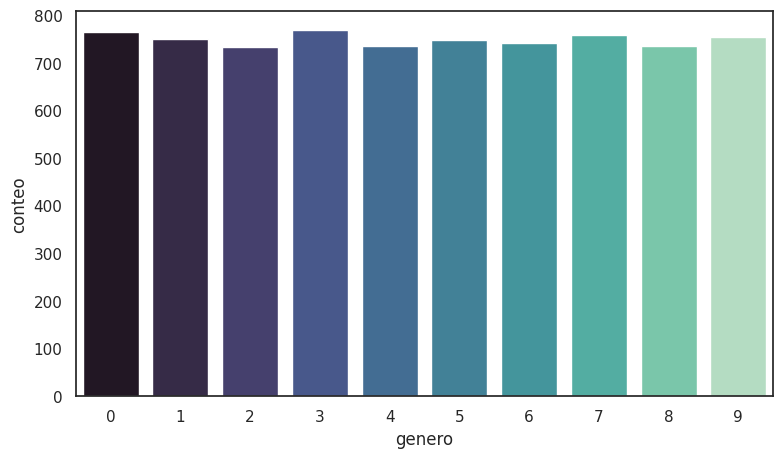

In [ ]:
df_aux=y_train_ord.groupby("genero").agg({"genero":"count"})
df_aux=df_aux.rename(columns={"genero":"conteo"}).reset_index()

plt.figure(figsize=(9,5))

sns.barplot(x='genero', y= 'conteo', data=df_aux, palette= 'mako')

plt.show;

En general, los datos parecen equilibrados, por lo que se trabajará con ellos.

#####Decision Tree

One Hot Encoding:

For criterion and depth = gini+1, train accuracy is 7.77% and test accuracy is 7.33%
For criterion and depth = gini+2, train accuracy is 13.60% and test accuracy is 12.73%
For criterion and depth = gini+3, train accuracy is 13.95% and test accuracy is 12.81%
For criterion and depth = gini+4, train accuracy is 20.70% and test accuracy is 19.38%
For criterion and depth = gini+5, train accuracy is 24.44% and test accuracy is 22.14%
For criterion and depth = gini+6, train accuracy is 35.24% and test accuracy is 32.47%
For criterion and depth = gini+7, train accuracy is 39.87% and test accuracy is 36.27%
For criterion and depth = gini+8, train accuracy is 49.61% and test accuracy is 41.71%
For criterion and depth = gini+9, train accuracy is 57.18% and test accuracy is 46.12%
For criterion and depth = gini+10, train accuracy is 64.98% and test accuracy is 49.40%
For criterion and depth = gini+11, train accuracy is 72.98% and test accuracy is 54.72%
For criterion and depth = gini+12, train ac

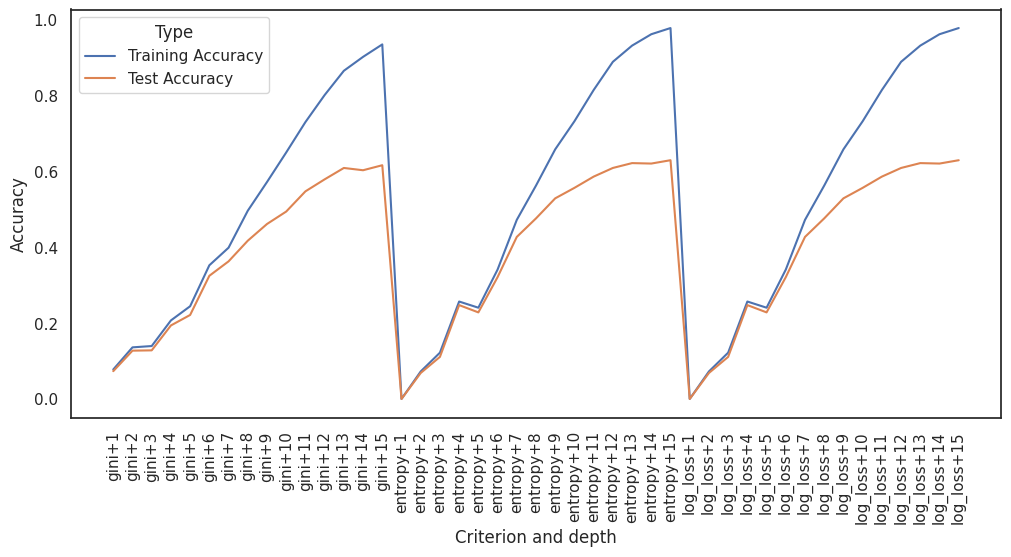

In [ ]:
criterion=["gini","entropy","log_loss"]
depth_max=15
rang_depth = np.arange(1, depth_max+1)
accs = pd.DataFrame(columns=["Criterion and depth","Training Accuracy", "Test Accuracy"])

# Iteremos sobre diferentes valores para vecinos
for crit in criterion:
    for depth in rang_depth:
        # Crear el modelo y entrenarlo
        tree = DecisionTreeClassifier(criterion=crit,max_depth=depth,random_state=0).fit(X_train,y_train_ohe)
        # Obtener la precision para el conjunto de datos de entrenamiento y testeo
        acc_tr = tree.score(X_train,y_train_ohe)
        acc_test = tree.score(X_test,y_test_ohe)

        # Guardamos la precision en un DataFrame para su posterior impresión
        accs = accs.append({"Criterion and depth":crit+'+'+str(depth),"Training Accuracy":acc_tr, "Test Accuracy":acc_test}, ignore_index=True)

        print(f"For criterion and depth = {crit+'+'+str(depth)}, train accuracy is {100*acc_tr:.2f}% and test accuracy is {100*acc_test:.2f}%")

# Mostremos la evolución de la precision
melted_accs = accs.melt("Criterion and depth", var_name="Type", value_name="Accuracy")
f, ax = plt.subplots(figsize=(12, 6))
g = sns.lineplot(x="Criterion and depth", y="Accuracy", hue='Type', data=melted_accs)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)

In [ ]:
depth_max = 15
rang_depth = np.arange(1, depth_max+1)
tuned_parameters = [{"criterion": ["gini","entropy","log_loss"],"max_depth":rang_depth}]
nfold = 5

tree_CV = GridSearchCV(DecisionTreeClassifier(random_state=0),tuned_parameters,cv=nfold,return_train_score=True).fit(X_train, y_train_ohe)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = tree_CV.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ohe,y_est)
acc_tree= tree_CV.score(X_test,y_test_ohe)

best_params = tree_CV.best_params_
cv_results=tree_CV.cv_results_

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(acc_tree))
print('Selected value of criterion: ' + str(best_params["criterion"]))
print('Selected value of max_depth: ' + str(best_params["max_depth"]))

# Mostramos los resultados
melted_accs = accs.assign(**{"Validation Accuracy": cv_results["mean_test_score"]}) \
                  .melt('Criterion and depth', var_name="Type", value_name="Accuracy")
f, ax = plt.subplots(figsize=(12, 6))
g = sns.lineplot(x="Criterion and depth", y="Accuracy", hue='Type', data=melted_accs)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)

KeyboardInterrupt: 

In [ ]:
print(y_train_ohe.columns)
CM = multilabel_confusion_matrix(y_test_ohe, y_est)
# print('Confusion matrix')
# print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)

Variables ordinales:

In [ ]:
criterion=["gini","entropy","log_loss"]
depth_max=15
rang_depth = np.arange(1, depth_max+1)
accs = pd.DataFrame(columns=["Criterion and depth","Training Accuracy", "Test Accuracy"])

# Iteremos sobre diferentes valores para vecinos
for crit in criterion:
    for depth in rang_depth:
        # Crear el modelo y entrenarlo
        tree = DecisionTreeClassifier(criterion=crit,max_depth=depth,random_state=0).fit(X_train,y_train_ord)
        # Obtener la precision para el conjunto de datos de entrenamiento y testeo
        acc_tr = tree.score(X_train,y_train_ord)
        acc_test = tree.score(X_test,y_test_ord)

        # Guardamos la precision en un DataFrame para su posterior impresión
        accs = accs.append({"Criterion and depth":crit+'+'+str(depth),"Training Accuracy":acc_tr, "Test Accuracy":acc_test}, ignore_index=True)

        print(f"For criterion and depth = {crit+'+'+str(depth)}, train accuracy is {100*acc_tr:.2f}% and test accuracy is {100*acc_test:.2f}%")

# Mostremos la evolución de la precision
melted_accs = accs.melt("Criterion and depth", var_name="Type", value_name="Accuracy")
f, ax = plt.subplots(figsize=(12, 6))
g = sns.lineplot(x="Criterion and depth", y="Accuracy", hue='Type', data=melted_accs)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)

In [ ]:
#Se hallan los mejores parámetros del modelo:

depth_max = 15
rang_depth = np.arange(1, depth_max+1)
tuned_parameters = [{"criterion": ["gini","entropy","log_loss"],"max_depth":rang_depth}]
nfold = 5

tree_CV = GridSearchCV(DecisionTreeClassifier(random_state=0),tuned_parameters,cv=nfold,return_train_score=True).fit(X_train, y_train_ord)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = tree_CV.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ord,y_est)
acc_tree= tree_CV.score(X_test,y_test_ord)

best_params = tree_CV.best_params_
cv_results=tree_CV.cv_results_

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(acc_tree))
print('Selected value of criterion: ' + str(best_params["criterion"]))
print('Selected value of max_depth: ' + str(best_params["max_depth"]))

# Mostramos los resultados
melted_accs = accs.assign(**{"Validation Accuracy": cv_results["mean_test_score"]}) \
                  .melt('Criterion and depth', var_name="Type", value_name="Accuracy")
f, ax = plt.subplots(figsize=(12, 6))
g = sns.lineplot(x="Criterion and depth", y="Accuracy", hue='Type', data=melted_accs)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)

In [ ]:
#Se ejecuta el modelo con los mejores parámetros hallados:
crit=best_params["criterion"]
depth=best_params["max_depth"]
tree_ord=DecisionTreeClassifier(criterion="entropy",max_depth=13,random_state=0).fit(X_train, y_train_ord)
y_est = tree_ord.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ord,y_est)
accuracy = tree_ord.score(X_test,y_test_ord)

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

##### Regresión Logística

Variables ordinales:

In [ ]:
#Se hallan los mejores parámetros del modelo:

rang_penalty=["l1", "l2", "elasticnet", None]
rang_solver=["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
tuned_parameters = [{'penalty': rang_penalty,'solver': rang_solver}]
nfold = 5

clf_log_reg = GridSearchCV(LogisticRegression(random_state=0), param_grid=tuned_parameters,cv=nfold,
                            return_train_score=True).fit(X_train,y_train_ord)

y_est=clf_log_reg.predict(X_test)

# Obtener la precisión de los modelos
acc_logreg = clf_log_reg.score(X_test,y_test_ord)
print("The test accuracy in logreg configuration is %2.2f%%" %(100*acc_logreg))

#Best score and params
print(clf_log_reg.best_score_)
print(clf_log_reg.best_params_)

In [ ]:
#Se ejecuta el modelo con los mejores parámetros hallados:
pen=clf_log_reg.best_params_["penalty"]
solv=clf_log_reg.best_params_["solver"]
reg_log_ord=LogisticRegression(penalty=pen,solver=solv,random_state=0).fit(X_train, y_train_ord)
y_est = reg_log_ord.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ord,y_est)
accuracy = reg_log_ord.score(X_test,y_test_ord)

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

One Hot Encoding:

In [ ]:
#LogisticRegression no permite arrays de salida de dimensión mayor a 1, por lo que habría que usar OvR:

log_reg = LogisticRegression(penalty=None,solver="newton-cg",random_state=0)
#Logistic Regression
clf_logreg = OneVsRestClassifier(log_reg).fit(X_train, y_train_ohe)

# Obtener el numero de clasificadores
num_clf_logreg=len(clf_logreg.estimators_)
print("The number of classifiers in logreg configuration is %d" %(num_clf_logreg))

# Obtener la precisión de los modelos
acc_logreg = clf_logreg.score(X_test,y_test_ohe)
print("The test accuracy in logreg configuration is %2.2f%%" %(100*acc_logreg))

Ahora probaremos la regresión logística con descenso de gradiente.

One Hot Encoding:

In [ ]:
samples = 20
nfold = 5
rang_loss=["hinge","log_loss","modified_huber"]
rang_penalty=["l2", "l1", "elasticnet"]
rang_eta0 = np.logspace(0, 0.1)
rang_alpha = np.logspace(0, 0.1)

#SGDClassifier:
model_to_set = OneVsRestClassifier(SGDClassifier(max_iter=3000,random_state=0))

parameters = dict( estimator__eta0 = rang_eta0,
                   estimator__alpha = rang_alpha,
                   estimator__loss = rang_loss,
                   estimator__penalty = rang_penalty)

clf_SGD = GridSearchCV(model_to_set, param_grid=parameters,cv=nfold,
                            return_train_score=True).fit(X_train,y_train_ohe)

# Obtener la precisión de los modelos
acc_SGD = clf_SGD.score(X_test,y_test_ohe)
print("The test accuracy in SGD configuration is %2.2f%%" %(100*acc_SGD))

In [ ]:
#Best score and params
print(clf_SGD.best_score_)
print(clf_SGD.best_params_)

Variables ordinales:

In [ ]:
clf_SGD = SGDClassifier(eta0=0.001,alpha=0.001,loss="log_loss",penalty="l1",random_state=0).fit(X_train,y_train_ord)

y_est=clf_SGD.predict(X_test)

# Obtener la precisión de los modelos
acc_SGD = clf_SGD.score(X_test,y_test_ord)
print("The test accuracy in SGD configuration is %2.2f%%" %(100*acc_SGD))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#####KNN

One Hot Encoding:

In [ ]:
K_max=20
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training Accuracy", "Test Accuracy"])

# Iteremos sobre diferentes valores para vecinos
for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    reg = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train_ohe)
    # Obtener la precision para el conjunto de datos de entrenamiento y testeo
    acc_tr = reg.score(X_train,y_train_ohe)
    acc_test = reg.score(X_test,y_test_ohe)

    # Guardamos la precision en un DataFrame para su posterior impresion
    accs = accs.append({"Neighbors":n_neighbors, "Training Accuracy":acc_tr, "Test Accuracy":acc_test}, ignore_index=True)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))

# Mostremos la evolución de la precision
melted_accs = accs.melt('Neighbors', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="Neighbors", y="Accuracy", hue='Type', data=melted_accs)

In [ ]:
#Se hallan los mejores parámetros del modelo:

k_max =20
rang_K = np.arange(1, k_max+1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 5

# Definir el modelo de clasificacion kNN con validación cruzada y entrenarlo
# Configurar CV para que devuelva las puntuaciones de entrenamiento
neigh_CV = GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=nfold,return_train_score=True).fit(X_train, y_train_ohe)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = neigh_CV.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ohe,y_est)
accuracy = neigh_CV.score(X_test,y_test_ohe)
# Se puede obtener el mejor parametro asi

K_CV = neigh_CV.best_params_['n_neighbors']

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))
print('Selected value of k: ' + str(K_CV))

In [ ]:
#Se ejecuta el modelo con los mejores parámetros hallados:
neigh_ohe=neigh_CV.best_params_['n_neighbors']
KNN_ohe=KNeighborsClassifier(n_neighbors=neigh_ohe).fit(X_train, y_train_ohe)
y_est = KNN_ohe.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ohe,y_est)
accuracy = KNN_ohe.score(X_test,y_test_ohe)

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))

In [ ]:
print(y_train_ohe.columns)
CM = multilabel_confusion_matrix(y_test_ohe, y_est)
# print('Confusion matrix')
# print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)

In [ ]:
# Mostremos los resultados
print("Cross validation results:")
cv_results = pd.DataFrame(neigh_CV.cv_results_)

for index, row in cv_results.iterrows():
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%"
        % (row['params']['n_neighbors'], 100 * row['mean_test_score'], 100 * row['std_test_score'] / 2))

# Mostramos los resultados
melted_accs = accs.assign(**{"Validation Accuracy": cv_results.mean_test_score}) \
                  .melt('Neighbors', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="Neighbors", y="Accuracy", hue='Type', data=melted_accs)

Variables ordinales:

In [ ]:
K_max=20
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training Accuracy", "Test Accuracy"])

# Iteremos sobre diferentes valores para vecinos
for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    reg = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train_ord)
    # Obtener la precision para el conjunto de datos de entrenamiento y testeo
    acc_tr = reg.score(X_train,y_train_ord)
    acc_test = reg.score(X_test,y_test_ord)

    # Guardamos la precision en un DataFrame para su posterior impresion
    accs = accs.append({"Neighbors":n_neighbors, "Training Accuracy":acc_tr, "Test Accuracy":acc_test}, ignore_index=True)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))

# Mostremos la evolución de la precision
melted_accs = accs.melt('Neighbors', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="Neighbors", y="Accuracy", hue='Type', data=melted_accs)

In [ ]:
#Se hallan los mejores parámetros del modelo:
k_max =20
rang_K = np.arange(1, k_max+1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 5

# Definir el modelo de clasificacion kNN con validación cruzada y entrenarlo
# Configurar CV para que devuelva las puntuaciones de entrenamiento
neigh_CV = GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=nfold,return_train_score=True).fit(X_train, y_train_ord)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = neigh_CV.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ord,y_est)
accuracy = neigh_CV.score(X_test,y_test_ord)
# Se puede obtener el mejor parametro asi

K_CV = neigh_CV.best_params_['n_neighbors']

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))
print('Selected value of k: ' + str(K_CV))

In [ ]:
#Se ejecuta el modelo con los mejores parámetros hallados:
neigh_ord=neigh_CV.best_params_['n_neighbors']
KNN_ord=KNeighborsClassifier(n_neighbors=neigh_ord).fit(X_train, y_train_ord)
y_est = KNN_ord.predict(X_test)

# Obtener el error cuadratico medio y la precision
MSE_tst = mean_squared_error(y_test_ord,y_est)
accuracy = KNN_ord.score(X_test,y_test_ord)

print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
# Mostremos los resultados
print("Cross validation results:")
cv_results = pd.DataFrame(neigh_CV.cv_results_)

for index, row in cv_results.iterrows():
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%"
        % (row['params']['n_neighbors'], 100 * row['mean_test_score'], 100 * row['std_test_score'] / 2))

# Mostramos los resultados
melted_accs = accs.assign(**{"Validation Accuracy": cv_results.mean_test_score}) \
                  .melt('Neighbors', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="Neighbors", y="Accuracy", hue='Type', data=melted_accs)

#####Bagging

In [ ]:
#Usando DecisionTreeClassifier como modelo base:

base_learner = DecisionTreeClassifier(max_depth=20,random_state=0)
bagging = BaggingClassifier(base_learner,n_estimators=100,max_features=0.5,max_samples=0.5).fit(X_train,y_train_ord)

acc_test = bagging.score(X_test,y_test_ord)
y_est=bagging.predict(X_test)

print('Accuracy of bagged ensemble is %2.2f '%(100*acc_test))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
#Usando RandomForestClassifier como modelo base:

base_learner = RandomForestClassifier(max_depth=20,random_state=0)
bagging = BaggingClassifier(base_learner,n_estimators=100,max_features=0.5,max_samples=0.5,random_state=0).fit(X_train,y_train_ord)

acc_test = bagging.score(X_test,y_test_ord)
y_est=bagging.predict(X_test)

print('Accuracy of bagged ensemble is %2.2f '%(100*acc_test))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#####Random Forest

In [ ]:
#Búsqueda de los mejores parámetros

# Initialize the random generator seed to compare results
np.random.seed(0)

rang_n_trees=[100,150,200]
rang_criterion=["gini", "entropy", "log_loss"]
rang_max_depth=[10,15,20]
rang_min_samples_split=[2,4,6,8,10]
tuned_parameters = [{"n_estimators": rang_n_trees,"criterion":rang_criterion,"max_depth":rang_max_depth,
                     "min_samples_split":rang_min_samples_split}]
nfold = 5

# Create RF classifier object with CV
clf_rf=GridSearchCV(RandomForestClassifier(random_state=0),tuned_parameters,cv=nfold).fit(X_train,y_train_ord)

acc_RF=clf_rf.score(X_test,y_test_ord)
best_params=clf_rf.best_params_


print(f"The best parameters are {best_params}")
print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

In [ ]:
#Ejecución del modelo con los mejores parámetros:

# Initialize the random generator seed to compare results
np.random.seed(0)

# Create RF classifier object with CV
RF=RandomForestClassifier(n_estimators=200,criterion="log_loss",
                              max_depth=15,min_samples_split=2,
                              random_state=0).fit(X_train,y_train_ord)

acc_RF=RF.score(X_test,y_test_ord)
y_est=RF.predict(X_test)

print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
# Initialize the random generator seed to test results
np.random.seed(0)

acc_test_evol = []
rang_n_learners = range(1,best_params["n_estimators"],20)
for n_learners in rang_n_learners:
    clf_RF = RandomForestClassifier(n_estimators=n_learners,criterion=best_params["criterion"],
                              max_depth=best_params["max_depth"],min_samples_split=best_params["min_samples_split"],
                              random_state=0).fit(X_train,y_train_ord)
    acc_test_evol.append(clf_RF.score(X_test,y_test_ord))

In [ ]:
# Ploting results
plt.figure()
plt.plot(rang_n_learners,acc_test_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Evolution of the random forest accuracy with the number of learners ')
plt.show()

#####AdaBoost

In [ ]:
# Initialize the random generator seed to test results

base_learner=DecisionTreeClassifier(max_depth=20)
rang_n_estimators=[50,100,150,200]
rang_algorithm=["SAMME", "SAMME.R"]
tuned_parameters = [{"n_estimators": rang_n_estimators,"algorithm":rang_algorithm}]
nfold = 5

# Create RF classifier object with CV
clf_AdaBoost=GridSearchCV(AdaBoostClassifier(base_learner,random_state=0),tuned_parameters,cv=nfold).fit(X_train,y_train_ord)

y_est=clf_AdaBoost.predict(X_test)
acc_AB=clf_AdaBoost.score(X_test,y_test_ord)
best_params=clf_AdaBoost.best_params_

print('Accuracy of adaboost ensemble is %2.2f '%(100*acc_AB))
print(f'Best params of adaboost ensemble are {best_params}')

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, y_est)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

##### XGBoost

In [ ]:
bst=XGBClassifier(max_depth=20,n_estimators=200,objective="multi:softmax",random_state=0)
bst.fit(X_train,y_train_ord)
preds=bst.predict(X_test)
acc_XGB=accuracy_score(preds,y_test_ord)
acc_XGB

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, preds)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#####LightGBM

In [ ]:
lgb=LGBMClassifier(max_depth=20,n_estimators=200,random_state=0)
lgb.fit(X_train,y_train_ord)
preds=lgb.predict(X_test)
acc_LGB=accuracy_score(preds,y_test_ord)
acc_LGB

In [ ]:
#Matriz de confusión:
cm = confusion_matrix(y_test_ord, preds)
labels=list(df_caracteristicas_3s["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#####Comparativa de los modelos

In [ ]:
resultados=pd.DataFrame({"KNeighborsClassifier (One Hot Spot)":"k=1","KNeighborsClassifier (Ordinal)":"k=1",
            "DecisionTreeClassifier (One Hot Spot)":"criterion=entropy; max_depth=13",
            "DecisionTreeClassifier (Ordinal)":"criterion=entropy; max_depth=13",
            "LogisticRegression (One Hot Spot, OvR)":"penalty=None; solver=newton-cg",
            "LogisticRegression (Ordinal)":"penalty=None; solver=newton-cg",
            "SGDClassifier (One Hot Spot, OvR)":"alpha=0.001; eta0=0.001; loss=log_loss; penalty=l1",
            "SGDClassifier (Ordinal)":"alpha=0.001; eta0=0.001; loss=log_loss; penalty=l1",
            "BaggingClassifier (DecisionTreeClassifier(max_depth=20))":"n_estimators=100; max_features=0.5; max_samples=0.5",
            "BaggingClassifier (RandomForestClassifier(max_depth=20))":"n_estimators=100; max_features=0.5; max_samples=0.5",
            "RandomForestClassifier":"criterion=log_loss; max_depth=15; min_sample_split=2; n_estimators=200",
            "AdaBoostClassifier":"algorithm: SAMME.R; n_estimators=200",
            "XGBClassifier":"max_depth=20; n_estimators=200, objective=multi:softmax",
            "LGBMClassifier":"max_depth=20; n_estimators=200"}.items(),columns=['Modelo','Parámetros'])

In [ ]:
accuracy=pd.DataFrame([{"Training accuracy":"99.91%","Test accuracy":"88.27%"},
         {"Training accuracy":"99.91%","Test accuracy":"88.27%"},
         {"Training accuracy":"93.14%","Test accuracy":"62.05%"},
         {"Training accuracy":"97.60%","Test accuracy":"66.13%"},
         {"Training accuracy":"46.85%","Test accuracy":"44.20%"},
         {"Training accuracy":"73.81%","Test accuracy":"71.46%"},
         {"Training accuracy":"44.47%","Test accuracy":"42.80%"},
         {"Training accuracy":"65.36%","Test accuracy":"62.77%"},
         {"Training accuracy":"99.73%","Test accuracy":"83.43%"},
         {"Training accuracy":"99.15%","Test accuracy":"82.23%"},
         {"Training accuracy":"99.91%","Test accuracy":"87.07%"},
         {"Training accuracy":"99.91%","Test accuracy":"89.71%"},
         {"Training accuracy":"99.91%","Test accuracy":"89.03%"},
         {"Training accuracy":"99.91%","Test accuracy":"91.55%"}])

In [ ]:
comparativa=pd.concat([resultados,accuracy],axis=1).sort_values(by="Test accuracy", ascending=False)
comparativa

### 3.1.5 Archivo de predicciones

Utilizamos el modelo de detección de género musical a los datos en producción no etiquetados y generamos un archivo con las predicciones.

In [ ]:
#usamos el mejor modelo para realizar las estimaciones:
y_est=lgb.predict(X_test)

#Almacenamos en un dataframe el id de las canciones usadas para la estimación, así como la predicción obtenida con
#el mejor modelo:
predicciones=y_test_ord.assign(prediccion=y_est)

indices=y_test_ord.index
id_cancion=pd.DataFrame(df_original.loc[indices,"filename"])

listado_predicciones=pd.concat([id_cancion,predicciones],axis=1)

labels=list(df["label"].unique())
listado_predicciones=listado_predicciones.replace(list(range(0,10)),labels).sort_values(by="filename")

listado_predicciones

#Dataframe to csv:
listado_predicciones.to_csv("listado_predicciones_ML.csv",mode='w',encoding="utf-8")

## 3.2 Modelo de Deep Learning

Por último vamos a probar con un modelo de Deep Learning.

In [ ]:
!pip install tensorflow_addons

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
np.random.seed(0)

### 3.2.1 Deep Learning con dataset 3 segundos

#### 3.2.1.1 Selección, análisis exploratorio y limpieza de datos

Como las redes neuronales necesitan muchos datos de entrada, utilizamos directamente el dataset de 3 segundos.

In [ ]:
df_original=pd.read_csv("features_3_sec.csv")

In [ ]:
df=pd.read_csv("features_3_sec.csv")
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149              0.34             0.09      0.13   
1     blues.00000.1.wav   66149              0.34             0.09      0.11   
2     blues.00000.2.wav   66149              0.35             0.09      0.13   
3     blues.00000.3.wav   66149              0.36             0.09      0.13   
4     blues.00000.4.wav   66149              0.34             0.09      0.14   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149              0.35             0.08      0.05   
9986   rock.00099.6.wav   66149              0.37             0.08      0.06   
9987   rock.00099.7.wav   66149              0.35             0.09      0.05   
9988   rock.00099.8.wav   66149              0.39             0.08      0.07   
9989   rock.00099.9.wav   66149              0.37             0.09      0.05   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0        0.00                 1773.07              167541.63   
1        0.00                 1816.69               90525.69   
2        0.00                 1788.54              111407.44   
3        0.00                 1655.29              111952.28   
4        0.00                 1630.66               79667.27   
...       ...                     ...                    ...   
9985     0.00                 1499.08              164266.89   
9986     0.00                 1847.97              281054.94   
9987     0.00                 1346.16              662956.25   
9988     0.00                 2084.52              203891.04   
9989     0.00                 1634.33              411429.17   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                     1972.74               117335.77  ...       39.69   
1                     2010.05                65671.88  ...       64.75   
2                     2084.57                75124.92  ...       67.34   
3                     1960.04                82913.64  ...       47.74   
4                     1948.50                60204.02  ...       30.34   
...                       ...                     ...  ...         ...   
9985                  1718.71                85931.57  ...       42.49   
9986                  1906.47                99727.04  ...       32.42   
9987                  1561.86               138762.84  ...       78.23   
9988                  2018.37                22860.99  ...       28.32   
9989                  1867.42               119722.21  ...       38.80   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0           -3.24       36.49         0.72       38.10        -5.05   
1           -6.06       40.68         0.16       51.26        -2.84   
2           -1.77       28.35         2.38       45.72        -1.94   
3           -3.84       28.34         1.22       34.77        -3.58   
4            0.66       45.88         1.69       51.36        -3.39   
...           ...         ...          ...         ...          ...   
9985        -9.09       38.33        -4.25       31.05        -5.63   
9986       -12.38       66.42        -3.08       54.41       -11.96   
9987        -2.52       21.78         4.81       25.98         1.78   
9988        -5.36       17.21         6.46       21.44         2.35   
9989       -11.60       58.98        -0.18       55.76        -6.90   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0          33.62        -0.24       43.77  blues  
1          97.03         5.78       59.94  blues  
2          53.05         2.52       33.11  blues  
3          50.84         3.63       32.02  blues  
4          26.74         0.54       29.15  blues  
...          ...          ...         ...    ...  
9985       48.80         1.82       38.97   rock  
9986       63.45         0.43       18.70   rock  
9987       48.58        -0.30       41.59   rock  
9988       24.84         0.68    

In [ ]:
#Análisis de correlación para reducir/eliminar variables redundantes. Se eliminarán aquellas variables con una correlación
#superior/inferior al +/-85%.

In [ ]:
df_corr=pd.DataFrame(df.corr().unstack(),columns=["Correlación"])

In [ ]:
df_corr[(df_corr["Correlación"]>=0.85) & (df_corr["Correlación"]<1)]

Correlación
rms_mean                harmony_var                     0.88
spectral_centroid_mean  spectral_bandwidth_mean         0.89
                        rolloff_mean                    0.97
                        zero_crossing_rate_mean         0.87
spectral_bandwidth_mean spectral_centroid_mean          0.89
                        rolloff_mean                    0.95
spectral_bandwidth_var  rolloff_var                     0.89
rolloff_mean            spectral_centroid_mean          0.97
                        spectral_bandwidth_mean         0.95
rolloff_var             spectral_bandwidth_var          0.89
zero_crossing_rate_mean spectral_centroid_mean          0.87
harmony_var             rms_mean                        0.88

In [ ]:
df_corr[(df_corr["Correlación"]<=-0.85) & (df_corr["Correlación"]>-1)]

Correlación
spectral_centroid_mean  mfcc2_mean                     -0.93
spectral_bandwidth_mean mfcc2_mean                     -0.89
rolloff_mean            mfcc2_mean                     -0.92
mfcc2_mean              spectral_centroid_mean         -0.93
                        spectral_bandwidth_mean        -0.89
                        rolloff_mean                   -0.92

In [ ]:
#Se eliminan las siguientes variables con correlaciones muy altas:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

In [ ]:
df_corr=pd.DataFrame(df.corr().unstack(),columns=["Correlación"])

In [ ]:
display(df_corr[(df_corr["Correlación"]>=0.85) & (df_corr["Correlación"]<1)])
display(df_corr[(df_corr["Correlación"]<=-0.85) & (df_corr["Correlación"]>-1)])

Empty DataFrame
Columns: [Correlación]
Index: []

Empty DataFrame
Columns: [Correlación]
Index: []

In [ ]:
#Adicionalmente, se eliminarán las columnas filename y length: la primera por no aportar información, y la segunda, al ser
#invariable para todos los registros, no aporta información de valor al problema.
df=df.drop(["filename","length"],axis=1)

In [ ]:
#En el caso de las variables de entrada, serán las mismas para cualquier tipo de codificación de las variables de salida:
X=np.array(df.loc[:,list(df.columns[:-1])])
print(X.shape)
X

(9990, 52)


array([[ 3.35406363e-01,  9.10482928e-02,  1.30405024e-01, ...,
         3.36180725e+01, -2.43026793e-01,  4.37717667e+01],
       [ 3.43065351e-01,  8.61465260e-02,  1.12699248e-01, ...,
         9.70308304e+01,  5.78406334e+00,  5.99430809e+01],
       [ 3.46814752e-01,  9.22428891e-02,  1.32003382e-01, ...,
         5.30508347e+01,  2.51737475e+00,  3.31051216e+01],
       ...,
       [ 3.47480893e-01,  8.90194401e-02,  5.24028763e-02, ...,
         4.85823784e+01, -2.99545288e-01,  4.15869904e+01],
       [ 3.87527317e-01,  8.48154277e-02,  6.64298981e-02, ...,
         2.48436127e+01,  6.75824106e-01,  1.27877502e+01],
       [ 3.69292945e-01,  8.67586955e-02,  5.05241193e-02, ...,
         3.94859009e+01, -3.41253424e+00,  3.17274895e+01]])

In [ ]:
#Para las variables de salida:
y=df[["label"]]
print(y.shape)
y

(9990, 1)


label
0     blues
1     blues
2     blues
3     blues
4     blues
...     ...
9985   rock
9986   rock
9987   rock
9988   rock
9989   rock

[9990 rows x 1 columns]

In [ ]:
#Grupos de entrenamiento y test
from sklearn.model_selection import train_test_split

[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7992, 52)
(7992, 1)
(1998, 52)
(1998, 1)


In [ ]:
#->Codificación de las variables de salida según labels:
labels=df["label"].unique().tolist()
y_train=np.array(y_train.replace(labels,list(range(0,10))))
y_test=np.array(y_test.replace(labels,list(range(0,10))))


print(y_test.shape)
y_test

(1998, 1)


array([[8],
       [8],
       [9],
       ...,
       [5],
       [6],
       [8]], dtype=int64)

In [ ]:
#Media vs mediana
mean = df.mean(axis=0,numeric_only=True)
median = df.median(axis=0,numeric_only=True)
maximum=df.max(axis=0,numeric_only=True)
minimum=df.min(axis=0,numeric_only=True)

pd.concat([mean,median,mean-median],axis=1,keys=["mean","median","avg_difference"])

mean    median  avg_difference
chroma_stft_mean             0.38      0.38           -0.01
chroma_stft_var              0.08      0.09           -0.00
rms_mean                     0.13      0.12            0.01
rms_var                      0.00      0.00            0.00
spectral_centroid_var   415891.07 266158.60       149732.47
spectral_bandwidth_mean   2242.77   2232.88            9.89
spectral_bandwidth_var  117814.25  89892.27        27921.98
zero_crossing_rate_mean      0.10      0.10            0.00
zero_crossing_rate_var       0.00      0.00            0.00
harmony_mean                -0.00     -0.00           -0.00
perceptr_mean               -0.00     -0.00           -0.00
perceptr_var                 0.01      0.00            0.00
tempo                      124.28    123.05            1.23
mfcc1_mean                -144.54   -119.99          -24.56
mfcc1_var                 2763.45   2079.72          683.73
mfcc2_var                  577.87    455.39          122.48
mfcc3_mean                  -8.93    -10.67            1.74
mfcc3_var                  374.27    297.25           77.02
mfcc4_mean                  36.31     36.75           -0.44
mfcc4_var                  183.25    149.76           33.49
mfcc5_mean                  -1.15     -0.56           -0.59
mfcc5_var                  143.92    114.40           29.52
mfcc6_mean                  14.64     14.97           -0.32
mfcc6_var                  107.44     87.45           19.99
mfcc7_mean                  -5.13     -5.08           -0.05
mfcc7_var                   98.25     80.91           17.34
mfcc8_mean                  10.13      9.91            0.22
mfcc8_var                   74.37     63.07           11.30
mfcc9_mean                  -7.00     -7.35            0.35
mfcc9_var                   73.72     62.07           11.64
mfcc10_mean                  7.73      7.54            0.19
mfcc10_var                  68.36     58.60            9.76
mfcc11_mean                 -6.03     -5.88           -0.15
mfcc11_var                  63.21     53.28            9.93
mfcc12_mean                  4.48      4.21            0.26
mfcc12_var                  57.38     48.81            8.57
mfcc13_mean                 -4.80     -4.40           -0.40
mfcc13_var                  56.54     48.31            8.23
mfcc14_mean                  1.78      1.84           -0.05
mfcc14_var                  53.71     45.33            8.37
mfcc15_mean                 -3.87     -3.88            0.01
mfcc15_var                  52.16     43.40            8.76
mfcc16_mean                  1.15      1.21           -0.06
mfcc16_var                  49.64     41.40            8.23
mfcc17_mean                 -3.97     -4.22            0.26
mfcc17_var                  51.51     41.99            9.52
mfcc18_mean                  0.51      0.50            0.00
mfcc18_var                  52.18     41.44           10.73
mfcc19_mean                 -2.33     -2.55            0.22
mfcc19_var                  54.66     43.05           11.61
mfcc20_mean                 -1.10     -1.19            0.09
mfcc20_var                  57.13     44.16           12.97

In [ ]:
#Obtener 1.5 el rango intercuartilico
IQR = df.quantile(0.75,numeric_only=True)-df.quantile(0.25,numeric_only=True)
#Obtener los valores maximos
maxs = df.max(numeric_only=True)
#Obtener los valores minimos
mins = df.min(numeric_only=True)
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = df.median(numeric_only=True)+1.5*IQR
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = df.median(numeric_only=True)-1.5*IQR
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs>sup
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = mins<inf

pd.concat([out_sup,out_inf],axis=1,keys=["Outlier Superior","Outlier Inferior"])

Outlier Superior  Outlier Inferior
chroma_stft_mean                     True              True
chroma_stft_var                      True              True
rms_mean                             True             False
rms_var                              True             False
spectral_centroid_var                True             False
spectral_bandwidth_mean              True              True
spectral_bandwidth_var               True             False
zero_crossing_rate_mean              True             False
zero_crossing_rate_var               True             False
harmony_mean                         True              True
perceptr_mean                        True              True
perceptr_var                         True             False
tempo                                True              True
mfcc1_mean                           True              True
mfcc1_var                            True             False
mfcc2_var                            True             False
mfcc3_mean                           True              True
mfcc3_var                            True             False
mfcc4_mean                           True              True
mfcc4_var                            True             False
mfcc5_mean                           True              True
mfcc5_var                            True             False
mfcc6_mean                           True              True
mfcc6_var                            True             False
mfcc7_mean                           True              True
mfcc7_var                            True             False
mfcc8_mean                           True              True
mfcc8_var                            True             False
mfcc9_mean                           True              True
mfcc9_var                            True             False
mfcc10_mean                          True              True
mfcc10_var                           True             False
mfcc11_mean                          True              True
mfcc11_var                           True             False
mfcc12_mean                          True              True
mfcc12_var                           True             False
mfcc13_mean                          True              True
mfcc13_var                           True             False
mfcc14_mean                          True              True
mfcc14_var                           True             False
mfcc15_mean                          True              True
mfcc15_var                           True             False
mfcc16_mean                          True              True
mfcc16_var                           True             False
mfcc17_mean                          True              True
mfcc17_var                           True             False
mfcc18_mean                          True              True
mfcc18_var                           True             False
mfcc19_mean                          True              True
mfcc19_var                           True             False
mfcc20_mean                          True              True
mfcc20_var                           True             False

In [ ]:
#Puesto que existen outliers, se usará un método robusto para normalizar los datos.
from sklearn.preprocessing import RobustScaler
# Definir el modelo de normalizacion
scaler = RobustScaler()
# Entrena y normaliza los datos de entrenamiento y testeo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Finalmente, vamos a analizar la distribución de nuestros datos de entrenamiento:

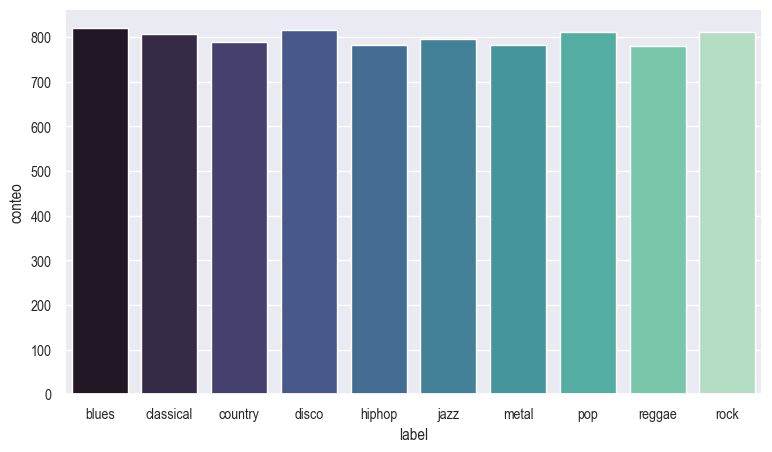

In [ ]:
df_aux=pd.DataFrame(y_train,columns=["label"])
labels=list(df["label"].unique())
df_aux=df_aux.groupby("label").agg({"label":"count"})
df_aux=df_aux.rename(columns={"label":"conteo"}).reset_index()
df_aux["label"]=df_aux["label"].replace(list(range(0,10)),labels)

plt.figure(figsize=(9,5))

sns.barplot(x='label', y= 'conteo', data=df_aux, palette='mako')

plt.show;

In [ ]:
#En general, los datos parecen equilibrados, por lo que se trabajará con ellos.

#### 3.2.1.2 Entrenamiento, parametrización y evaluación de las redes neuronales

Resultados tras análisis de correlación:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 2048)              108544    
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 h2 (Dense)                  (None, 1024)              2098176   
                                                                 
 batch_normalization_5 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

200/200 [==============================] - 5s 24ms/step - loss: 0.1954 - accuracy: 0.9417 - val_loss: 0.3735 - val_accuracy: 0.8931
Epoch 33/600
200/200 [==============================] - 5s 24ms/step - loss: 0.1678 - accuracy: 0.9468 - val_loss: 0.3883 - val_accuracy: 0.8793
Epoch 34/600
200/200 [==============================] - 5s 24ms/step - loss: 0.1769 - accuracy: 0.9442 - val_loss: 0.3664 - val_accuracy: 0.8931
Epoch 35/600
200/200 [==============================] - 5s 23ms/step - loss: 0.1659 - accuracy: 0.9465 - val_loss: 0.3917 - val_accuracy: 0.8862
Epoch 36/600
200/200 [==============================] - 5s 24ms/step - loss: 0.1590 - accuracy: 0.9467 - val_loss: 0.3890 - val_accuracy: 0.8887
Epoch 37/600
200/200 [==============================] - 5s 24ms/step - loss: 0.1713 - accuracy: 0.9465 - val_loss: 0.3914 - val_accuracy: 0.8899
Epoch 38/600
200/200 [==============================] - 5s 24ms/step - loss: 0.1643 - accuracy: 0.9484 - val_loss: 0.3795 - val_accuracy: 0.888

200/200 [==============================] - 5s 23ms/step - loss: 0.0502 - accuracy: 0.9825 - val_loss: 0.3663 - val_accuracy: 0.9149
Epoch 145/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.3184 - val_accuracy: 0.9243
Epoch 146/600
200/200 [==============================] - 5s 24ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.3518 - val_accuracy: 0.9143
Epoch 147/600
200/200 [==============================] - 5s 24ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.3375 - val_accuracy: 0.9168
Epoch 148/600
200/200 [==============================] - 5s 24ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.3270 - val_accuracy: 0.9225
Epoch 149/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.3502 - val_accuracy: 0.9174
Epoch 150/600
200/200 [==============================] - 5s 24ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.3567 - val_accuracy:

200/200 [==============================] - 5s 23ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.3040 - val_accuracy: 0.9250
Epoch 257/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.2888 - val_accuracy: 0.9300
Epoch 258/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.3172 - val_accuracy: 0.9293
Epoch 259/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.3091 - val_accuracy: 0.9275
Epoch 260/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.2985 - val_accuracy: 0.9281
Epoch 261/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0344 - accuracy: 0.9880 - val_loss: 0.3252 - val_accuracy: 0.9250
Epoch 262/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0405 - accuracy: 0.9861 - val_loss: 0.3338 - val_accuracy:

200/200 [==============================] - 5s 23ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.3129 - val_accuracy: 0.9250
Epoch 369/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0137 - accuracy: 0.9948 - val_loss: 0.3208 - val_accuracy: 0.9300
Epoch 370/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.3145 - val_accuracy: 0.9300
Epoch 371/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.3092 - val_accuracy: 0.9218
Epoch 372/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.3265 - val_accuracy: 0.9287
Epoch 373/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.3649 - val_accuracy: 0.9174
Epoch 374/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.3302 - val_accuracy:

200/200 [==============================] - 5s 23ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.3054 - val_accuracy: 0.9287
Epoch 481/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.3013 - val_accuracy: 0.9306
Epoch 482/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.3256 - val_accuracy: 0.9262
Epoch 483/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.3149 - val_accuracy: 0.9306
Epoch 484/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.2995 - val_accuracy: 0.9250
Epoch 485/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.3230 - val_accuracy: 0.9300
Epoch 486/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.3081 - val_accuracy:

200/200 [==============================] - 5s 23ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.3142 - val_accuracy: 0.9293
Epoch 593/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.3448 - val_accuracy: 0.9237
Epoch 594/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.3245 - val_accuracy: 0.9287
Epoch 595/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.3165 - val_accuracy: 0.9237
Epoch 596/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0095 - accuracy: 0.9958 - val_loss: 0.3096 - val_accuracy: 0.9331
Epoch 597/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.3530 - val_accuracy: 0.9275
Epoch 598/600
200/200 [==============================] - 5s 23ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.3454 - val_accuracy:

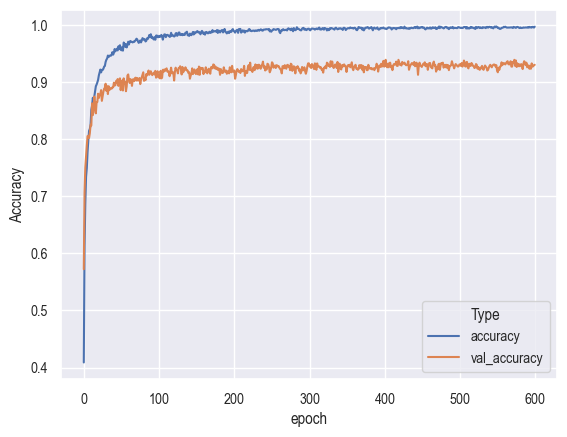

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(2048, activation=tf.nn.relu,input_shape=[X_train.shape[1]], name='h1'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation=tf.nn.relu, name='h2'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, name='h3'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, name='h4'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, name='h5'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, name='h6'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, name='h7'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax,name='ho')
])
model.summary()

#SOLUCION
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=600, validation_split = 0.2)

hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

63/63 [==============================] - 0s 4ms/step


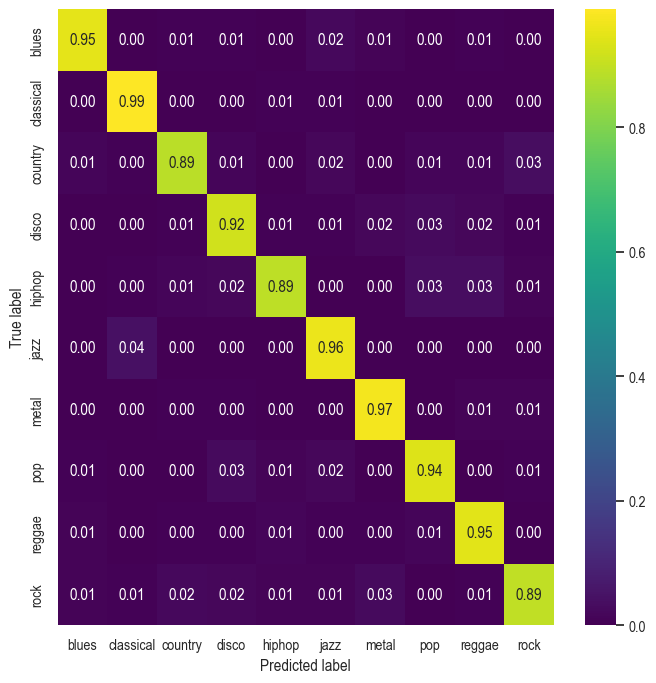

In [ ]:
#Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_est=model.predict(X_test)
y_est_label=[]
for x in range(0,len(y_est)):
    max_value=max(y_est[x])
    index=list(y_est[x]).index(max_value)
    y_est_label.append(index)

cm = confusion_matrix(y_test, y_est_label)
labels=list(df_original["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

Resultados tras tratamiento de outliers y filtrado parámetros:

In [ ]:
df=pd.read_csv("features_3_sec.csv")
#Variables eliminadas por alta correlación:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

In [ ]:
IQR = df.quantile(0.75,numeric_only=True)-df.quantile(0.25,numeric_only=True)
sup = df.median(numeric_only=True)+2*IQR
inf = df.median(numeric_only=True)-2*IQR

params=["rms_var","spectral_centroid_var","spectral_bandwidth_var","zero_crossing_rate_mean","zero_crossing_rate_var",
        "harmony_mean","perceptr_mean","perceptr_var","tempo","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var",
        "mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var","mfcc11_var","mfcc12_var","mfcc13_var",
        "mfcc14_var","mfcc15_var","mfcc16_var","mfcc17_var","mfcc18_var","mfcc19_var","mfcc20_var"]
df_empty=pd.DataFrame({'param':[],'country':[], 'disco':[], 'rock':[]})

for x in params:
    r=[]
    for label in ["country","disco","rock"]:
        r.append(len(df[(df["label"]==label) & ((df[x]>sup[x]) | (df[x]<inf[x]))]))
    df_empty=df_empty.append({'param':x, 'country':r[0],'disco':r[1],'rock':r[2]}, ignore_index=True)

df_empty

param  country  disco   rock
0                   rms_var     2.00  60.00   8.00
1     spectral_centroid_var    20.00  44.00  42.00
2    spectral_bandwidth_var    28.00  48.00  50.00
3   zero_crossing_rate_mean     2.00   4.00   0.00
4    zero_crossing_rate_var    23.00 117.00  58.00
5              harmony_mean     7.00 173.00 374.00
6             perceptr_mean    51.00 164.00 265.00
7              perceptr_var     0.00  48.00   0.00
8                     tempo     4.00  12.00  10.00
9                 mfcc1_var    20.00  33.00  33.00
10                mfcc2_var    40.00  27.00  33.00
11                mfcc3_var    13.00  25.00  14.00
12                mfcc4_var    28.00  21.00  12.00
13                mfcc5_var    52.00  10.00  12.00
14                mfcc6_var    35.00  33.00  10.00
15                mfcc7_var    22.00  12.00  16.00
16                mfcc8_var    29.00   7.00  13.00
17                mfcc9_var    56.00  12.00  22.00
18               mfcc10_var    64.00  12.00  12.00
19               mfcc11_var    40.00  21.00  10.00
20               mfcc12_var    47.00  17.00   8.00
21               mfcc13_var    27.00  20.00  16.00
22               mfcc14_var    29.00  20.00  15.00
23               mfcc15_var    24.00  28.00  19.00
24               mfcc16_var    29.00  39.00  10.00
25               mfcc17_var    39.00  35.00  21.00
26               mfcc18_var    33.00  39.00  30.00
27               mfcc19_var    28.00  36.00  31.00
28               mfcc20_var    28.00  30.00  25.00

In [ ]:
df=pd.read_csv("features_3_sec.csv")
#Variables eliminadas por alta correlación:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

#Se procede a eliminar aquellas variables con elevado número de outliers, y según distribución de valores:
df_3_=df.drop(["filename"],axis=1)
df_3_=df_3_.drop(["spectral_centroid_var","spectral_bandwidth_var","zero_crossing_rate_var","mfcc1_var","mfcc2_var",
                  "mfcc4_var","mfcc6_var","mfcc7_var","mfcc10_var","mfcc12_var","mfcc14_var","mfcc17_var","mfcc18_var",
                  "mfcc19_var","mfcc20_var"],axis=1)

#En el caso de las variables de entrada, serán las mismas para cualquier tipo de codificación de las variables de salida:

X_=np.array(df_3_.loc[:,list(df_3_.columns[:-1])])
y_=df_3_[["label"]]

from sklearn.model_selection import train_test_split
[X_train_,X_test_,y_train_,y_test_]=train_test_split(X_,y_,test_size=0.2,random_state=0)

#->Codificación de las variables de salida según labels:
labels=df_3_["label"].unique().tolist()
y_train_=np.array(y_train_.replace(labels,list(range(0,10))))
y_test_=np.array(y_test_.replace(labels,list(range(0,10))))

#Puesto que existen outliers, se usará un método robusto para normalizar los datos.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(2048, activation=tf.nn.relu,input_shape=[X_train.shape[1]], name='h1'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation=tf.nn.relu, name='h2'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, name='h3'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, name='h4'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, name='h5'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, name='h6'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, name='h7'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax,name='ho')
])
model.summary()

#SOLUCION
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=600, validation_split = 0.2)

hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 2048)              108544    
                                                                 
 batch_normalization_15 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 h2 (Dense)                  (None, 1024)              2098176   
                                                                 
 batch_normalization_16 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 1024)             

KeyboardInterrupt: 

In [ ]:
#Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_est=model.predict(X_test)
y_est_label=[]
for x in range(0,len(y_est)):
    max_value=max(y_est[x])
    index=list(y_est[x]).index(max_value)
    y_est_label.append(index)

cm = confusion_matrix(y_test, y_est_label)
labels=list(df_original["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#### 3.2.1.3 Archivo de predicciones

In [ ]:
#Almacenamos en un dataframe el id de las canciones usadas para la estimación, así como la predicción obtenida con
#el mejor modelo:

predicciones=y_test_df.assign(prediccion=y_est_label)

indices=y_test_df.index
id_cancion=pd.DataFrame(df_original.loc[indices,"filename"])

listado_predicciones=pd.concat([id_cancion,predicciones],axis=1)

listado_predicciones=listado_predicciones.replace(list(range(0,10)),labels)

#Dataframe to csv:
listado_predicciones.to_csv("listado_predicciones_DL_3sec.csv",mode='w',encoding="utf-8",index=False)

listado_predicciones.head(40)

filename genero prediccion
9     blues.00000.9.wav  blues      blues
15    blues.00001.5.wav  blues      blues
18    blues.00001.8.wav  blues      blues
20    blues.00002.0.wav  blues      blues
22    blues.00002.2.wav  blues      blues
...                 ...    ...        ...
9973   rock.00098.3.wav   rock       rock
9981   rock.00099.1.wav   rock  classical
9985   rock.00099.5.wav   rock       rock
9988   rock.00099.8.wav   rock       rock
9989   rock.00099.9.wav   rock       rock

[2498 rows x 3 columns]

### 3.2.2 Mejora con Data Augmentation

Como contabamos con los archivos de audio, decidimos probar a sacar los datos de características de los mismos y probar con ellos a ver qué resultados se podían obtener con ellos.

In [ ]:
!pip install librosa

     -------------------------------------- 253.7/253.7 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 184.6/184.6 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 15.9 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
np.random.seed(0)
import librosa
import re
import os

In [ ]:
df_30=pd.read_csv("features_30_sec.csv")
df_3=pd.read_csv("features_3_sec.csv")

Visualización EDA

<Axes: xlabel='label', ylabel='rms_mean'>

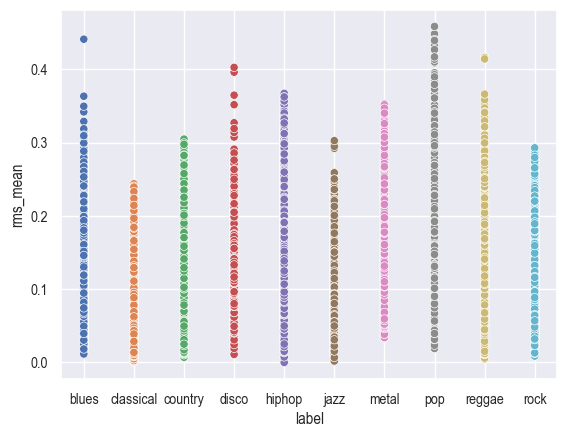

In [ ]:
sns.scatterplot(data=df_30, x="label", y="rms_mean",hue="label",legend=False)

<Axes: xlabel='rms_mean', ylabel='Density'>

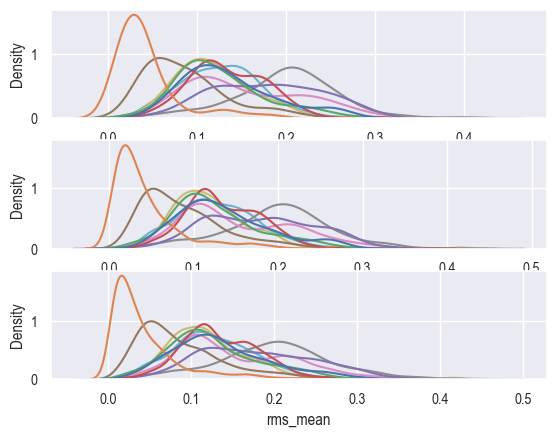

In [ ]:
f, axes = plt.subplots(3,1)
sns.kdeplot(data=df_30, x="rms_mean",hue="label",legend=False, ax=axes[0])
sns.kdeplot(data=df_3, x="rms_mean",hue="label",legend=False, ax=axes[1])

<Axes: xlabel='chroma_stft_mean', ylabel='spectral_centroid_mean'>

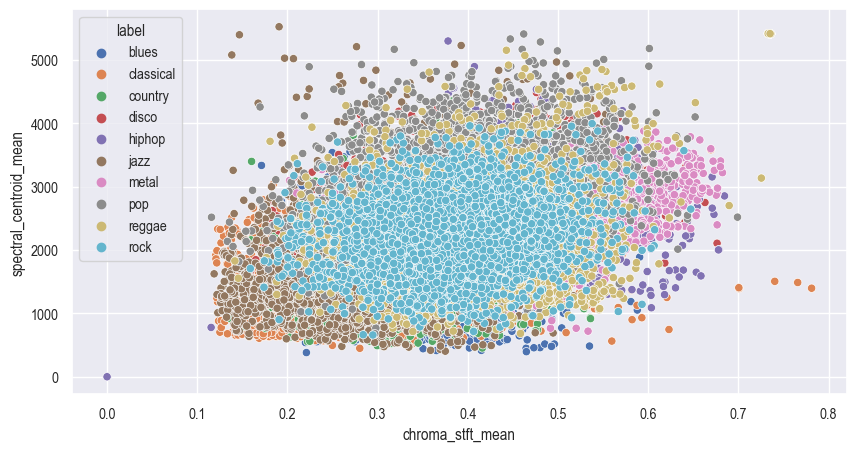

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df_30, x="chroma_stft_mean", y="spectral_centroid_mean",hue="label",legend=True)

Inicialización de diccionarios

In [ ]:
df_sintetico_empty=pd.DataFrame({'filename':[], 'chroma_stft_mean':[], 'chroma_stft_var':[], 'rms_mean':[],
       'rms_var':[], 'spectral_centroid_mean':[], 'spectral_centroid_var':[],
       'spectral_bandwidth_mean':[], 'spectral_bandwidth_var':[], 'rolloff_mean':[],
       'rolloff_var':[], 'zero_crossing_rate_mean':[], 'zero_crossing_rate_var':[],
       'harmony_mean':[], 'harmony_var':[], 'perceptr_mean':[], 'perceptr_var':[], 'tempo':[],
       'mfcc1_mean':[], 'mfcc1_var':[], 'mfcc2_mean':[], 'mfcc2_var':[], 'mfcc3_mean':[],
       'mfcc3_var':[], 'mfcc4_mean':[], 'mfcc4_var':[], 'mfcc5_mean':[], 'mfcc5_var':[],
       'mfcc6_mean':[], 'mfcc6_var':[], 'mfcc7_mean':[], 'mfcc7_var':[], 'mfcc8_mean':[],
       'mfcc8_var':[], 'mfcc9_mean':[], 'mfcc9_var':[], 'mfcc10_mean':[], 'mfcc10_var':[],
       'mfcc11_mean':[], 'mfcc11_var':[], 'mfcc12_mean':[], 'mfcc12_var':[], 'mfcc13_mean':[],
       'mfcc13_var':[], 'mfcc14_mean':[], 'mfcc14_var':[], 'mfcc15_mean':[], 'mfcc15_var':[],
       'mfcc16_mean':[], 'mfcc16_var':[], 'mfcc17_mean':[], 'mfcc17_var':[], 'mfcc18_mean':[],
       'mfcc18_var':[], 'mfcc19_mean':[], 'mfcc19_var':[], 'mfcc20_mean':[], 'mfcc20_var':[],
       'label':[]})

In [ ]:
dict_aux_empty={'chroma_stft_mean':[], 'chroma_stft_var':[], 'rms_mean':[],
       'rms_var':[], 'spectral_centroid_mean':[], 'spectral_centroid_var':[],
       'spectral_bandwidth_mean':[], 'spectral_bandwidth_var':[], 'rolloff_mean':[],
       'rolloff_var':[], 'zero_crossing_rate_mean':[], 'zero_crossing_rate_var':[],
       'harmony_mean':[], 'harmony_var':[], 'perceptr_mean':[], 'perceptr_var':[], 'tempo':[],
       'mfcc1_mean':[], 'mfcc1_var':[], 'mfcc2_mean':[], 'mfcc2_var':[], 'mfcc3_mean':[],
       'mfcc3_var':[], 'mfcc4_mean':[], 'mfcc4_var':[], 'mfcc5_mean':[], 'mfcc5_var':[],
       'mfcc6_mean':[], 'mfcc6_var':[], 'mfcc7_mean':[], 'mfcc7_var':[], 'mfcc8_mean':[],
       'mfcc8_var':[], 'mfcc9_mean':[], 'mfcc9_var':[], 'mfcc10_mean':[], 'mfcc10_var':[],
       'mfcc11_mean':[], 'mfcc11_var':[], 'mfcc12_mean':[], 'mfcc12_var':[], 'mfcc13_mean':[],
       'mfcc13_var':[], 'mfcc14_mean':[], 'mfcc14_var':[], 'mfcc15_mean':[], 'mfcc15_var':[],
       'mfcc16_mean':[], 'mfcc16_var':[], 'mfcc17_mean':[], 'mfcc17_var':[], 'mfcc18_mean':[],
       'mfcc18_var':[], 'mfcc19_mean':[], 'mfcc19_var':[], 'mfcc20_mean':[], 'mfcc20_var':[]}

Se definen las funciones a emplear:

In [ ]:
def librosa_params(folder,f):
    y, sr = librosa.load(folder+"\\"+f)
    params=pd.DataFrame({'chroma_stft':[], 'rms':[],'spectral_centroid':[],'spectral_bandwidth':[], 'rolloff':[], 'zero_crossing_rate':[],
       'harmony':[],'perceptr':[], 'onset_env':[],'mfcc1':[],  'mfcc2':[],  'mfcc3':[],'mfcc4':[],  'mfcc5':[],'mfcc6':[],
       'mfcc7':[],  'mfcc8':[],'mfcc9':[], 'mfcc10':[],'mfcc11':[], 'mfcc12':[],  'mfcc13':[],'mfcc14':[], 'mfcc15':[],
       'mfcc16':[],  'mfcc17':[],  'mfcc18':[],'mfcc19':[],  'mfcc20':[]})

    #Chroma_stft:
    chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr)

    #RMS:
    rms=librosa.feature.rms(y=y)

    #Spectral_centroid:
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    #Spectral_bandwidth:
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    #Rolloff:
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    #Zero_crossing_rate:
    zero_cross_rate=librosa.feature.zero_crossing_rate(y)

    #Harmony and Perceptr:
    harmony, perceptr = librosa.effects.hpss(y)

    #Tempo:
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)

    #MFCC:
    hop_length = 512
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=20)
    mfcc_single=[]
    for x in range(0,len(mfcc)):
        mfcc_single.append(mfcc[x])

    params=params.append({'chroma_stft':chroma_stft, 'rms':rms,'spectral_centroid':spec_cent,'spectral_bandwidth':spec_bw,
                         'rolloff':rolloff, 'zero_crossing_rate':zero_cross_rate,'harmony':harmony,'perceptr':perceptr,
                         'onset_env':onset_env,'mfcc1':mfcc_single[0],  'mfcc2':mfcc_single[1],  'mfcc3':mfcc_single[2],
                         'mfcc4':mfcc_single[3],  'mfcc5':mfcc_single[4],'mfcc6':mfcc_single[5], 'mfcc7':mfcc_single[6],
                         'mfcc8':mfcc_single[7],'mfcc9':mfcc_single[8], 'mfcc10':mfcc_single[9],'mfcc11':mfcc_single[10],
                         'mfcc12':mfcc_single[11],  'mfcc13':mfcc_single[12],'mfcc14':mfcc_single[13], 'mfcc15':mfcc_single[14],
                         'mfcc16':mfcc_single[15],  'mfcc17':mfcc_single[16],  'mfcc18':mfcc_single[17],'mfcc19':mfcc_single[18],
                         'mfcc20':mfcc_single[19]}, ignore_index=True)

    return params

In [ ]:
def augment_stats(stat,n=1,Chroma=False):
    param=stat
    avg=[]
    var=[]
    count=0
    start=0

    if Chroma==True:
        l=int(param.shape[1]/n)
        end=l

        while count<n:
            q=[]
            if count!=n-1:
                for x in range(0,len(param)):
                    q.append(param[x][start:end])
                q=np.array(q)
                avg.append(q.mean())
                var.append(q.std()**2)
                start=end
                end+=l
                count+=1
            else:
                for x in range(0,len(param)):
                    q.append(param[x][start:])
                q=np.array(q)
                avg.append(q.mean())
                var.append(q.std()**2)
                count+=1
    else:
        if param.shape[0]==1:
            param=param[0]
        l=int(len(param)/n)
        end=l

        while count<n:
            if count!=n-1:
                avg.append(param[start:end].mean())
                var.append(param[start:end].std()**2)
                start=end
                end+=l
                count+=1
            else:
                avg.append(param[start:].mean())
                var.append(param[start:].std()**2)
                start=end
                end+=l
                count+=1

    return avg,var

In [ ]:
def augment_stats_tempo(folder,f,onset_env,n=1):
    y, sr = librosa.load(folder+"\\"+f)
    param=onset_env
    tempo=[]
    count=0
    start=0

    if param.shape[0]==1:
        param=param[0]
    l=int(len(param)/n)
    end=l

    while count<n:
        if count!=n-1:
            tempo.append(librosa.feature.tempo(onset_envelope=param[start:end], sr=sr)[0])
            start=end
            end+=l
            count+=1
        else:
            tempo.append(librosa.feature.tempo(onset_envelope=param[start:], sr=sr)[0])
            start=end
            end+=l
            count+=1

    return tempo

In [ ]:
def dict_aux_creation(folder,f,params_single,dict_aux_empty,n):
    dict_aux=dict_aux_empty
    count=0
    #Calculamos todos los parámetros excepto tempo:
    for x in params_single:
        if count==0:
            avg,var=augment_stats(params_single[x][0],n=n,Chroma=True)
            dict_aux[x+"_mean"]=avg
            dict_aux[x+"_var"]=var
            count=1
        else:
            avg,var=augment_stats(params_single[x][0],n=n,Chroma=False)
            dict_aux[x+"_mean"]=avg
            dict_aux[x+"_var"]=var
    dict_aux.pop("onset_env_mean")
    dict_aux.pop("onset_env_var")

    #Calculamos el parámetro tempo:
    dict_aux["tempo"]=augment_stats_tempo(folder,f,params_single["onset_env"][0],n=n)

    return dict_aux

In [ ]:
def append_results(f,dict_aux,df_sintetico,x):
    filename=f+'.'+str(x)
    pattern = re.compile(r"^[^.]*")
    label=re.search(pattern, filename).group(0)

    df_sintetico=df_sintetico.append({'filename':filename, 'chroma_stft_mean':dict_aux["chroma_stft_mean"][x],
                'chroma_stft_var':dict_aux["chroma_stft_var"][x],'rms_mean':dict_aux["rms_mean"][x],
                'rms_var':dict_aux["rms_var"][x], 'spectral_centroid_mean':dict_aux["spectral_centroid_mean"][x],
                'spectral_centroid_var':dict_aux["spectral_centroid_var"][x],'spectral_bandwidth_mean':dict_aux["spectral_bandwidth_mean"][x],
                'spectral_bandwidth_var':dict_aux["spectral_bandwidth_var"][x], 'rolloff_mean':dict_aux["rolloff_mean"][x],
                'rolloff_var':dict_aux["rolloff_var"][x], 'zero_crossing_rate_mean':dict_aux["zero_crossing_rate_mean"][x],
                'zero_crossing_rate_var':dict_aux["zero_crossing_rate_var"][x],'harmony_mean':dict_aux["harmony_mean"][x],
                'harmony_var':dict_aux["harmony_var"][x], 'perceptr_mean':dict_aux["perceptr_mean"][x],
                'perceptr_var':dict_aux["perceptr_var"][x],
                'tempo':dict_aux["tempo"][x], 'mfcc1_mean':dict_aux["mfcc1_mean"][x], 'mfcc1_var':dict_aux["mfcc1_var"][x], 'mfcc2_mean':dict_aux["mfcc2_mean"][x], 'mfcc2_var':dict_aux["mfcc2_var"][x],
                'mfcc3_mean':dict_aux["mfcc3_mean"][x], 'mfcc3_var':dict_aux["mfcc3_var"][x], 'mfcc4_mean':dict_aux["mfcc4_mean"][x], 'mfcc4_var':dict_aux["mfcc4_var"][x], 'mfcc5_mean':dict_aux["mfcc5_mean"][x],
                'mfcc5_var':dict_aux["mfcc5_var"][x], 'mfcc6_mean':dict_aux["mfcc6_mean"][x], 'mfcc6_var':dict_aux["mfcc6_var"][x], 'mfcc7_mean':dict_aux["mfcc7_mean"][x], 'mfcc7_var':dict_aux["mfcc7_var"][x],
                'mfcc8_mean':dict_aux["mfcc8_mean"][x], 'mfcc8_var':dict_aux["mfcc8_var"][x], 'mfcc9_mean':dict_aux["mfcc9_mean"][x], 'mfcc9_var':dict_aux["mfcc9_var"][x], 'mfcc10_mean':dict_aux["mfcc10_mean"][x], 'mfcc10_var':dict_aux["mfcc10_var"][x],
                'mfcc11_mean':dict_aux["mfcc11_mean"][x], 'mfcc11_var':dict_aux["mfcc11_var"][x], 'mfcc12_mean':dict_aux["mfcc12_mean"][x], 'mfcc12_var':dict_aux["mfcc12_var"][x], 'mfcc13_mean':dict_aux["mfcc13_mean"][x],
                'mfcc13_var':dict_aux["mfcc13_var"][x], 'mfcc14_mean':dict_aux["mfcc14_mean"][x], 'mfcc14_var':dict_aux["mfcc14_var"][x], 'mfcc15_mean':dict_aux["mfcc15_mean"][x], 'mfcc15_var':dict_aux["mfcc15_var"][x],
                'mfcc16_mean':dict_aux["mfcc16_mean"][x], 'mfcc16_var':dict_aux["mfcc16_var"][x], 'mfcc17_mean':dict_aux["mfcc17_mean"][x], 'mfcc17_var':dict_aux["mfcc17_var"][x], 'mfcc18_mean':dict_aux["mfcc18_mean"][x],
                'mfcc18_var':dict_aux["mfcc18_var"][x], 'mfcc19_mean':dict_aux["mfcc19_mean"][x], 'mfcc19_var':dict_aux["mfcc19_var"][x], 'mfcc20_mean':dict_aux["mfcc20_mean"][x], 'mfcc20_var':dict_aux["mfcc20_var"][x],
                'label':label}, ignore_index=True)

    return df_sintetico


Se genera un conjunto de 'n' datos para todos los parámetros considerados a partir de los archivos de audio:

In [ ]:
df_sintetico=df_sintetico_empty
n=30
for folder,subfolders,files in os.walk(".\genres_original"):
    for f in files:
        try:
            params_single=librosa_params(folder,f)
            dict_aux=dict_aux_creation(folder,f,params_single,dict_aux_empty,n)
            for x in range(0,n):
                df_sintetico=append_results(f,dict_aux,df_sintetico,x)
        except:
            print(f"File {f} could not be imported. File may be corrupted.")

#Se guarda en un csv:
df_sintetico.to_csv("df_sintetico_1.csv",mode='w',encoding="utf-8",index=False)

File jazz.00054.wav could not be imported. File may be corrupted.


### 3.2.3 Deep Learning con dataset 1 segundo

#### 3.2.3.1 Selección, análisis exploratorio y limpieza de datos

In [ ]:
df_original_1=pd.read_csv("df_sintetico_1.csv")

In [ ]:
df=pd.read_csv("df_sintetico_1.csv")
df

filename  chroma_stft_mean  chroma_stft_var  rms_mean  \
0      blues.00000.wav.0              0.38             0.08      0.12   
1      blues.00000.wav.1              0.31             0.09      0.14   
2      blues.00000.wav.2              0.31             0.10      0.13   
3      blues.00000.wav.3              0.35             0.08      0.11   
4      blues.00000.wav.4              0.32             0.08      0.12   
...                  ...               ...              ...       ...   
29965  rock.00099.wav.25              0.37             0.08      0.06   
29966  rock.00099.wav.26              0.29             0.09      0.05   
29967  rock.00099.wav.27              0.39             0.09      0.05   
29968  rock.00099.wav.28              0.39             0.09      0.05   
29969  rock.00099.wav.29              0.34             0.09      0.06   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0         0.00                 1682.47               50393.14   
1         0.00                 1792.43               57516.40   
2         0.00                 1808.70              337007.14   
3         0.00                 1948.34              156864.40   
4         0.00                 1659.20               55559.95   
...        ...                     ...                    ...   
29965     0.00                 2190.98               11750.34   
29966     0.00                 1597.08               53265.13   
29967     0.00                 1095.12                6801.00   
29968     0.00                 1585.47              198844.22   
29969     0.00                 2165.70              421269.60   

       spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  ...  \
0                      1942.01                52876.90       3641.87  ...   
1                      2037.32                50165.35       3733.76  ...   
2                      1918.54               227708.74       3687.69  ...   
3                      2041.26                88380.71       4054.25  ...   
4                      1935.20                79705.57       3597.55  ...   
...                        ...                     ...           ...  ...   
29965                  2109.24                 1594.11       4628.39  ...   
29966                  1894.26                18086.12       3586.78  ...   
29967                  1565.65                 5718.34       2391.44  ...   
29968                  1920.56                86753.58       3513.92  ...   
29969                  2081.80               124172.48       4382.47  ...   

       mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0           29.15        -2.63       36.74         1.51       24.85   
1           59.48         0.78       40.78        -2.38       32.39   
2           27.29        -4.88       16.20         0.08       47.91   
3           40.33        -2.23       45.74         1.86       67.68   
4           56.96        -5.63       25.16        -2.05       29.79   
...           ...          ...         ...          ...         ...   
29965       12.07        -6.06       15.67         7.05        8.52   
29966       31.30        -6.54        7.96         4.82       26.83   
29967       29.21        -9.92       38.20         3.07       52.24   
29968       20.63        -7.11       66.34        -0.87       67.10   
29969       10.75       -15.85       24.98        -4.75       20.14   

       mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  label  
0            -3.18       42.25         0.24       32.88  blues  
1            -4.60       31.35        -2.52       34.78  blues  
2            -4.85       25.30        -0.78       58.96  blues  
3             1.29       71.02         7.47       44.54  blues  
4             1.02       76.24         5.88       68.72  blues  
...            ...         ...          ...         ...    ...  
29965         4.92       21.02         2.24       10.50   rock  
29966         2.50       24.68        -0.35       10.26   ro

In [ ]:
#Análisis de correlación para reducir eliminar variables redundantes. Se eliminarán aquellas variables con una correlación
#superior/inferior al +/-85%.

In [ ]:
df_corr=pd.DataFrame(df.corr().unstack(),columns=["Correlación"])

In [ ]:
df_corr[(df_corr["Correlación"]>=0.85) & (df_corr["Correlación"]<1)]

Correlación
rms_mean                harmony_var                     0.87
spectral_centroid_mean  spectral_bandwidth_mean         0.88
                        rolloff_mean                    0.97
                        zero_crossing_rate_mean         0.86
spectral_bandwidth_mean spectral_centroid_mean          0.88
                        rolloff_mean                    0.95
spectral_bandwidth_var  rolloff_var                     0.88
rolloff_mean            spectral_centroid_mean          0.97
                        spectral_bandwidth_mean         0.95
rolloff_var             spectral_bandwidth_var          0.88
zero_crossing_rate_mean spectral_centroid_mean          0.86
harmony_var             rms_mean                        0.87

In [ ]:
df_corr[(df_corr["Correlación"]<=-0.85) & (df_corr["Correlación"]>-1)]

Correlación
spectral_centroid_mean  mfcc2_mean                     -0.92
spectral_bandwidth_mean mfcc2_mean                     -0.86
rolloff_mean            mfcc2_mean                     -0.91
mfcc2_mean              spectral_centroid_mean         -0.92
                        spectral_bandwidth_mean        -0.86
                        rolloff_mean                   -0.91

In [ ]:
#Se eliminan las siguientes variables con correlaciones muy altas:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

In [ ]:
df_corr=pd.DataFrame(df.corr().unstack(),columns=["Correlación"])

In [ ]:
display(df_corr[(df_corr["Correlación"]>=0.85) & (df_corr["Correlación"]<1)])
display(df_corr[(df_corr["Correlación"]<=-0.85) & (df_corr["Correlación"]>-1)])

Empty DataFrame
Columns: [Correlación]
Index: []

Empty DataFrame
Columns: [Correlación]
Index: []

In [ ]:
#Adicionalmente, se eliminarán las columnas filename y length: la primera por no aportar información, y la segunda, al ser la
#prácticamente invariable para todos los registros, no aporta información de valor al problema, como puede observarse en la
#desviación estándar, que es invariable para todos los registros.
df=df.drop(["filename",],axis=1)

In [ ]:
#En el caso de las variables de entrada, serán las mismas para cualquier tipo de codificación de las variables de salida:
X=np.array(df.loc[:,list(df.columns[:-1])])
print(X.shape)
X

(29970, 52)


array([[ 3.78652360e-01,  7.94174727e-02,  1.24090960e-01, ...,
         4.22522688e+01,  2.44876130e-01,  3.28795677e+01],
       [ 3.09922930e-01,  9.41214903e-02,  1.39087000e-01, ...,
         3.13548081e+01, -2.52247640e+00,  3.47750513e+01],
       [ 3.13847700e-01,  9.63635964e-02,  1.29515410e-01, ...,
         2.52967913e+01, -7.82158100e-01,  5.89587864e+01],
       ...,
       [ 3.87263980e-01,  8.74292099e-02,  4.59116320e-02, ...,
         2.46847285e+01, -5.26788660e+00,  1.97541607e+01],
       [ 3.92437430e-01,  8.85884849e-02,  4.83584850e-02, ...,
         3.78601938e+01, -5.76282900e+00,  2.45137960e+01],
       [ 3.42031750e-01,  8.77262526e-02,  5.69196900e-02, ...,
         1.44916383e+01, -1.25333940e+00,  3.35298977e+01]])

In [ ]:
#Para las variables de salida:
y=df[["label"]]
print(y.shape)
y

(29970, 1)


label
0      blues
1      blues
2      blues
3      blues
4      blues
...      ...
29965   rock
29966   rock
29967   rock
29968   rock
29969   rock

[29970 rows x 1 columns]

In [ ]:
#Grupos de entrenamiento y test
from sklearn.model_selection import train_test_split

[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(23976, 52)
(23976, 1)
(5994, 52)
(5994, 1)


In [ ]:
#->Codificación de las variables de salida según labels:
labels=df["label"].unique().tolist()
y_train=np.array(y_train.replace(labels,list(range(0,10))))
y_test=np.array(y_test.replace(labels,list(range(0,10))))


print(y_test.shape)
y_test

(5994, 1)


array([[7],
       [6],
       [6],
       ...,
       [5],
       [2],
       [5]], dtype=int64)

In [ ]:
#Media vs mediana
mean = df.mean(axis=0,numeric_only=True)
median = df.median(axis=0,numeric_only=True)
maximum=df.max(axis=0,numeric_only=True)
minimum=df.min(axis=0,numeric_only=True)

pd.concat([mean,median,mean-median],axis=1,keys=["mean","median","avg_difference"])

mean    median  avg_difference
chroma_stft_mean             0.38      0.38           -0.00
chroma_stft_var              0.08      0.08           -0.00
rms_mean                     0.13      0.12            0.01
rms_var                      0.00      0.00            0.00
spectral_centroid_var   363043.40 198446.66       164596.73
spectral_bandwidth_mean   2242.77   2234.59            8.18
spectral_bandwidth_var  102026.98  70165.74        31861.24
zero_crossing_rate_mean      0.10      0.10            0.01
zero_crossing_rate_var       0.00      0.00            0.00
harmony_mean                -0.00     -0.00           -0.00
perceptr_mean               -0.00     -0.00           -0.00
perceptr_var                 0.01      0.00            0.00
tempo                      131.49    129.20            2.29
mfcc1_mean                -144.54   -120.41          -24.13
mfcc1_var                 2231.44   1536.38          695.06
mfcc2_var                  476.99    338.53          138.46
mfcc3_mean                  -8.93    -10.53            1.61
mfcc3_var                  300.59    215.31           85.29
mfcc4_mean                  36.31     36.72           -0.41
mfcc4_var                  146.87    107.10           39.77
mfcc5_mean                  -1.15     -0.76           -0.39
mfcc5_var                  114.60     83.04           31.55
mfcc6_mean                  14.64     15.12           -0.48
mfcc6_var                   88.28     66.05           22.23
mfcc7_mean                  -5.13     -5.17            0.03
mfcc7_var                   80.00     60.71           19.29
mfcc8_mean                  10.13     10.11            0.02
mfcc8_var                   61.32     48.65           12.68
mfcc9_mean                  -7.00     -7.24            0.24
mfcc9_var                   59.65     47.06           12.59
mfcc10_mean                  7.73      7.70            0.04
mfcc10_var                  55.10     43.85           11.26
mfcc11_mean                 -6.03     -5.97           -0.06
mfcc11_var                  50.72     40.81            9.90
mfcc12_mean                  4.48      4.42            0.06
mfcc12_var                  45.97     37.11            8.86
mfcc13_mean                 -4.80     -4.62           -0.18
mfcc13_var                  45.16     36.55            8.61
mfcc14_mean                  1.78      1.91           -0.13
mfcc14_var                  42.46     34.18            8.28
mfcc15_mean                 -3.88     -3.99            0.11
mfcc15_var                  41.11     32.68            8.43
mfcc16_mean                  1.15      1.20           -0.05
mfcc16_var                  39.40     30.97            8.43
mfcc17_mean                 -3.97     -4.30            0.33
mfcc17_var                  40.30     31.10            9.20
mfcc18_mean                  0.51      0.43            0.08
mfcc18_var                  40.92     30.99            9.93
mfcc19_mean                 -2.33     -2.68            0.35
mfcc19_var                  42.77     32.04           10.73
mfcc20_mean                 -1.09     -1.20            0.10
mfcc20_var                  44.23     31.85           12.37

In [ ]:
#Obtener 1.5 el rango intercuartilico
IQR = df.quantile(0.75,numeric_only=True)-df.quantile(0.25,numeric_only=True)
#Obtener los valores maximos
maxs = df.max(numeric_only=True)
#Obtener los valores minimos
mins = df.min(numeric_only=True)
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = df.median(numeric_only=True)+1.5*IQR
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = df.median(numeric_only=True)-1.5*IQR
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs>sup
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = mins<inf

pd.concat([out_sup,out_inf],axis=1,keys=["Outlier Superior","Outlier Inferior"])

Outlier Superior  Outlier Inferior
chroma_stft_mean                     True              True
chroma_stft_var                      True              True
rms_mean                             True             False
rms_var                              True             False
spectral_centroid_var                True             False
spectral_bandwidth_mean              True              True
spectral_bandwidth_var               True             False
zero_crossing_rate_mean              True             False
zero_crossing_rate_var               True             False
harmony_mean                         True              True
perceptr_mean                        True              True
perceptr_var                         True             False
tempo                                True              True
mfcc1_mean                           True              True
mfcc1_var                            True             False
mfcc2_var                            True             False
mfcc3_mean                           True              True
mfcc3_var                            True             False
mfcc4_mean                           True              True
mfcc4_var                            True             False
mfcc5_mean                           True              True
mfcc5_var                            True             False
mfcc6_mean                           True              True
mfcc6_var                            True             False
mfcc7_mean                           True              True
mfcc7_var                            True             False
mfcc8_mean                           True              True
mfcc8_var                            True             False
mfcc9_mean                           True              True
mfcc9_var                            True             False
mfcc10_mean                          True              True
mfcc10_var                           True             False
mfcc11_mean                          True              True
mfcc11_var                           True             False
mfcc12_mean                          True              True
mfcc12_var                           True             False
mfcc13_mean                          True              True
mfcc13_var                           True             False
mfcc14_mean                          True              True
mfcc14_var                           True             False
mfcc15_mean                          True              True
mfcc15_var                           True             False
mfcc16_mean                          True              True
mfcc16_var                           True             False
mfcc17_mean                          True              True
mfcc17_var                           True             False
mfcc18_mean                          True              True
mfcc18_var                           True             False
mfcc19_mean                          True              True
mfcc19_var                           True             False
mfcc20_mean                          True              True
mfcc20_var                           True             False

In [ ]:
#Puesto que existen outliers, se usará un método robusto para normalizar los datos.
from sklearn.preprocessing import RobustScaler
# Definir el modelo de normalizacion
scaler = RobustScaler()
# Entrena y normaliza los datos de entrenamiento y testeo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Finalmente, vamos a analizar la distribución de nuestros datos de entrenamiento:

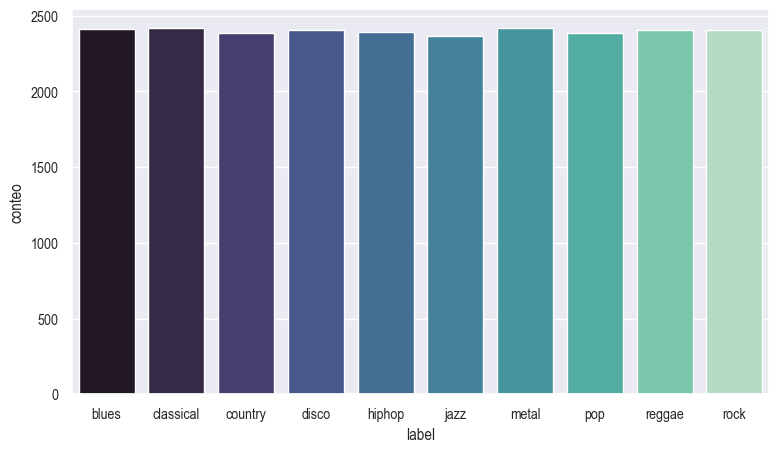

In [ ]:
df_aux=pd.DataFrame(y_train,columns=["label"])
labels=list(df["label"].unique())
df_aux=df_aux.groupby("label").agg({"label":"count"})
df_aux=df_aux.rename(columns={"label":"conteo"}).reset_index()
df_aux["label"]=df_aux["label"].replace(list(range(0,10)),labels)

plt.figure(figsize=(9,5))

sns.barplot(x='label', y= 'conteo', data=df_aux, palette='mako')

plt.show;

In [ ]:
#En general, los datos parecen equilibrados, por lo que se trabajará con ellos.

#### 3.2.3.2 Entrenamiento, parametrización y evaluación de las redes neuronales

Resultados tras análisis de correlación:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 2048)              108544    
                                                                 
 batch_normalization_14 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 h2 (Dense)                  (None, 1024)              2098176   
                                                                 
 batch_normalization_15 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 1024)             

Epoch 32/600
600/600 [==============================] - 23s 39ms/step - loss: 0.1797 - accuracy: 0.9415 - val_loss: 0.3250 - val_accuracy: 0.9003
Epoch 33/600
600/600 [==============================] - 24s 40ms/step - loss: 0.1793 - accuracy: 0.9410 - val_loss: 0.3321 - val_accuracy: 0.8997
Epoch 34/600
600/600 [==============================] - 24s 40ms/step - loss: 0.1657 - accuracy: 0.9479 - val_loss: 0.3505 - val_accuracy: 0.8993
Epoch 35/600
600/600 [==============================] - 24s 39ms/step - loss: 0.1686 - accuracy: 0.9460 - val_loss: 0.3665 - val_accuracy: 0.8951
Epoch 36/600
600/600 [==============================] - 23s 39ms/step - loss: 0.1713 - accuracy: 0.9443 - val_loss: 0.3482 - val_accuracy: 0.8968
Epoch 37/600
600/600 [==============================] - 19s 32ms/step - loss: 0.1611 - accuracy: 0.9483 - val_loss: 0.3353 - val_accuracy: 0.9039
Epoch 38/600
600/600 [==============================] - 23s 39ms/step - loss: 0.1521 - accuracy: 0.9505 - val_loss: 0.3382 -

Epoch 144/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.3128 - val_accuracy: 0.9199
Epoch 145/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.3258 - val_accuracy: 0.9189
Epoch 146/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.3177 - val_accuracy: 0.9189
Epoch 147/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.3359 - val_accuracy: 0.9160
Epoch 148/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.3270 - val_accuracy: 0.9172
Epoch 149/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.3500 - val_accuracy: 0.9133
Epoch 150/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0

Epoch 200/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.3253 - val_accuracy: 0.9193
Epoch 201/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.3344 - val_accuracy: 0.9162
Epoch 202/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0319 - accuracy: 0.9888 - val_loss: 0.3367 - val_accuracy: 0.9195
Epoch 203/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.3442 - val_accuracy: 0.9168
Epoch 204/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0312 - accuracy: 0.9911 - val_loss: 0.3113 - val_accuracy: 0.9222
Epoch 205/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.3519 - val_accuracy: 0.9197
Epoch 206/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0

Epoch 256/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.3370 - val_accuracy: 0.9229
Epoch 257/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.3310 - val_accuracy: 0.9199
Epoch 258/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.3297 - val_accuracy: 0.9243
Epoch 259/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.3494 - val_accuracy: 0.9233
Epoch 260/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0277 - accuracy: 0.9919 - val_loss: 0.3490 - val_accuracy: 0.9237
Epoch 261/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.3317 - val_accuracy: 0.9249
Epoch 262/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0

Epoch 312/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0292 - accuracy: 0.9921 - val_loss: 0.3140 - val_accuracy: 0.9216
Epoch 313/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.3002 - val_accuracy: 0.9270
Epoch 314/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.3088 - val_accuracy: 0.9256
Epoch 315/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.3219 - val_accuracy: 0.9249
Epoch 316/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.3041 - val_accuracy: 0.9279
Epoch 317/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.3472 - val_accuracy: 0.9245
Epoch 318/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0

Epoch 368/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.3328 - val_accuracy: 0.9283
Epoch 369/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.3303 - val_accuracy: 0.9262
Epoch 370/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.3198 - val_accuracy: 0.9316
Epoch 371/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.3133 - val_accuracy: 0.9285
Epoch 372/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.3315 - val_accuracy: 0.9283
Epoch 373/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.3239 - val_accuracy: 0.9304
Epoch 374/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0

Epoch 424/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.3371 - val_accuracy: 0.9243
Epoch 425/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.3491 - val_accuracy: 0.9276
Epoch 426/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.3212 - val_accuracy: 0.9314
Epoch 427/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.3288 - val_accuracy: 0.9299
Epoch 428/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.3356 - val_accuracy: 0.9281
Epoch 429/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.3342 - val_accuracy: 0.9299
Epoch 430/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0

Epoch 480/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.3378 - val_accuracy: 0.9287
Epoch 481/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.3484 - val_accuracy: 0.9297
Epoch 482/600
600/600 [==============================] - 15s 24ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.3427 - val_accuracy: 0.9283
Epoch 483/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.3572 - val_accuracy: 0.9260
Epoch 484/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.3448 - val_accuracy: 0.9297
Epoch 485/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.3515 - val_accuracy: 0.9237
Epoch 486/600
600/600 [==============================] - 14s 24ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0

Epoch 536/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.3342 - val_accuracy: 0.9295
Epoch 537/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.3323 - val_accuracy: 0.9293
Epoch 538/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.3434 - val_accuracy: 0.9281
Epoch 539/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.3317 - val_accuracy: 0.9324
Epoch 540/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.3365 - val_accuracy: 0.9322
Epoch 541/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.3346 - val_accuracy: 0.9331
Epoch 542/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0

Epoch 592/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.3427 - val_accuracy: 0.9318
Epoch 593/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.3431 - val_accuracy: 0.9320
Epoch 594/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.3621 - val_accuracy: 0.9306
Epoch 595/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.3461 - val_accuracy: 0.9308
Epoch 596/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.3537 - val_accuracy: 0.9327
Epoch 597/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.3671 - val_accuracy: 0.9279
Epoch 598/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0

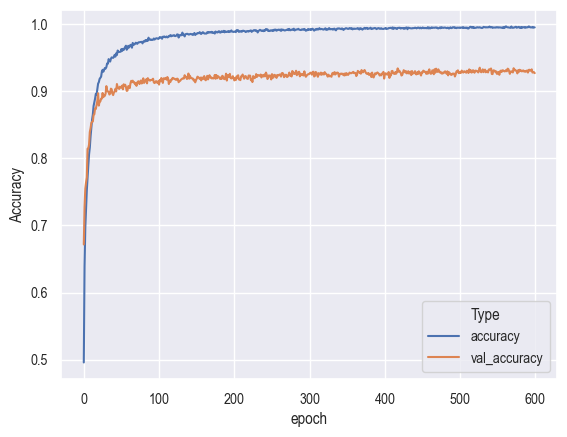

In [ ]:
#SOLUCION
model = keras.Sequential([
    keras.layers.Dense(2048, activation=tf.nn.relu,input_shape=[X_train.shape[1]], name='h1'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation=tf.nn.relu, name='h2'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, name='h3'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, name='h4'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, name='h5'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, name='h6'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, name='h7'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax,name='ho')
])
model.summary()

#SOLUCION
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=600, validation_split = 0.2)

hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

188/188 [==============================] - 1s 4ms/step


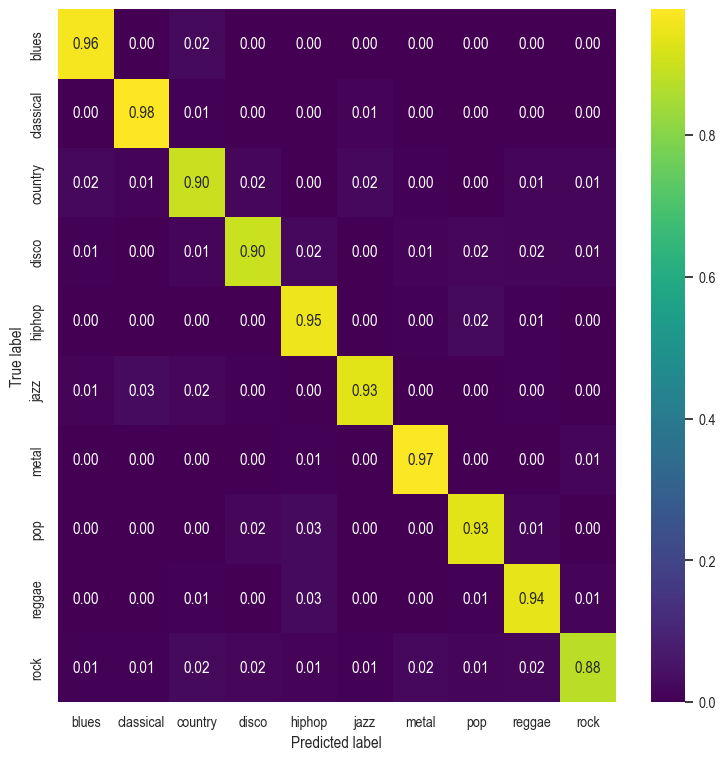

In [ ]:
#Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_est=model.predict(X_test)
y_est_label=[]
for x in range(0,len(y_est)):
    max_value=max(y_est[x])
    index=list(y_est[x]).index(max_value)
    y_est_label.append(index)

cm = confusion_matrix(y_test, y_est_label)
labels=list(df_1["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

Resultados tras tratamiento de outliers y filtrado parámetros:

In [ ]:
df=pd.read_csv("df_sintetico_1.csv")
#Variables eliminadas por alta correlación:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

In [ ]:
# Visualización de outliers:
IQR = df.quantile(0.75,numeric_only=True)-df.quantile(0.25,numeric_only=True)
sup = df.median(numeric_only=True)+2*IQR
inf = df.median(numeric_only=True)-2*IQR

params=["rms_var","spectral_centroid_var","spectral_bandwidth_var","zero_crossing_rate_mean","zero_crossing_rate_var",
        "harmony_mean","perceptr_mean","perceptr_var","tempo","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var",
        "mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var","mfcc11_var","mfcc12_var","mfcc13_var",
        "mfcc14_var","mfcc15_var","mfcc16_var","mfcc17_var","mfcc18_var","mfcc19_var","mfcc20_var"]
df_empty=pd.DataFrame({'param':[],'country':[], 'disco':[], 'rock':[]})

for x in params:
    r=[]
    for label in ["country","disco","rock"]:
        r.append(len(df[(df["label"]==label) & ((df[x]>sup[x]) | (df[x]<inf[x]))]))
    df_empty=df_empty.append({'param':x, 'country':r[0],'disco':r[1],'rock':r[2]}, ignore_index=True)

df_empty

param  country  disco   rock
0                   rms_var    12.00 240.00  35.00
1     spectral_centroid_var   124.00 228.00 183.00
2    spectral_bandwidth_var   143.00 186.00 167.00
3   zero_crossing_rate_mean     5.00  31.00  10.00
4    zero_crossing_rate_var   127.00 454.00 239.00
5              harmony_mean    35.00 343.00 899.00
6             perceptr_mean   136.00 452.00 836.00
7              perceptr_var     4.00 163.00   2.00
8                     tempo   114.00  66.00 109.00
9                 mfcc1_var    57.00 162.00 110.00
10                mfcc2_var   151.00 149.00 143.00
11                mfcc3_var    67.00 153.00  70.00
12                mfcc4_var   117.00 130.00  74.00
13                mfcc5_var   172.00  79.00  80.00
14                mfcc6_var   159.00 161.00  68.00
15                mfcc7_var   119.00 101.00  82.00
16                mfcc8_var   105.00  99.00  65.00
17                mfcc9_var   145.00  87.00  98.00
18               mfcc10_var   164.00  67.00  70.00
19               mfcc11_var   144.00 117.00  61.00
20               mfcc12_var   135.00 104.00  61.00
21               mfcc13_var   112.00 101.00  53.00
22               mfcc14_var   125.00  94.00  51.00
23               mfcc15_var    98.00 135.00  75.00
24               mfcc16_var   120.00 132.00  60.00
25               mfcc17_var   135.00 147.00  84.00
26               mfcc18_var    99.00 171.00 104.00
27               mfcc19_var    69.00 212.00  96.00
28               mfcc20_var   114.00 179.00  96.00

In [ ]:
df=pd.read_csv("df_sintetico_1.csv")
#Variables eliminadas por alta correlación:
df=df.drop(["mfcc2_mean","spectral_centroid_mean","rolloff_mean","harmony_var","rolloff_var"],axis=1)

#Se procede a eliminar aquellas variables con elevado número de outliers:
df_1_=df.drop(["filename"],axis=1)
df_1_=df_1_.drop(["spectral_centroid_var","spectral_bandwidth_var","zero_crossing_rate_var","mfcc1_var","mfcc2_var",
                  "mfcc4_var","mfcc6_var","mfcc7_var","mfcc10_var","mfcc12_var","mfcc14_var","mfcc17_var","mfcc18_var",
                  "mfcc19_var","mfcc20_var"],axis=1)

#En el caso de las variables de entrada, serán las mismas para cualquier tipo de codificación de las variables de salida:

X_=np.array(df_1_.loc[:,list(df_1_.columns[:-1])])
y_=df_1_[["label"]]

from sklearn.model_selection import train_test_split
[X_train_,X_test_,y_train_,y_test_]=train_test_split(X_,y_,test_size=0.2,random_state=0)

#->Codificación de las variables de salida según labels:
labels=df_1_["label"].unique().tolist()
y_train_=np.array(y_train_.replace(labels,list(range(0,10))))
y_test_=np.array(y_test_.replace(labels,list(range(0,10))))

#Puesto que existen outliers, se usará un método robusto para normalizar los datos.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 2048)              108544    
                                                                 
 batch_normalization_3 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 h2 (Dense)                  (None, 1024)              2098176   
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

Epoch 29/600
600/600 [==============================] - 23s 38ms/step - loss: 0.2332 - accuracy: 0.9235 - val_loss: 0.3279 - val_accuracy: 0.9003
Epoch 30/600
600/600 [==============================] - 23s 39ms/step - loss: 0.2207 - accuracy: 0.9297 - val_loss: 0.3503 - val_accuracy: 0.8945
Epoch 31/600
600/600 [==============================] - 24s 41ms/step - loss: 0.1992 - accuracy: 0.9362 - val_loss: 0.3519 - val_accuracy: 0.8928
Epoch 32/600
600/600 [==============================] - 25s 42ms/step - loss: 0.2106 - accuracy: 0.9328 - val_loss: 0.3387 - val_accuracy: 0.8957
Epoch 33/600
600/600 [==============================] - 24s 40ms/step - loss: 0.1951 - accuracy: 0.9392 - val_loss: 0.3471 - val_accuracy: 0.8964
Epoch 34/600
600/600 [==============================] - 23s 39ms/step - loss: 0.1965 - accuracy: 0.9388 - val_loss: 0.3443 - val_accuracy: 0.8976
Epoch 35/600
600/600 [==============================] - 24s 41ms/step - loss: 0.1836 - accuracy: 0.9411 - val_loss: 0.3528 -

600/600 [==============================] - 27s 45ms/step - loss: 0.0821 - accuracy: 0.9748 - val_loss: 0.3132 - val_accuracy: 0.9181
Epoch 86/600
600/600 [==============================] - 27s 46ms/step - loss: 0.0837 - accuracy: 0.9739 - val_loss: 0.3356 - val_accuracy: 0.9118
Epoch 87/600
600/600 [==============================] - 23s 38ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.3356 - val_accuracy: 0.9172
Epoch 88/600
600/600 [==============================] - 23s 38ms/step - loss: 0.0882 - accuracy: 0.9727 - val_loss: 0.3183 - val_accuracy: 0.9151
Epoch 89/600
600/600 [==============================] - 23s 38ms/step - loss: 0.0798 - accuracy: 0.9747 - val_loss: 0.3146 - val_accuracy: 0.9193
Epoch 90/600
600/600 [==============================] - 26s 44ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.3154 - val_accuracy: 0.9162
Epoch 91/600
600/600 [==============================] - 26s 44ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.3129 - val_accuracy

Epoch 141/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0530 - accuracy: 0.9845 - val_loss: 0.3277 - val_accuracy: 0.9172
Epoch 142/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.3304 - val_accuracy: 0.9131
Epoch 143/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.3388 - val_accuracy: 0.9212
Epoch 144/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.3336 - val_accuracy: 0.9204
Epoch 145/600
600/600 [==============================] - 17s 29ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.3449 - val_accuracy: 0.9206
Epoch 146/600
600/600 [==============================] - 17s 29ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.3261 - val_accuracy: 0.9214
Epoch 147/600
600/600 [==============================] - 18s 30ms/step - loss: 0.0506 - accuracy: 0.9837 - val_loss: 0

Epoch 197/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.3280 - val_accuracy: 0.9247
Epoch 198/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.3180 - val_accuracy: 0.9266
Epoch 199/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.3370 - val_accuracy: 0.9204
Epoch 200/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.3491 - val_accuracy: 0.9237
Epoch 201/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.3398 - val_accuracy: 0.9229
Epoch 202/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0420 - accuracy: 0.9877 - val_loss: 0.3284 - val_accuracy: 0.9231
Epoch 203/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0

Epoch 253/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.3280 - val_accuracy: 0.9306
Epoch 254/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0376 - accuracy: 0.9899 - val_loss: 0.3150 - val_accuracy: 0.9272
Epoch 255/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.2976 - val_accuracy: 0.9341
Epoch 256/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0264 - accuracy: 0.9926 - val_loss: 0.3377 - val_accuracy: 0.9293
Epoch 257/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0321 - accuracy: 0.9915 - val_loss: 0.3116 - val_accuracy: 0.9274
Epoch 258/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.3314 - val_accuracy: 0.9258
Epoch 259/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0

Epoch 309/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.3250 - val_accuracy: 0.9272
Epoch 310/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.3270 - val_accuracy: 0.9266
Epoch 311/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.3257 - val_accuracy: 0.9295
Epoch 312/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.3344 - val_accuracy: 0.9260
Epoch 313/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.3527 - val_accuracy: 0.9245
Epoch 314/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.3344 - val_accuracy: 0.9302
Epoch 315/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0

Epoch 365/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.3018 - val_accuracy: 0.9318
Epoch 366/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.3194 - val_accuracy: 0.9318
Epoch 367/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.3106 - val_accuracy: 0.9314
Epoch 368/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.3122 - val_accuracy: 0.9316
Epoch 369/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.3062 - val_accuracy: 0.9327
Epoch 370/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.3015 - val_accuracy: 0.9329
Epoch 371/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0

Epoch 421/600
600/600 [==============================] - 15s 25ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.3250 - val_accuracy: 0.9316
Epoch 422/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.3371 - val_accuracy: 0.9264
Epoch 423/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.3170 - val_accuracy: 0.9302
Epoch 424/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.3207 - val_accuracy: 0.9254
Epoch 425/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.3287 - val_accuracy: 0.9254
Epoch 426/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.3275 - val_accuracy: 0.9281
Epoch 427/600
600/600 [==============================] - 15s 26ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0

Epoch 477/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.3257 - val_accuracy: 0.9324
Epoch 478/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.3184 - val_accuracy: 0.9291
Epoch 479/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.3292 - val_accuracy: 0.9283
Epoch 480/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.3186 - val_accuracy: 0.9320
Epoch 481/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.3310 - val_accuracy: 0.9293
Epoch 482/600
600/600 [==============================] - 19s 31ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.3096 - val_accuracy: 0.9337
Epoch 483/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0

Epoch 533/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.3485 - val_accuracy: 0.9291
Epoch 534/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.3288 - val_accuracy: 0.9266
Epoch 535/600
600/600 [==============================] - 16s 27ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.3382 - val_accuracy: 0.9279
Epoch 536/600
600/600 [==============================] - 16s 26ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.3284 - val_accuracy: 0.9306
Epoch 537/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.3143 - val_accuracy: 0.9341
Epoch 538/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.3412 - val_accuracy: 0.9287
Epoch 539/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0

Epoch 589/600
600/600 [==============================] - 17s 28ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.3483 - val_accuracy: 0.9283
Epoch 590/600
600/600 [==============================] - 17s 29ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.3176 - val_accuracy: 0.9318
Epoch 591/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.3392 - val_accuracy: 0.9316
Epoch 592/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.3241 - val_accuracy: 0.9310
Epoch 593/600
600/600 [==============================] - 17s 29ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.3354 - val_accuracy: 0.9293
Epoch 594/600
600/600 [==============================] - 18s 29ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.3262 - val_accuracy: 0.9329
Epoch 595/600
600/600 [==============================] - 17s 29ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0

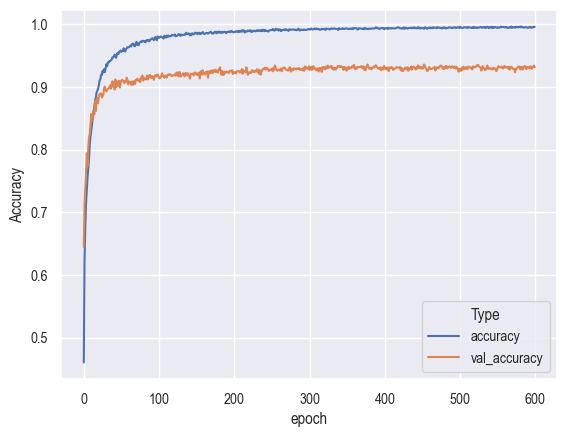

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(2048, activation=tf.nn.relu,input_shape=[X_train.shape[1]], name='h1'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation=tf.nn.relu, name='h2'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, name='h3'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, name='h4'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, name='h5'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, name='h6'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, name='h7'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax,name='ho')
])
model.summary()

#SOLUCION
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=600, validation_split = 0.2)

hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

188/188 [==============================] - 1s 4ms/step


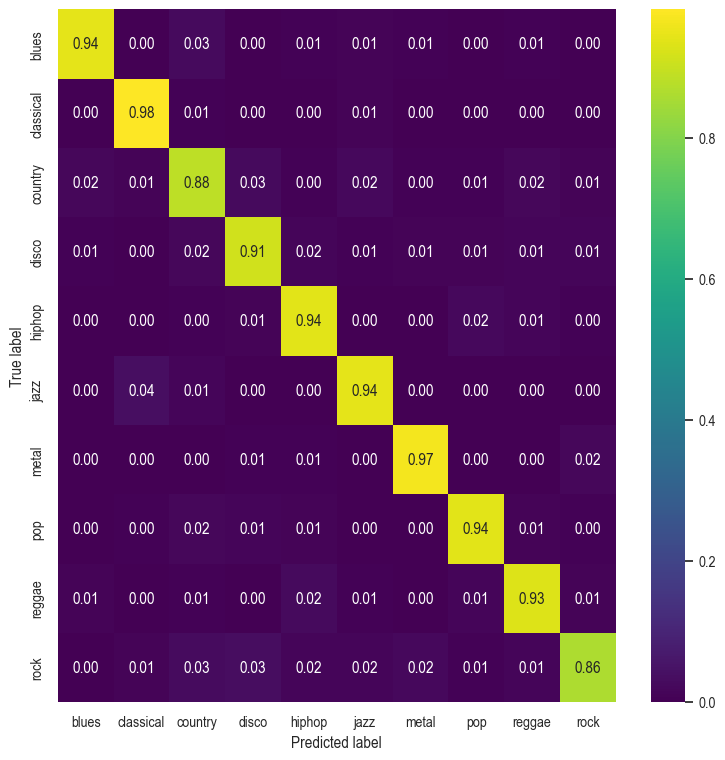

In [ ]:
#Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_est=model.predict(X_test)
y_est_label=[]
for x in range(0,len(y_est)):
    max_value=max(y_est[x])
    index=list(y_est[x]).index(max_value)
    y_est_label.append(index)

cm = confusion_matrix(y_test, y_est_label)
labels=list(df_1_["label"].unique())
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

#### 3.2.3.3 Archivo de predicciones

In [ ]:
#Almacenamos en un dataframe el id de las canciones usadas para la estimación, así como la predicción obtenida con
#el mejor modelo:

predicciones=y_test_df.assign(prediccion=y_est_label)

indices=y_test_df.index
id_cancion=pd.DataFrame(df_original_1.loc[indices,"filename"])

listado_predicciones=pd.concat([id_cancion,predicciones],axis=1)

listado_predicciones=listado_predicciones.replace(list(range(0,10)),labels)

#Dataframe to csv:
listado_predicciones.to_csv("listado_predicciones_DL_1sec.csv",mode='w',encoding="utf-8",index=False)

listado_predicciones.head(40)

filename genero prediccion
9     blues.00000.9.wav  blues      blues
15    blues.00001.5.wav  blues      blues
18    blues.00001.8.wav  blues      blues
20    blues.00002.0.wav  blues      blues
22    blues.00002.2.wav  blues      blues
...                 ...    ...        ...
9973   rock.00098.3.wav   rock       rock
9981   rock.00099.1.wav   rock  classical
9985   rock.00099.5.wav   rock       rock
9988   rock.00099.8.wav   rock       rock
9989   rock.00099.9.wav   rock       rock

[2498 rows x 3 columns]